# Libraries

In [244]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import DBSCAN
from sklearn.decomposition import NMF

from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
import mpl_toolkits.mplot3d  # noqa: F401
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split


from docx import Document
from docx.shared import Inches

#to display dataframes in table format
from tabulate import tabulate



In [7]:
#function for replacing cell values in each column for cleaning

def replace_column_values(df, column_names):
    for column_name in column_names:
        # Get the unique values in the specified column
        unique_values = df[column_name].unique()
        # Initialize an empty dictionary to store the original and replacement values
        value_map = {}
        # Loop through each unique value and ask the user for a replacement value
        for value in unique_values:
            replacement_value = input(f"Replace '{value}' in column '{column_name}' with: ")
            value_map[value] = replacement_value
            df.loc[df[column_name] == value, column_name] = replacement_value
        # Print the dictionary of original and replacement values for this column
        print(f"Value map for column '{column_name}': {value_map}")
    return df

#function for showing unique values and frequencies

def print_unique_valuefrq(df):
    # Loop through each column in the DataFrame
    for col in df.columns:
        # Get the unique values and their frequency using value_counts
        value_counts = df[col].value_counts()
        # Print the column name
        print(f"Column '{col}':")
        # Loop through each unique value and its frequency
        for value, count in value_counts.items():
            print(f"  {value}: {count}")
        # Print a blank line for spacing
        print()



# Cleaning and Merging

### Reading and Cleaning GeneExp Dataset

In [8]:
file_directory=r"D:\MY WORK\MaGHALE\Dr Yadegar H Pylori Resistance\Data\VFDB.xlsx"
df_gen=pd.read_excel(file_directory)
#print_unique_valuefrq(df_gen)
df_gen=df_gen.replace({'yes':1, 'no':0})
print_unique_valuefrq(df_gen)

Column 'name':
  1022: 1
  OC-691: 1
  OC-561: 1
  OC-562: 1
  OC-571: 1
  OC-576: 1
  OC-585: 1
  OC-601: 1
  OC-611: 1
  OC-630: 1
  OC-639: 1
  OC-652: 1
  OC-661: 1
  OC-664: 1
  OC-681: 1
  OC-689: 1
  OC-702: 1
  OC-808: 1
  OC-722: 1
  OC-731: 1
  OC-737: 1
  OC-739: 1
  OC-743: 1
  OC-748: 1
  OC-751: 1
  OC-770: 1
  OC-776: 1
  OC-793: 1
  OC-795: 1
  OC-796: 1
  OC-803: 1
  OC-805: 1
  OC-557: 1
  OC-546: 1
  OC-543: 1
  OC-542: 1
  OC-282: 1
  OC-283: 1
  OC-287: 1
  OC-291: 1
  OC-309: 1
  OC-30: 1
  OC-314: 1
  OC-348: 1
  OC-353: 1
  OC-358: 1
  OC-359: 1
  OC-364: 1
  OC-373: 1
  OC-375: 1
  OC-3: 1
  OC-427: 1
  OC-442: 1
  OC-443: 1
  OC-454: 1
  OC-457: 1
  OC-467: 1
  OC-468: 1
  OC-473: 1
  OC-474: 1
  OC-485: 1
  OC-494: 1
  OC-4: 1
  OC-505: 1
  OC-528: 1
  OC-806: 1
  OC-80: 1
  OC-263: 1
  S-66: 1
  S-31: 1
  S-35: 1
  S-38: 1
  S-3: 1
  S-43: 1
  S-45: 1
  S-47: 1
  S-49: 1
  S-50: 1
  S-54: 1
  S-57: 1
  S-5: 1
  S-61: 1
  S-65: 1
  S-67: 1
  OC-810: 1
  S-6: 

### Reading and Cleaning Patient Dataset

In [9]:
file_directory2=r"D:\MY WORK\MaGHALE\Dr Yadegar H Pylori Resistance\Data\Updated H. pylori MetaData.xlsx"
df_pts=pd.read_excel(file_directory2)
print_unique_valuefrq(df_pts)

Column 'Strain ID':
  OC-30: 1
  OC-542: 1
  OC-528: 1
  OC-601: 1
  OC-691: 1
  OC-1110: 1
  OC-1065: 1
  1022: 1
  OC-1127: 1
  OC-1112: 1
  OC-795: 1
  OC-944: 1
  OC-854: 1
  OC-816: 1
  OC-939: 1
  OC-443: 1
  OC-971: 1
  OC-457: 1
  OC-936: 1
  OC-910: 1
  OC-963: 1
  OC-1107: 1
  HC-256: 1
  OC-454: 1
  OC-813: 1
  OC-806: 1
  OC-664: 1
  OC-543: 1
  OC-611: 1
  HC-255: 1
  OC-373: 1
  OC-1116: 1
  1027: 1
  1032: 1
  1034: 1
  1036: 1
  HC-730: 1
  OC-897: 1
  OC-846: 1
  OC-840: 1
  OC-819: 1
  OC-814: 1
  OC-810: 1
  OC-808: 1
  OC-805: 1
  OC-803: 1
  OC-975: 1
  OC-937: 1
  OC-913: 1
  OC-912: 1
  OC-953: 1
  OC-947: 1
  OC-945: 1
  OC-1031: 1
  OC-1028: 1
  OC-1021: 1
  OC-1094: 1
  OC-1062: 1
  OC-1051: 1
  OC-1047: 1
  OC-1046: 1
  OC-1005: 1
  1045: 1
  1043: 1
  1038: 1
  OC-652: 1
  OC-561: 1
  732: 1
  15-C: 1
  S-67: 1
  S-73: 1
  S-75: 1
  S-77: 1
  S-78: 1
  S-79: 1
  S-80: 1
  S-82: 1
  S-84: 1
  S-85: 1
  S-91: 1
  S-97: 1
  S-99: 1
  S-104: 1
  19-A: 1
  OC-546

In [10]:
#replace_column_values(df_pts, ["Patient Sex"])
#Value map for column 'Patient Sex': {'Male': '1', 'Female': '0'}
df_pts['Patient Sex'] = df_pts['Patient Sex'].replace({'Male': '1', 'Female': '0'})
df_pts

Strain ID  Patient Age Patient Sex      Clinical Diagnosis  \
0       OC-30           56           1               Gastritis   
1       OC-15           52           1               Gastritis   
2       HC-70           55           0    Peptic Ulcer Disease   
3        OC-4           58           0               Gastritis   
4       OC-81           54           0  Gastritis + Duodenitis   
..        ...          ...         ...                     ...   
262      58-A           42           1    Gastritis + Carditis   
263      58-C           42           1    Gastritis + Carditis   
264      59-B           43           0    Gastritis + Carditis   
265      72-B           55           0    Gastritis + Carditis   
266      73-B           32           1    Gastritis + Carditis   

    Clinical Classification Gastric Biopsy    Ethnicity  \
0                       NUD         Antrum         Fars   
1                       NUD         Antrum         Fars   
2                       PUD         Antrum         Turk   
3                       NUD         Antrum         Fars   
4                       NUD         Antrum  Mazandarani   
..                      ...            ...          ...   
262                     NUD         Antrum       Afghan   
263                     NUD         Cardia       Afghan   
264                     NUD           Body         Fars   
265                     NUD           Body          Lor   
266                     NUD           Body         Fars   

    Province (Geographical Origin) Clarithromycin Metronidazole Tetracycline  \
0                           Semnan              S             R            S   
1                           Tehran              R             S            S   
2                          Ardabil              R             R            R   
3                           Tehran              R             R            S   
4                       Mazandaran              R             R            R   
..                             ...            ...           ...          ...   
262                     Mazandaran              S             R            S   
263                     Mazandaran              S             R            S   
264                         Tehran              S             S            S   
265                      Lorestan               R             R            S   
266                         Tehran              R             S            S   

    Amoxicillin Ciprofloxacin Levofloxacin Rifampicin   
0             S             S            S           S  
1             R             S            S           S  
2             S             R            S           R  
3             S             R            R           R  
4             S             R            R           R  
..          ...           ...          ...         ...  
262           S             R            R           R  
263           S             R            R           R  
264           S             S            S           R  
265           R             R            R           R  
266           R             R            R           S  

[267 rows x 15 columns]

In [11]:
#replace_column_values(df_pts, ['Clarithromycin','Metronidazole','Tetracycline','Amoxicillin','Ciprofloxacin', 'Levofloxacin', 'Rifampicin '])
#Value map for column 'Clarithromycin': {'S': '0', 'R': '1'}
#Value map for column 'Metronidazole': {'R': '1', 'S': '0'}
#Value map for column 'Tetracycline': {'S': '0', 'R': '1'}
#Value map for column 'Amoxicillin': {'S': '0', 'R': '1'}
#Value map for column 'Ciprofloxacin': {'S': '0', 'R': '1'}
#Value map for column 'Levofloxacin': {'S': '0', 'R': '1'}
#Value map for column 'Rifampicin ': {'S': '0', 'R': '1'}

df_pts['Clarithromycin']=df_pts['Clarithromycin'].replace({'S':0,'R':1})
df_pts['Metronidazole']=df_pts['Metronidazole'].replace({'S':0,'R':1})
df_pts['Tetracycline']=df_pts['Tetracycline'].replace({'S':0,'R':1})
df_pts['Amoxicillin']=df_pts['Amoxicillin'].replace({'S':0,'R':1})
df_pts['Ciprofloxacin']=df_pts['Ciprofloxacin'].replace({'S':0,'R':1})
df_pts['Levofloxacin']=df_pts['Levofloxacin'].replace({'S':0,'R':1})
df_pts['Rifampicin ']=df_pts['Rifampicin '].replace({'S':0,'R':1})
df_pts

Strain ID  Patient Age Patient Sex      Clinical Diagnosis  \
0       OC-30           56           1               Gastritis   
1       OC-15           52           1               Gastritis   
2       HC-70           55           0    Peptic Ulcer Disease   
3        OC-4           58           0               Gastritis   
4       OC-81           54           0  Gastritis + Duodenitis   
..        ...          ...         ...                     ...   
262      58-A           42           1    Gastritis + Carditis   
263      58-C           42           1    Gastritis + Carditis   
264      59-B           43           0    Gastritis + Carditis   
265      72-B           55           0    Gastritis + Carditis   
266      73-B           32           1    Gastritis + Carditis   

    Clinical Classification Gastric Biopsy    Ethnicity  \
0                       NUD         Antrum         Fars   
1                       NUD         Antrum         Fars   
2                       PUD         Antrum         Turk   
3                       NUD         Antrum         Fars   
4                       NUD         Antrum  Mazandarani   
..                      ...            ...          ...   
262                     NUD         Antrum       Afghan   
263                     NUD         Cardia       Afghan   
264                     NUD           Body         Fars   
265                     NUD           Body          Lor   
266                     NUD           Body         Fars   

    Province (Geographical Origin)  Clarithromycin  Metronidazole  \
0                           Semnan               0              1   
1                           Tehran               1              0   
2                          Ardabil               1              1   
3                           Tehran               1              1   
4                       Mazandaran               1              1   
..                             ...             ...            ...   
262                     Mazandaran               0              1   
263                     Mazandaran               0              1   
264                         Tehran               0              0   
265                      Lorestan                1              1   
266                         Tehran               1              0   

     Tetracycline  Amoxicillin  Ciprofloxacin  Levofloxacin  Rifampicin   
0               0            0              0             0            0  
1               0            1              0             0            0  
2               1            0              1             0            1  
3               0            0              1             1            1  
4               1            0              1             1            1  
..            ...          ...            ...           ...          ...  
262             0            0              1             1            1  
263             0            0              1             1            1  
264             0            0              0             0            1  
265             0            1              1             1            1  
266             0            1              1             1            0  

[267 rows x 15 columns]

In [12]:
# I just extracted PUD and gastritis (including gastritis and dudonitis) from the clinical classification and diagnosis.
df_pts['PUD']=df_pts['Clinical Classification']
df_pts['GIitis']=df_pts['Clinical Diagnosis']

#replace_column_values(df_pts,['PUD','GIitis'])
#Value map for column 'PUD': {'NUD': '0', 'PUD': '1', 'IM': '0', 'GC': '0', 'Normal (Healthy)': '0', 'GORD (GERD)': '0', "Barrett's Esophagus ": '0'}
#Value map for column 'GIitis': {'Gastritis': '1', 'Peptic Ulcer Disease': '0', 'Gastritis + Duodenitis': '1', 'Intestinal Metaplasia': '0', 'Gastric Cancer': '0', 'Gastric Ulcer': '0', 'Esophagitis': '1', 'Non-Ulcer Dyspepsia': '0', 'Gastric Ulcer + Duodenal Ulcer': '0', 'Duodenitis': '1', 'Duodenal Ulcer': '0', 'Normal (Healthy)': '0', ' Intestinal Metaplasia': '0', 'Gastroesophageal Reflux Disease': '0', "Barrett's Esophagus ": '0', 'Gastritis + Carditis': '1'}
df_pts['PUD']=df_pts['PUD'].replace({'NUD': '0', 'PUD': '1', 'IM': '0', 'GC': '0', 'Normal (Healthy)': '0', 'GORD (GERD)': '0', "Barrett's Esophagus ": '0'})
df_pts['GIitis']=df_pts['GIitis'].replace({'Gastritis': '1', 'Peptic Ulcer Disease': '0', 'Gastritis + Duodenitis': '1', 'Intestinal Metaplasia': '0', 'Gastric Cancer': '0', 'Gastric Ulcer': '0', 'Esophagitis': '1', 'Non-Ulcer Dyspepsia': '0', 'Gastric Ulcer + Duodenal Ulcer': '0', 'Duodenitis': '1', 'Duodenal Ulcer': '0', 'Normal (Healthy)': '0', ' Intestinal Metaplasia': '0', 'Gastroesophageal Reflux Disease': '0', "Barrett's Esophagus ": '0', 'Gastritis + Carditis': '1'})
df_pts

Strain ID  Patient Age Patient Sex      Clinical Diagnosis  \
0       OC-30           56           1               Gastritis   
1       OC-15           52           1               Gastritis   
2       HC-70           55           0    Peptic Ulcer Disease   
3        OC-4           58           0               Gastritis   
4       OC-81           54           0  Gastritis + Duodenitis   
..        ...          ...         ...                     ...   
262      58-A           42           1    Gastritis + Carditis   
263      58-C           42           1    Gastritis + Carditis   
264      59-B           43           0    Gastritis + Carditis   
265      72-B           55           0    Gastritis + Carditis   
266      73-B           32           1    Gastritis + Carditis   

    Clinical Classification Gastric Biopsy    Ethnicity  \
0                       NUD         Antrum         Fars   
1                       NUD         Antrum         Fars   
2                       PUD         Antrum         Turk   
3                       NUD         Antrum         Fars   
4                       NUD         Antrum  Mazandarani   
..                      ...            ...          ...   
262                     NUD         Antrum       Afghan   
263                     NUD         Cardia       Afghan   
264                     NUD           Body         Fars   
265                     NUD           Body          Lor   
266                     NUD           Body         Fars   

    Province (Geographical Origin)  Clarithromycin  Metronidazole  \
0                           Semnan               0              1   
1                           Tehran               1              0   
2                          Ardabil               1              1   
3                           Tehran               1              1   
4                       Mazandaran               1              1   
..                             ...             ...            ...   
262                     Mazandaran               0              1   
263                     Mazandaran               0              1   
264                         Tehran               0              0   
265                      Lorestan                1              1   
266                         Tehran               1              0   

     Tetracycline  Amoxicillin  Ciprofloxacin  Levofloxacin  Rifampicin  PUD  \
0               0            0              0             0            0   0   
1               0            1              0             0            0   0   
2               1            0              1             0            1   1   
3               0            0              1             1            1   0   
4               1            0              1             1            1   0   
..            ...          ...            ...           ...          ...  ..   
262             0            0              1             1            1   0   
263             0            0              1             1            1   0   
264             0            0              0             0            1   0   
265             0            1              1             1            1   0   
266             0            1              1             1            0   0   

    GIitis  
0        1  
1        1  
2        0  
3        1  
4        1  
..     ...  
262      1  
263      1  
264      1  
265      1  
266      1  

[267 rows x 17 columns]

In [13]:
#replace_column_values(df_pts,['Ethnicity'])
#Value map for column 'Ethnicity': {'Fars': '1', 'Turk': '3', 'Mazandarani': '2', 'Lor': '0', 'Kurd': '0', 'Gilak': '0', 'Afghan': '0', 'Baloch ': '0'}
df_pts['Ethnicity']=df_pts['Ethnicity'].replace({'Fars': '1', 'Turk': '3', 'Mazandarani': '2', 'Lor': '0', 'Kurd': '0', 'Gilak': '0', 'Afghan': '0', 'Baloch ': '0'})
df_pts

Strain ID  Patient Age Patient Sex      Clinical Diagnosis  \
0       OC-30           56           1               Gastritis   
1       OC-15           52           1               Gastritis   
2       HC-70           55           0    Peptic Ulcer Disease   
3        OC-4           58           0               Gastritis   
4       OC-81           54           0  Gastritis + Duodenitis   
..        ...          ...         ...                     ...   
262      58-A           42           1    Gastritis + Carditis   
263      58-C           42           1    Gastritis + Carditis   
264      59-B           43           0    Gastritis + Carditis   
265      72-B           55           0    Gastritis + Carditis   
266      73-B           32           1    Gastritis + Carditis   

    Clinical Classification Gastric Biopsy Ethnicity  \
0                       NUD         Antrum         1   
1                       NUD         Antrum         1   
2                       PUD         Antrum         3   
3                       NUD         Antrum         1   
4                       NUD         Antrum         2   
..                      ...            ...       ...   
262                     NUD         Antrum         0   
263                     NUD         Cardia         0   
264                     NUD           Body         1   
265                     NUD           Body         0   
266                     NUD           Body         1   

    Province (Geographical Origin)  Clarithromycin  Metronidazole  \
0                           Semnan               0              1   
1                           Tehran               1              0   
2                          Ardabil               1              1   
3                           Tehran               1              1   
4                       Mazandaran               1              1   
..                             ...             ...            ...   
262                     Mazandaran               0              1   
263                     Mazandaran               0              1   
264                         Tehran               0              0   
265                      Lorestan                1              1   
266                         Tehran               1              0   

     Tetracycline  Amoxicillin  Ciprofloxacin  Levofloxacin  Rifampicin  PUD  \
0               0            0              0             0            0   0   
1               0            1              0             0            0   0   
2               1            0              1             0            1   1   
3               0            0              1             1            1   0   
4               1            0              1             1            1   0   
..            ...          ...            ...           ...          ...  ..   
262             0            0              1             1            1   0   
263             0            0              1             1            1   0   
264             0            0              0             0            1   0   
265             0            1              1             1            1   0   
266             0            1              1             1            0   0   

    GIitis  
0        1  
1        1  
2        0  
3        1  
4        1  
..     ...  
262      1  
263      1  
264      1  
265      1  
266      1  

[267 rows x 17 columns]

In [14]:
df_pts=df_pts.drop(columns=['Province (Geographical Origin)', 'Gastric Biopsy', 'Clinical Diagnosis', 'Clinical Classification'])
print_unique_valuefrq(df_pts)

Column 'Strain ID':
  OC-30: 1
  OC-542: 1
  OC-528: 1
  OC-601: 1
  OC-691: 1
  OC-1110: 1
  OC-1065: 1
  1022: 1
  OC-1127: 1
  OC-1112: 1
  OC-795: 1
  OC-944: 1
  OC-854: 1
  OC-816: 1
  OC-939: 1
  OC-443: 1
  OC-971: 1
  OC-457: 1
  OC-936: 1
  OC-910: 1
  OC-963: 1
  OC-1107: 1
  HC-256: 1
  OC-454: 1
  OC-813: 1
  OC-806: 1
  OC-664: 1
  OC-543: 1
  OC-611: 1
  HC-255: 1
  OC-373: 1
  OC-1116: 1
  1027: 1
  1032: 1
  1034: 1
  1036: 1
  HC-730: 1
  OC-897: 1
  OC-846: 1
  OC-840: 1
  OC-819: 1
  OC-814: 1
  OC-810: 1
  OC-808: 1
  OC-805: 1
  OC-803: 1
  OC-975: 1
  OC-937: 1
  OC-913: 1
  OC-912: 1
  OC-953: 1
  OC-947: 1
  OC-945: 1
  OC-1031: 1
  OC-1028: 1
  OC-1021: 1
  OC-1094: 1
  OC-1062: 1
  OC-1051: 1
  OC-1047: 1
  OC-1046: 1
  OC-1005: 1
  1045: 1
  1043: 1
  1038: 1
  OC-652: 1
  OC-561: 1
  732: 1
  15-C: 1
  S-67: 1
  S-73: 1
  S-75: 1
  S-77: 1
  S-78: 1
  S-79: 1
  S-80: 1
  S-82: 1
  S-84: 1
  S-85: 1
  S-91: 1
  S-97: 1
  S-99: 1
  S-104: 1
  19-A: 1
  OC-546

### Merging (Patients&GenExp) and Target

In [15]:
df=pd.merge(df_pts, df_gen, how="inner", left_on='Strain ID', right_on='name')
print(df.columns)
df

Index(['Strain ID', 'Patient Age', 'Patient Sex', 'Ethnicity',
       'Clarithromycin', 'Metronidazole', 'Tetracycline', 'Amoxicillin',
       'Ciprofloxacin', 'Levofloxacin',
       ...
       'virB2_cagC', 'virB4_cagE', 'virB5_cagL', 'virB6_cagW', 'virB7_cagT',
       'virB8_cagV', 'virB9_cagX', 'virD4_cag5', 'wbcJ', 'ylxH'],
      dtype='object', length=165)


Strain ID  Patient Age Patient Sex Ethnicity  Clarithromycin  \
0       OC-30           56           1         1               0   
1       OC-15           52           1         1               1   
2       HC-70           55           0         3               1   
3        OC-4           58           0         1               1   
4       OC-81           54           0         2               1   
..        ...          ...         ...       ...             ...   
262      58-A           42           1         0               0   
263      58-C           42           1         0               0   
264      59-B           43           0         1               0   
265      72-B           55           0         0               1   
266      73-B           32           1         1               1   

     Metronidazole  Tetracycline  Amoxicillin  Ciprofloxacin  Levofloxacin  \
0                1             0            0              0             0   
1                0             0            1              0             0   
2                1             1            0              1             0   
3                1             0            0              1             1   
4                1             1            0              1             1   
..             ...           ...          ...            ...           ...   
262              1             0            0              1             1   
263              1             0            0              1             1   
264              0             0            0              0             0   
265              1             0            1              1             1   
266              0             0            1              1             1   

     ...  virB2_cagC virB4_cagE virB5_cagL virB6_cagW  virB7_cagT  virB8_cagV  \
0    ...           1          1          1          1           1           1   
1    ...           1          1          1          1           1           1   
2    ...           0          0          0          0           0           0   
3    ...           1          1          1          1           1           1   
4    ...           1          1          1          1           1           1   
..   ...         ...        ...        ...        ...         ...         ...   
262  ...           1          1          1          1           1           1   
263  ...           1          1          1          1           1           1   
264  ...           1          1          1          1           1           1   
265  ...           1          1          1          1           1           1   
266  ...           1          1          1          1           1           1   

     virB9_cagX  virD4_cag5  wbcJ  ylxH  
0             1           1     1     1  
1             1           1     1     1  
2             0           0     1     1  
3             0           1     1     1  
4             1           1     1     1  
..          ...         ...   ...   ...  
262           1           1     1     1  
263           1           1     1     1  
264           1           1     1     1  
265           1           1     1     1  
266           1           1     1     1  

[267 rows x 165 columns]

In [16]:
df=df.drop(columns=['Strain ID', 'name'])

y=df.loc[:,['Clarithromycin', 'Metronidazole', 'Tetracycline', 'Amoxicillin',
            'Ciprofloxacin', 'Levofloxacin', 'Rifampicin ']]
X=df.drop(columns=['Clarithromycin', 'Metronidazole', 'Tetracycline', 'Amoxicillin',
                   'Ciprofloxacin', 'Levofloxacin', 'Rifampicin '])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X,)



# Dimensionality Reduction and Clustering

### PCA

                  PC1       PC2       PC3
Patient Age -0.044242 -0.050743 -0.066034
Patient Sex -0.043097  0.082924  0.103409
Ethnicity   -0.034655  0.062390 -0.025199
PUD         -0.077397 -0.005377 -0.001305
GIitis       0.143807 -0.014001  0.007683
...               ...       ...       ...
virB8_cagV  -0.827415  0.496036 -0.062608
virB9_cagX  -0.812624  0.488260 -0.062152
virD4_cag5  -0.812221  0.498746 -0.065802
wbcJ        -0.394782 -0.548341  0.041827
ylxH        -0.108457 -0.102867  0.101174

[156 rows x 3 columns]


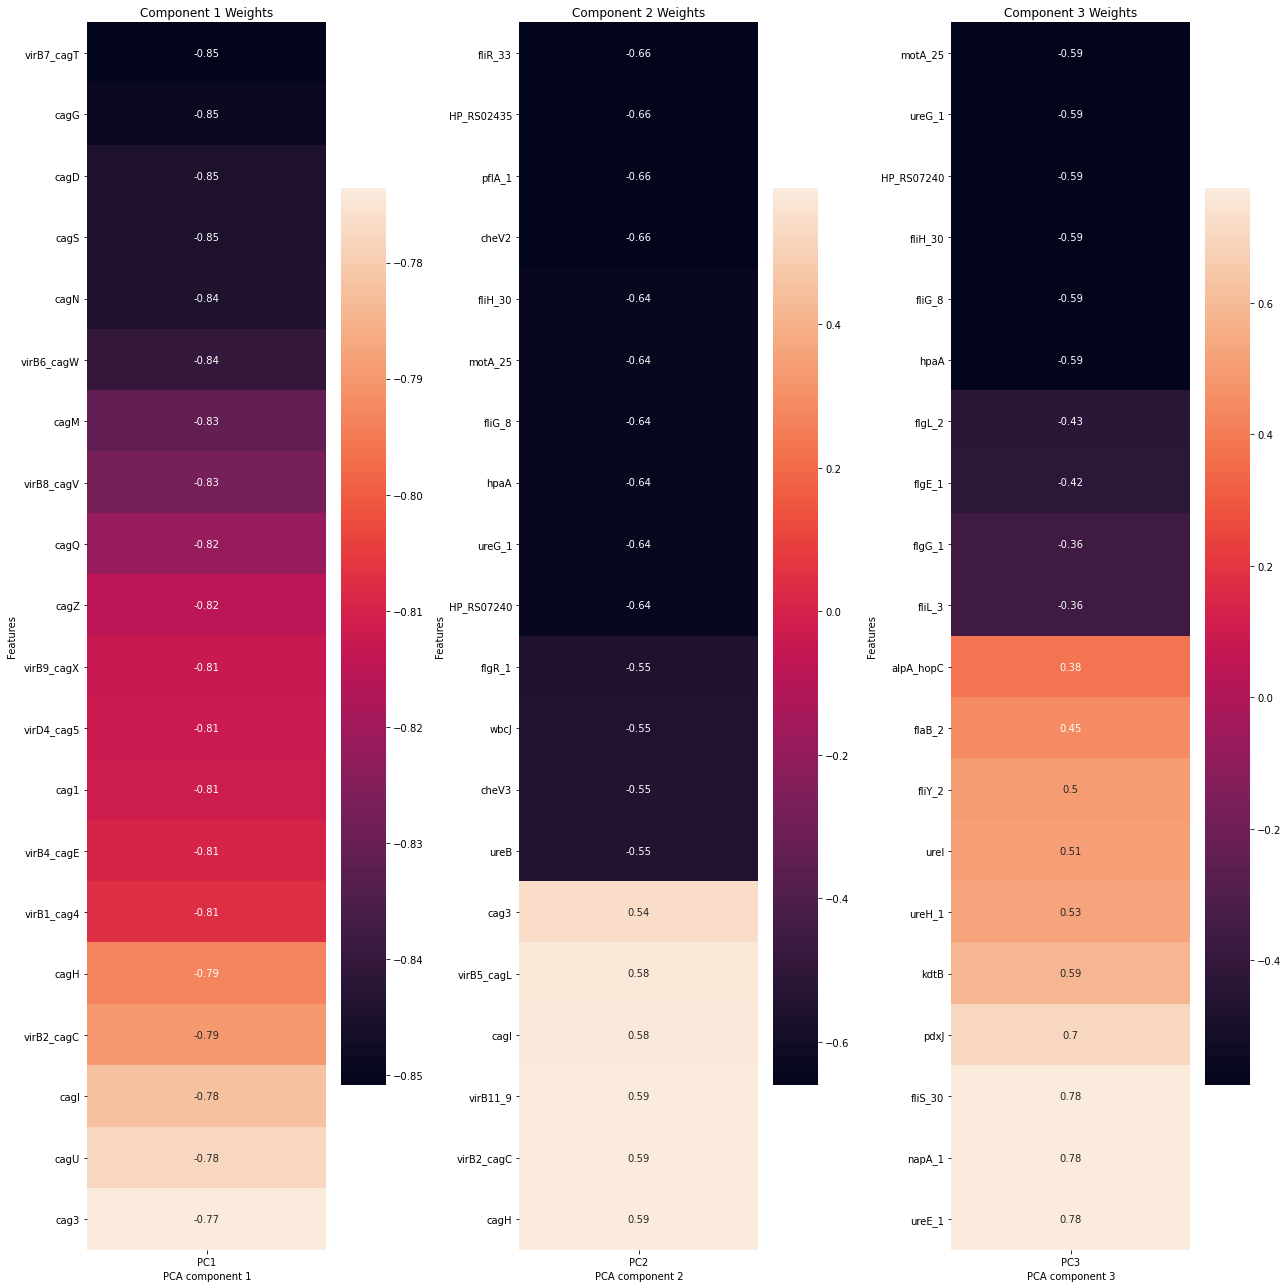

In [234]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca = pca.fit(X_scaled)
weights = pca.components_.T * np.sqrt(pca.explained_variance_)
weights.shape
weights_df = pd.DataFrame(weights, columns=['PC1', 'PC2', 'PC3'], index=X.columns[:])
print(weights_df)

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 18))
 
weights_df_filterCP1=weights_df.iloc[weights_df['PC1'].abs().argsort()[::-1][:20]] #selecting top 20 with absoloute coef
sns.heatmap(weights_df_filterCP1.iloc[:,0:1].sort_values(by="PC1"), annot=True,  ax=axs[0]) #drawing heatmap with sorted values
axs[0].set_title('Component 1 Weights')
axs[0].set_xlabel('PCA component 1')
axs[0].set_ylabel('Features')

weights_df_filterCP2=weights_df.iloc[weights_df['PC2'].abs().argsort()[::-1][:20]]
sns.heatmap(weights_df_filterCP2.iloc[:,1:2].sort_values(by="PC2"), annot=True, ax=axs[1])
axs[1].set_title('Component 2 Weights')
axs[1].set_xlabel('PCA component 2')
axs[1].set_ylabel('Features')

weights_df_filterCP3=weights_df.iloc[weights_df['PC3'].abs().argsort()[::-1][:20]]
sns.heatmap(weights_df_filterCP3.iloc[:,2:3].sort_values(by="PC3"), annot=True, ax=axs[2])
axs[2].set_title('Component 3 Weights')
axs[2].set_xlabel('PCA component 3')
axs[2].set_ylabel('Features')

plt.tight_layout()
plt.show()


In [236]:
pca = PCA(n_components=3)
pca = pca.fit_transform(X_scaled)
X_reduced = pca[:, :3]

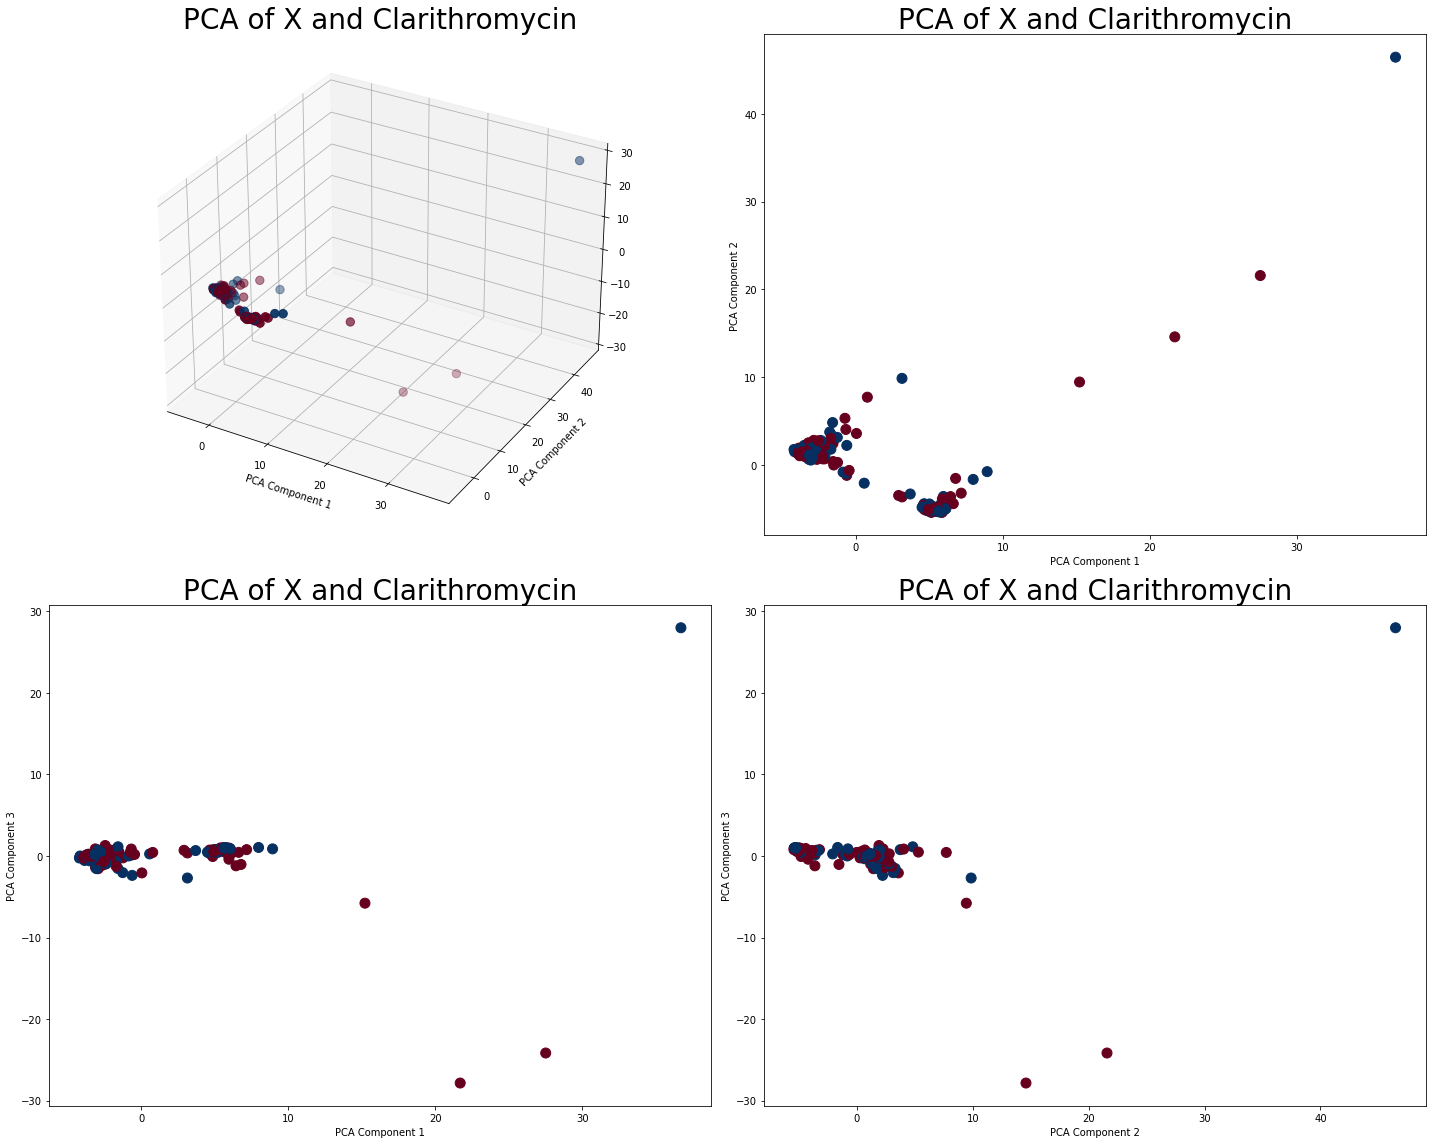

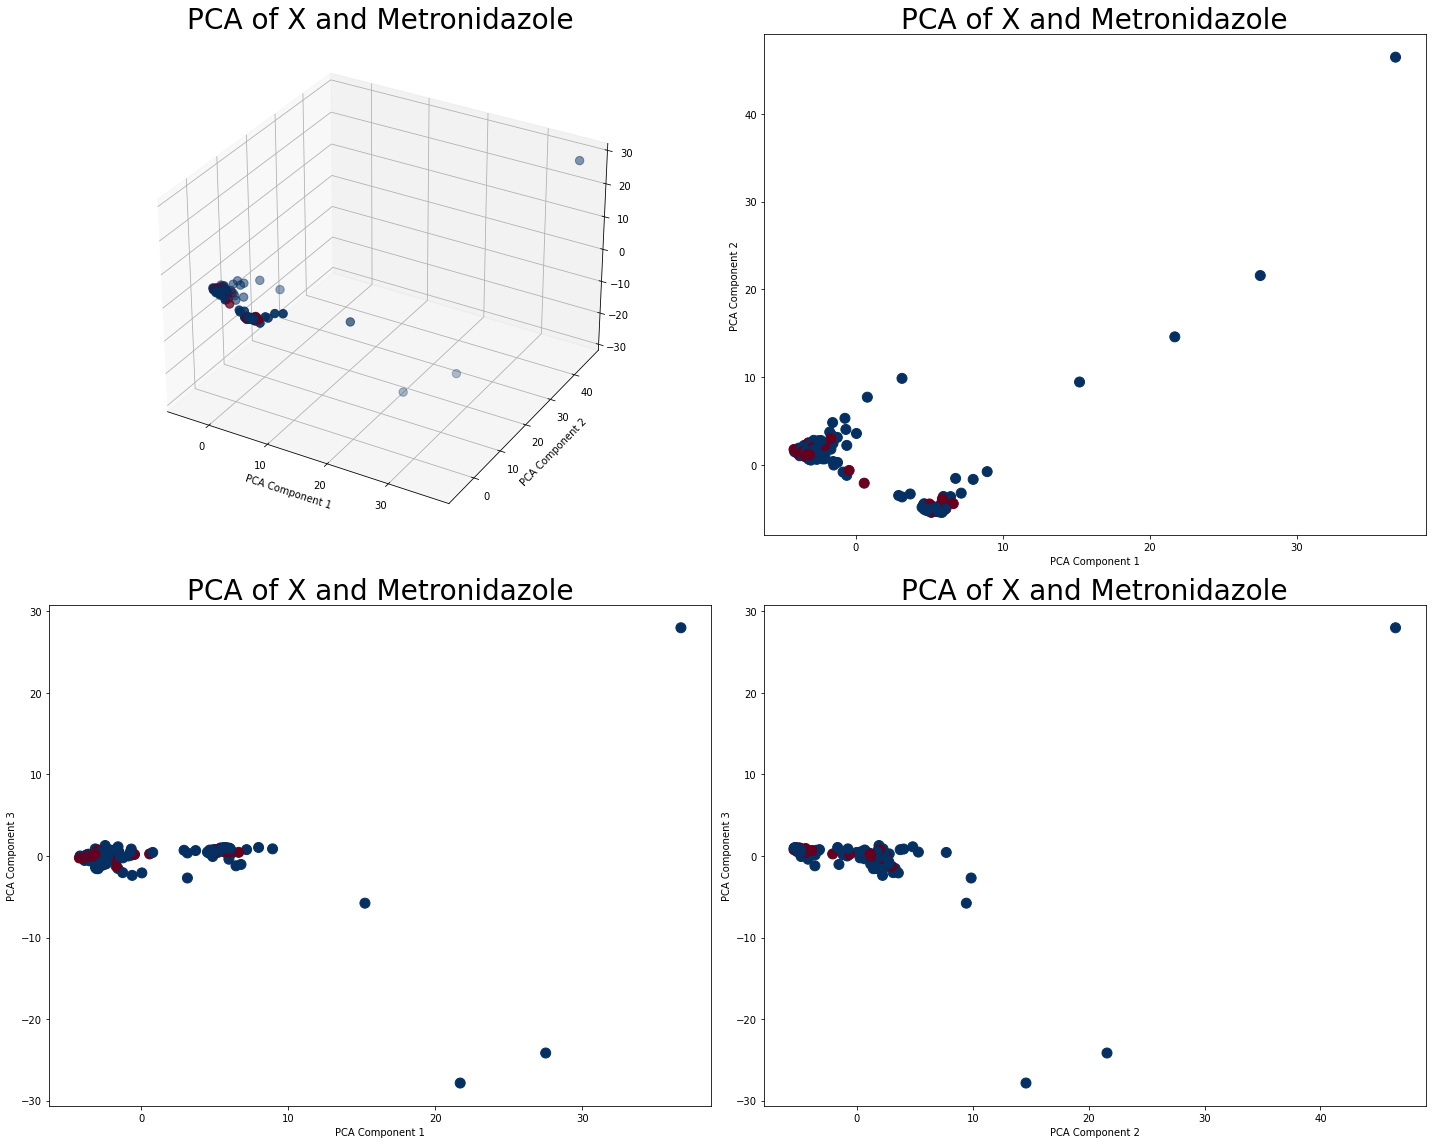

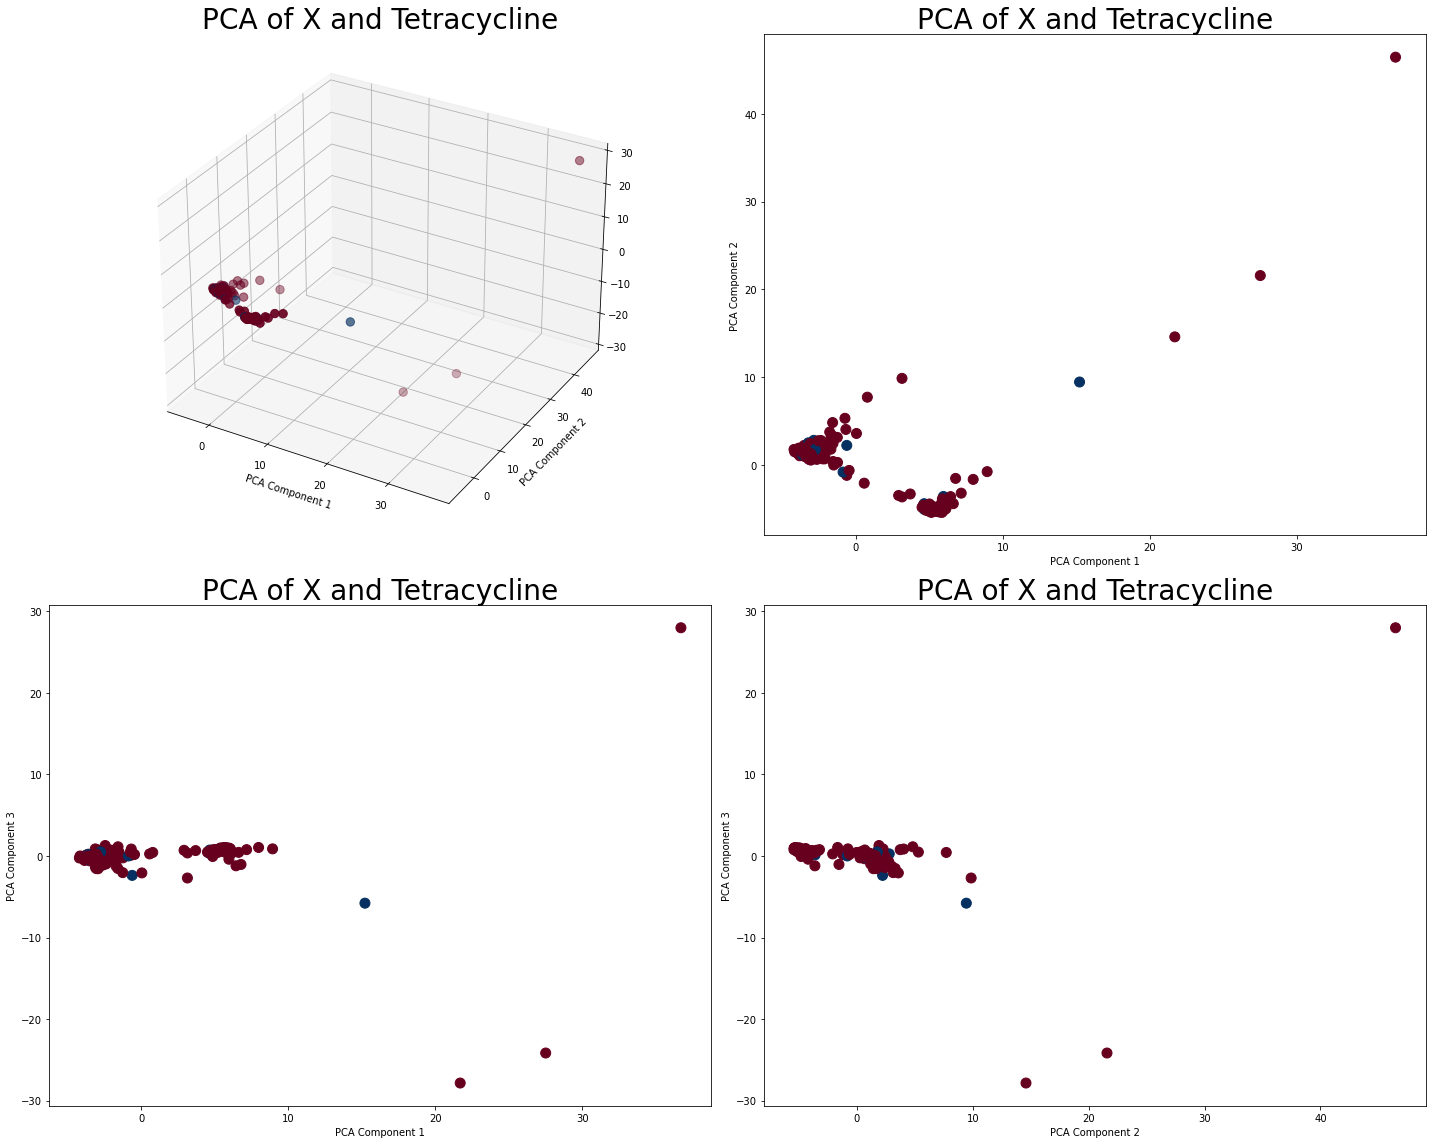

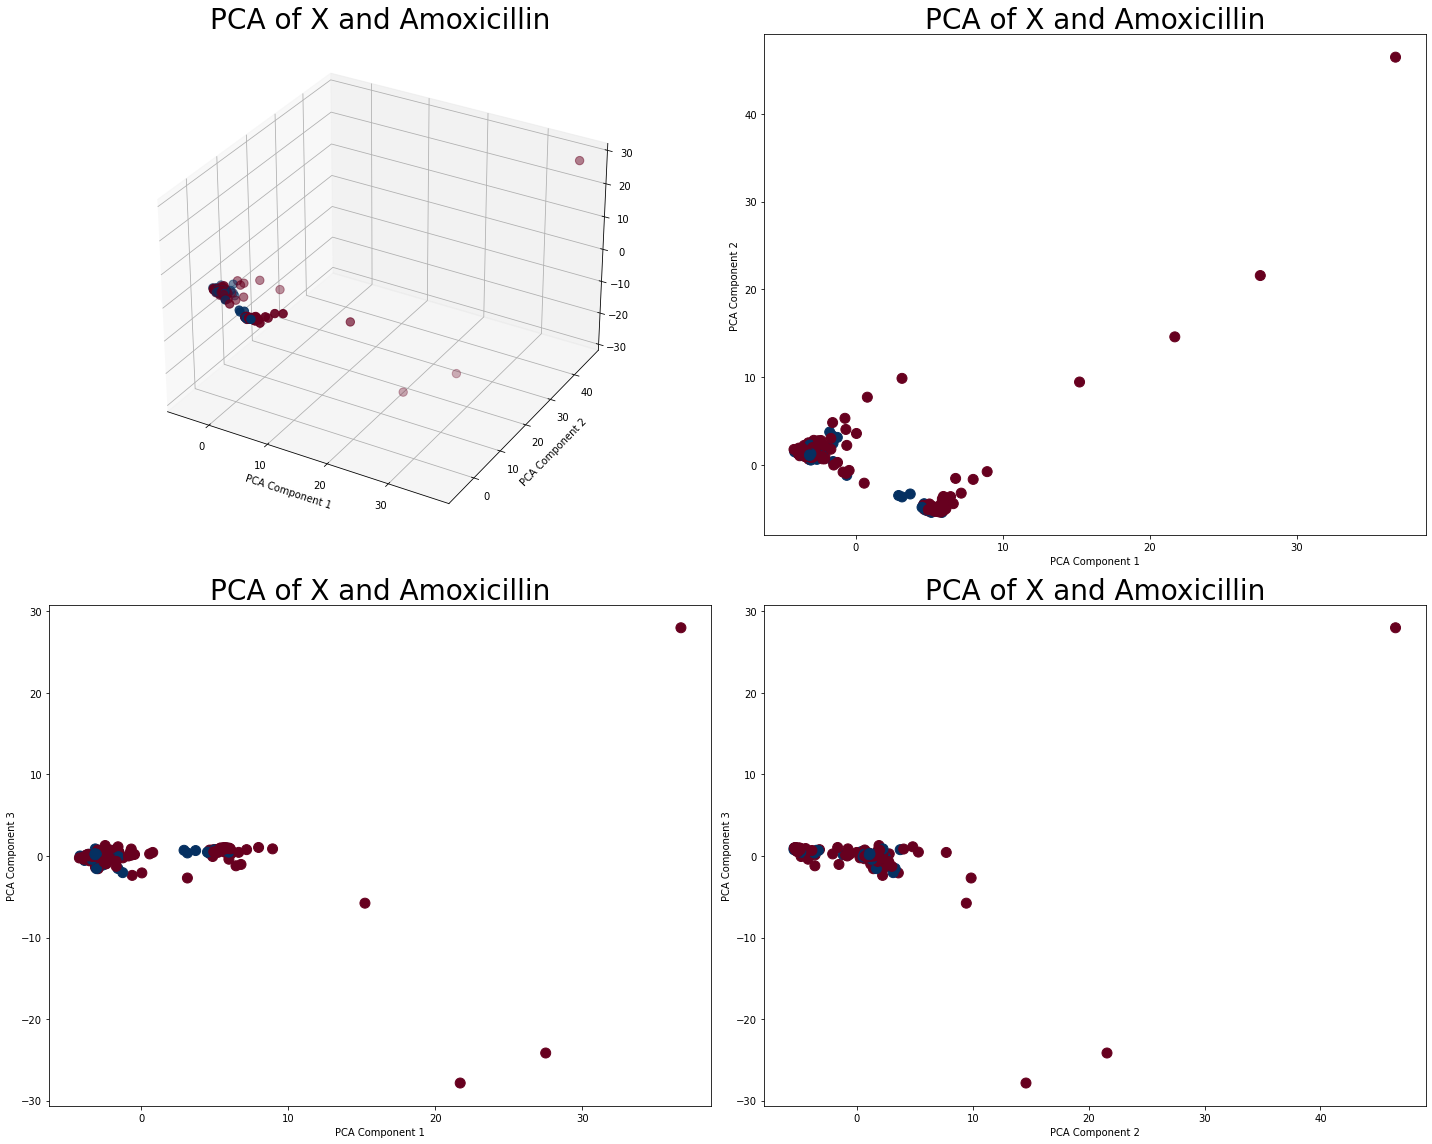

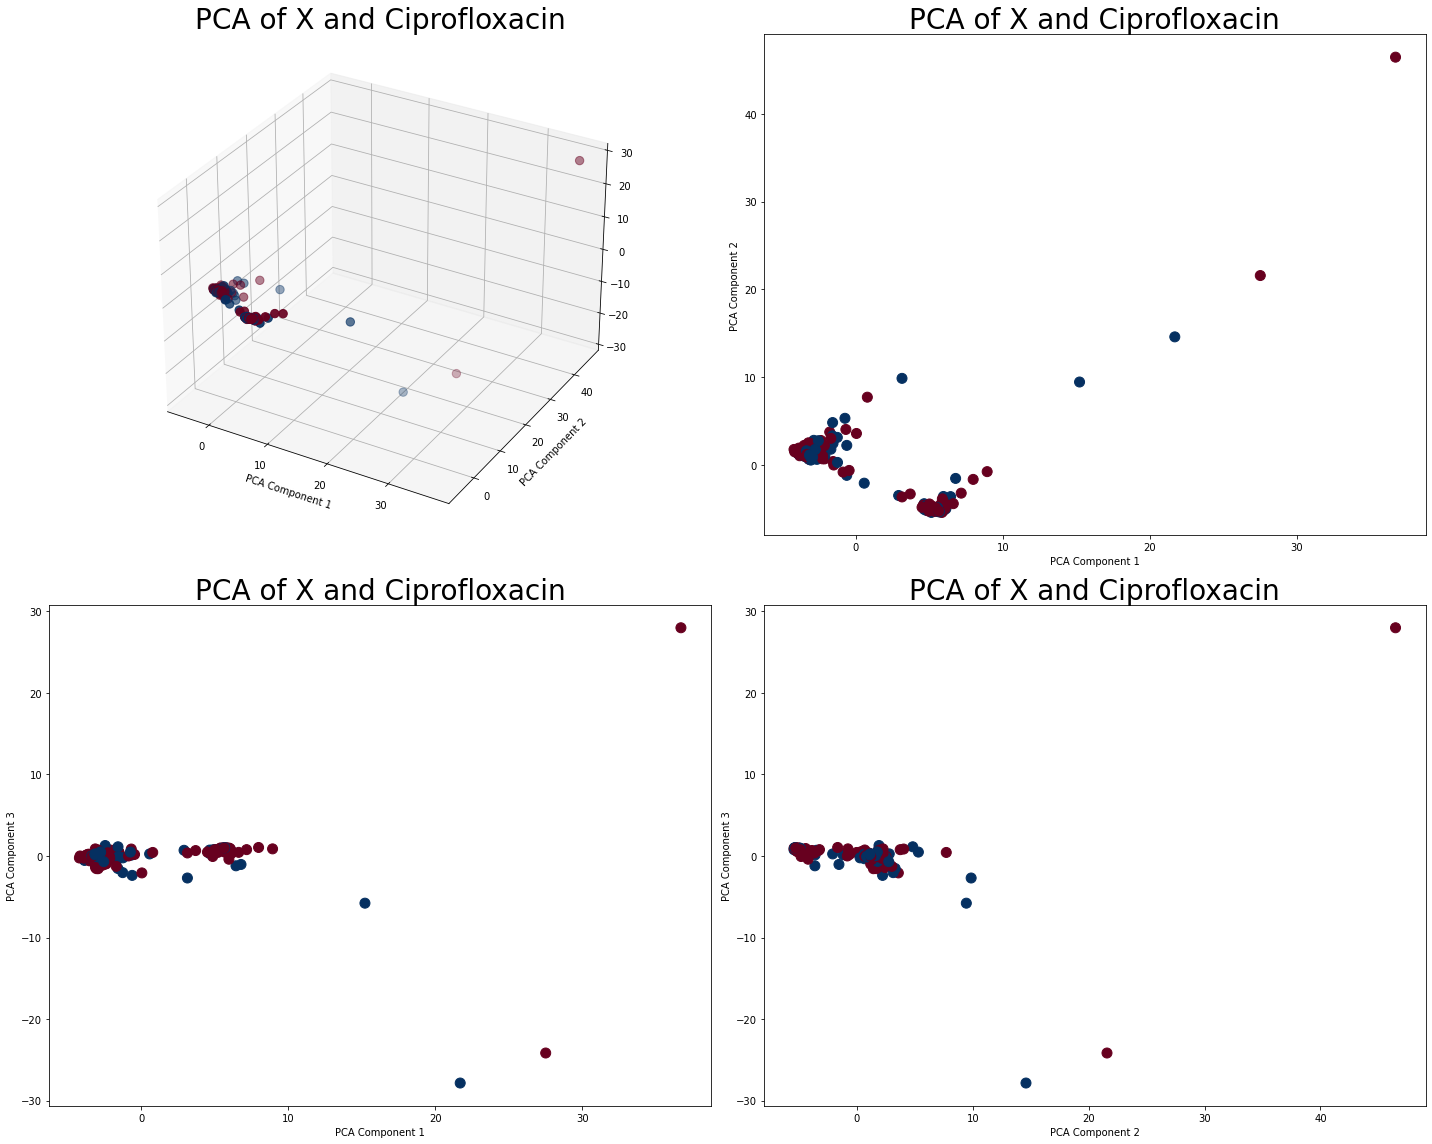

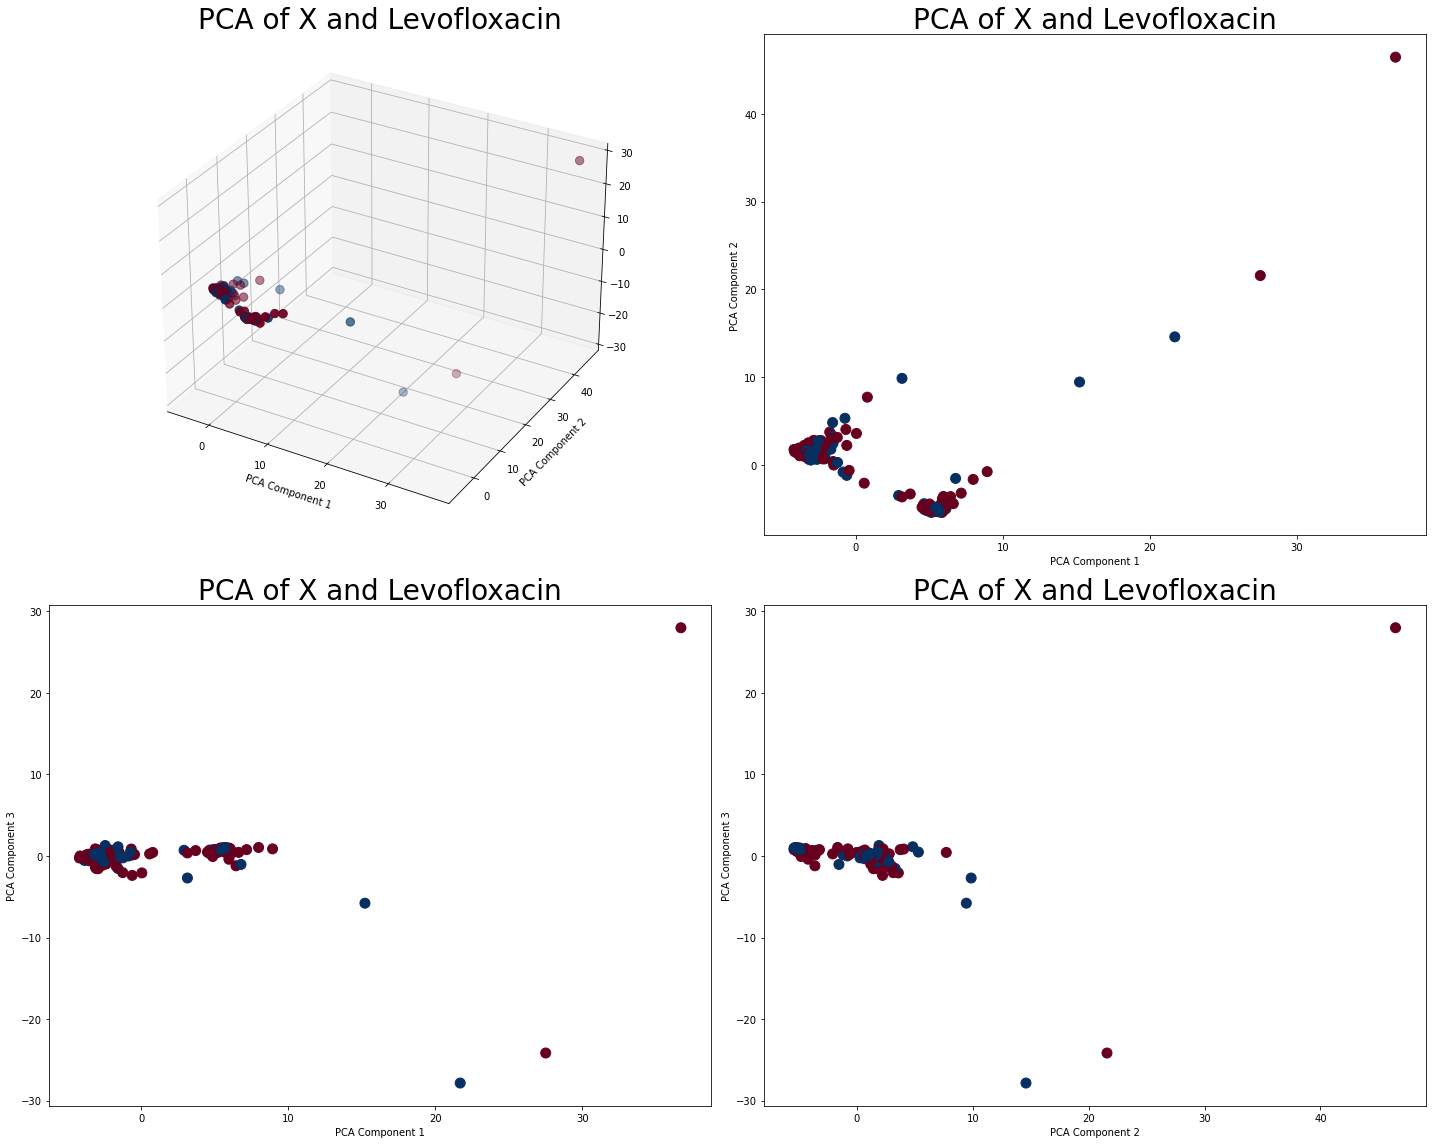

In [19]:
for i in ['Clarithromycin', 'Metronidazole', 'Tetracycline', 'Amoxicillin', 'Ciprofloxacin', 'Levofloxacin', 'Rifampicin ']:
    drug_name=i

    cmap = plt.cm.get_cmap('RdBu', 2)
    colors = cmap(np.linspace(0, 1,2))
    color_mapping = np.array([colors[int(value)] for value in y[drug_name]])

    fig = plt.figure(figsize=(20, 16))
    ax1 = fig.add_subplot(2, 2, 1, projection='3d')
    ax2 = fig.add_subplot(2, 2, 2)
    ax3 = fig.add_subplot(2, 2, 3)
    ax4 = fig.add_subplot(2, 2, 4)

    ax1.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=color_mapping, s=70)
    ax1.set_xlabel('PCA Component 1')
    ax1.set_ylabel('PCA Component 2')
    ax1.set_title('PCA of X and {}'.format(i),fontsize=28)

    ax2.scatter(X_reduced[:, 0], X_reduced[:, 1],c=color_mapping, s=100)
    ax2.set_xlabel('PCA Component 1')
    ax2.set_ylabel('PCA Component 2')
    ax2.set_title('PCA of X and {}'.format(i), fontsize=28)

    ax3.scatter(X_reduced[:, 0], X_reduced[:, 2],c=color_mapping, s=100)
    ax3.set_xlabel('PCA Component 1')
    ax3.set_ylabel('PCA Component 3')
    ax3.set_title('PCA of X and {}'.format(i), fontsize=28)

    ax4.scatter(X_reduced[:, 1], X_reduced[:, 2],c=color_mapping, s=100)
    ax4.set_xlabel('PCA Component 2')
    ax4.set_ylabel('PCA Component 3')
    ax4.set_title('PCA of X and {}'.format(i), fontsize=28)

    plt.tight_layout()
    plt.show()


Best eps: 1.8
Best min_samples: 2
Best silhouette score: 0.8410254629004243
Number of clusters: 2


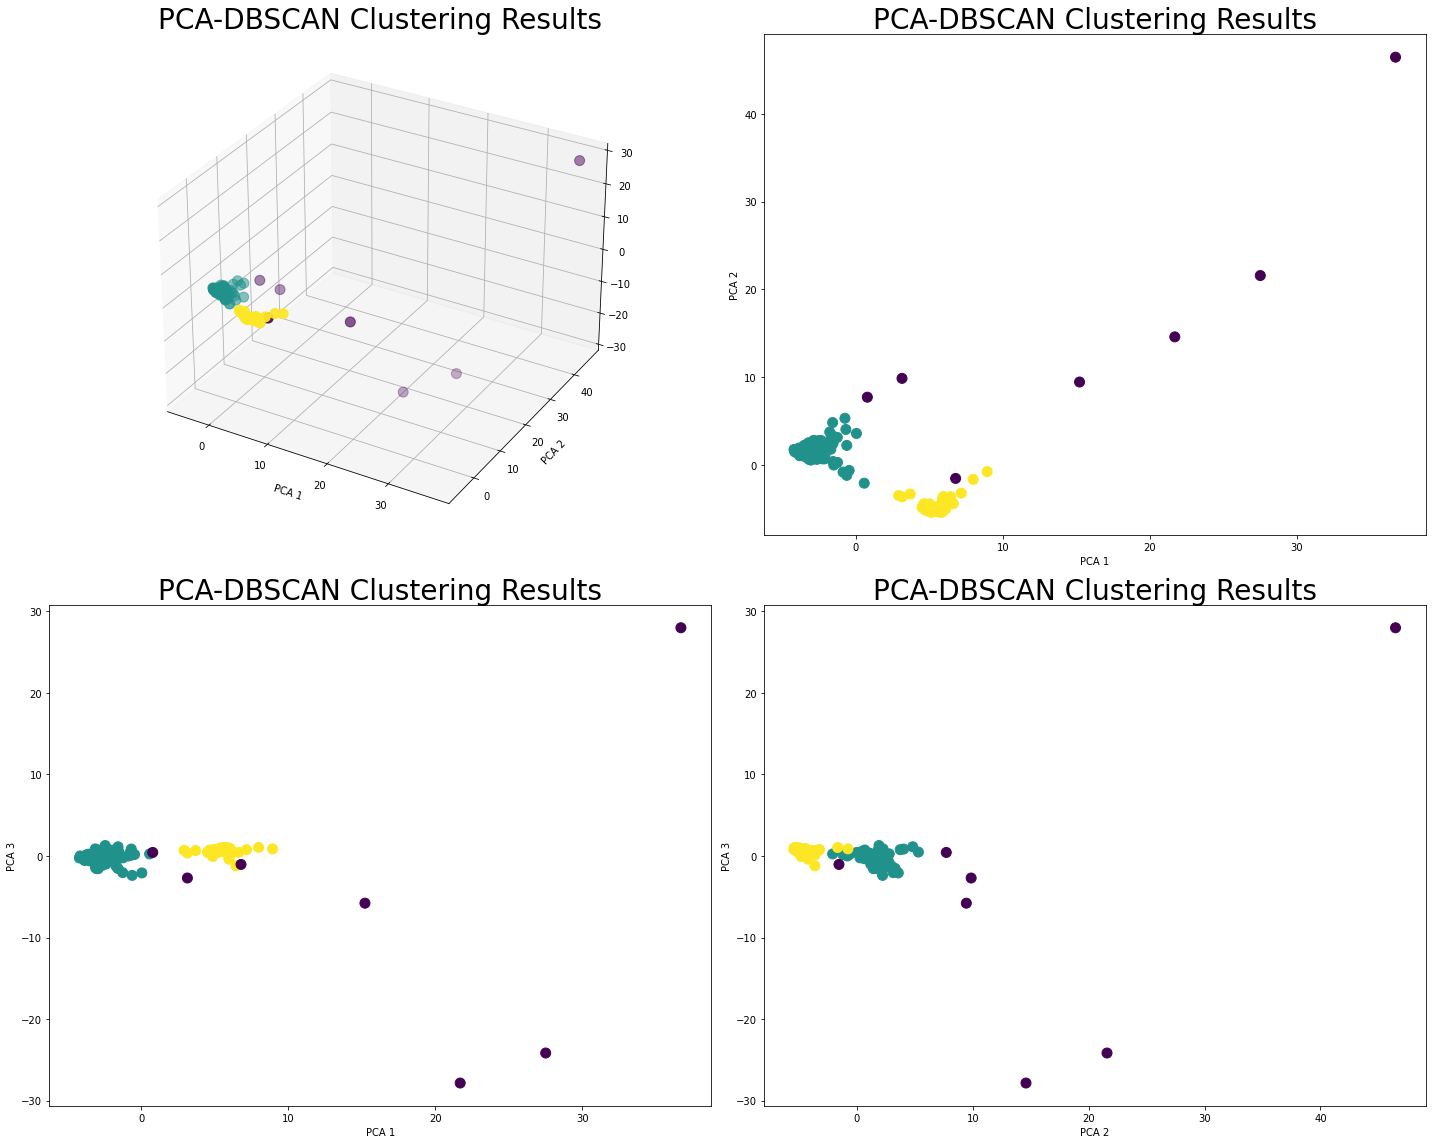

In [20]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Define a range of parameter values to search over
eps_range = np.linspace(0.1, 2.0, num=20)
min_samples_range = range(2, 10)

# Perform a grid search over the parameter values
best_score = -1
best_eps = None
best_min_samples = None

for eps in eps_range:
    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(X_reduced)
        n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
        if n_clusters > 1:
            score = silhouette_score(X_reduced, clusters)
            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples

# Print the best parameter values and the corresponding silhouette score
print('Best eps:', best_eps)
print('Best min_samples:', best_min_samples)
print('Best silhouette score:', best_score)

# Apply DBSCAN clustering with the best parameter values
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
clusters = dbscan.fit_predict(X_reduced)

# Print the number of clusters
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
print('Number of clusters:', n_clusters)



fig = plt.figure(figsize=(20, 16))
ax1 = fig.add_subplot(2, 2, 1, projection='3d')
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

ax1.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=clusters, cmap='viridis', s=100)
ax1.set_xlabel('PCA 1')
ax1.set_ylabel('PCA 2')
ax1.set_title('PCA-DBSCAN Clustering Results', fontsize=28)


ax2.scatter(X_reduced[:, 0], X_reduced[:, 1], c=clusters, cmap='viridis', s=100)
ax2.set_xlabel('PCA 1')
ax2.set_ylabel('PCA 2')
ax2.set_title('PCA-DBSCAN Clustering Results', fontsize=28)

ax3.scatter(X_reduced[:, 0], X_reduced[:, 2], c=clusters, cmap='viridis', s=100)
ax3.set_xlabel('PCA 1')
ax3.set_ylabel('PCA 3')
ax3.set_title('PCA-DBSCAN Clustering Results', fontsize=28)

ax4.scatter(X_reduced[:, 1], X_reduced[:, 2], c=clusters, cmap='viridis', s=100)
ax4.set_xlabel('PCA 2')
ax4.set_ylabel('PCA 3')
ax4.set_title('PCA-DBSCAN Clustering Results', fontsize=28)

plt.tight_layout()
plt.show()

In [21]:
clusters = dbscan.fit_predict(X_reduced)
cluster_PCA_DBSCAN=clusters


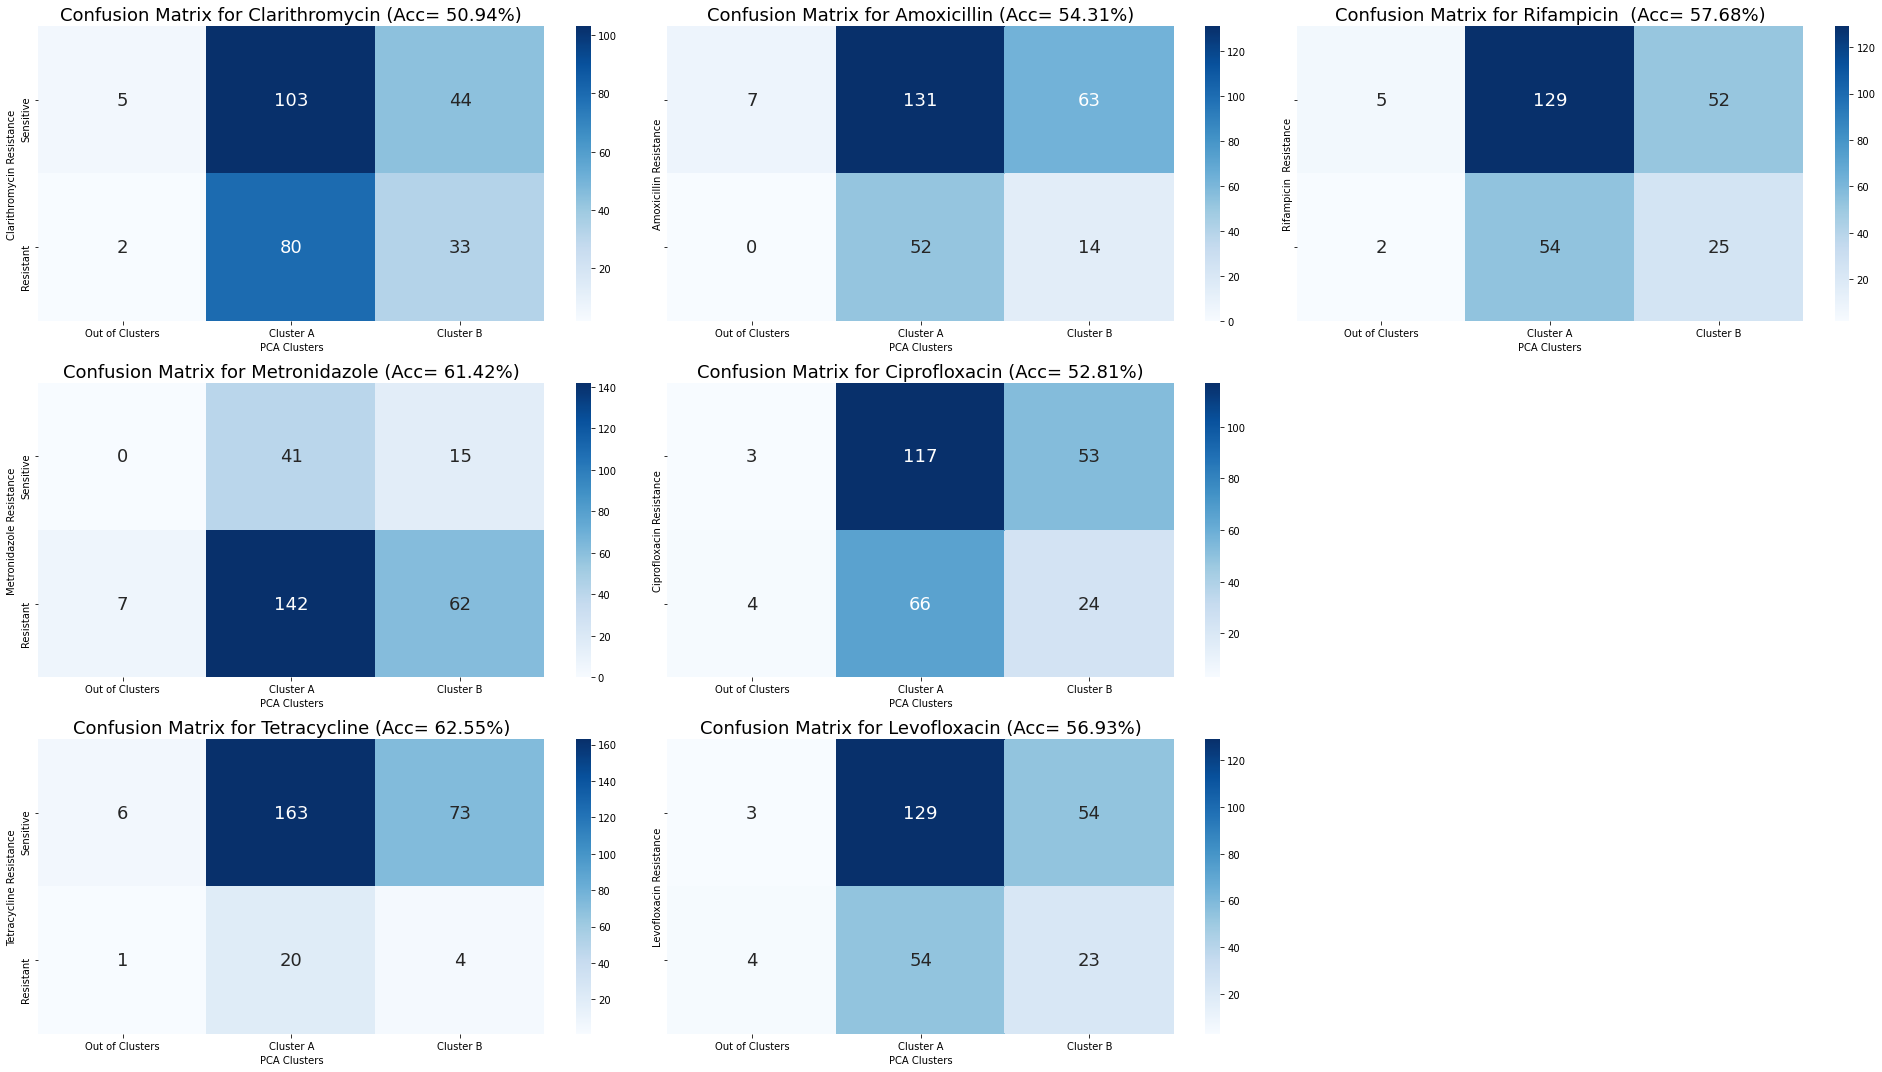

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(27, 15), sharey=True)
x_axs = 0
y_axs = 0

drug_names = ['Clarithromycin', 'Metronidazole', 'Tetracycline', 'Amoxicillin', 'Ciprofloxacin', 'Levofloxacin', 'Rifampicin ']

for i, drug_name in enumerate(drug_names):

    drug_idx = y.columns.tolist().index(drug_name)
    y_true = y.iloc[:, drug_idx].astype(int).values

    cm = confusion_matrix(y_true, clusters)
    acc = accuracy_score(y_true, clusters)

    if acc<0.5:
        acc=1-acc

    cm = np.delete(cm, 0, axis=0)

    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', ax=axs[x_axs,y_axs],
                annot_kws={"fontsize":18},
                xticklabels=['Out of Clusters','Cluster A', 'Cluster B'], yticklabels=['Sensitive', 'Resistant'])
    axs[x_axs,y_axs].set_xlabel('PCA Clusters')
    axs[x_axs,y_axs].set_ylabel('{} Resistance'.format(drug_name))
    axs[x_axs,y_axs].set_title('Confusion Matrix for {} (Acc= {}%)'.format(drug_name, round(acc*100,2)),fontsize=18)

    x_axs += 1
    if x_axs > 2:
        x_axs = 0
        y_axs += 1

axs[1,2].set_visible(False)
axs[2,2].set_visible(False)

plt.tight_layout()
plt.show()



### NMF

In [38]:
#normalization of data
#https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0164880 explaining why I chosed maximum norm for standardization of nmf input

X=X.astype(int)
def max_norm(col):
    max_abs_value = np.max(np.abs(col))
    return col / max_abs_value

X_maxnorm = X.apply(max_norm)
X_maxnorm 



Patient Age  Patient Sex  Ethnicity  PUD  GIitis  HP0256  HPP12_RS02320+  \
0       0.674699          1.0   0.333333  0.0     1.0     1.0             0.0   
1       0.626506          1.0   0.333333  0.0     1.0     1.0             0.0   
2       0.662651          0.0   1.000000  1.0     0.0     0.0             1.0   
3       0.698795          0.0   0.333333  0.0     1.0     1.0             1.0   
4       0.650602          0.0   0.666667  0.0     1.0     1.0             0.0   
..           ...          ...        ...  ...     ...     ...             ...   
262     0.506024          1.0   0.000000  0.0     1.0     1.0             0.0   
263     0.506024          1.0   0.000000  0.0     1.0     1.0             0.0   
264     0.518072          0.0   0.333333  0.0     1.0     1.0             0.0   
265     0.662651          0.0   0.000000  0.0     1.0     1.0             0.0   
266     0.385542          1.0   0.333333  0.0     1.0     1.0             0.0   

     HPP12_RS02335+  HPP12_RS02375  HPP12_RS02380+  ...  virB2_cagC  \
0               0.0            0.0             0.0  ...         1.0   
1               0.0            0.0             1.0  ...         1.0   
2               1.0            0.0             0.0  ...         0.0   
3               1.0            1.0             1.0  ...         1.0   
4               1.0            0.0             1.0  ...         1.0   
..              ...            ...             ...  ...         ...   
262             0.0            0.0             0.0  ...         1.0   
263             0.0            0.0             0.0  ...         1.0   
264             0.0            0.0             1.0  ...         1.0   
265             1.0            0.0             0.0  ...         1.0   
266             1.0            0.0             0.0  ...         1.0   

     virB4_cagE  virB5_cagL  virB6_cagW  virB7_cagT  virB8_cagV  virB9_cagX  \
0           1.0         1.0         1.0         1.0         1.0         1.0   
1           1.0         1.0         1.0         1.0         1.0         1.0   
2           0.0         0.0         0.0         0.0         0.0         0.0   
3           1.0         1.0         1.0         1.0         1.0         0.0   
4           1.0         1.0         1.0         1.0         1.0         1.0   
..          ...         ...         ...         ...         ...         ...   
262         1.0         1.0         1.0         1.0         1.0         1.0   
263         1.0         1.0         1.0         1.0         1.0         1.0   
264         1.0         1.0         1.0         1.0         1.0         1.0   
265         1.0         1.0         1.0         1.0         1.0         1.0   
266         1.0         1.0         1.0         1.0         1.0         1.0   

     virD4_cag5  wbcJ  ylxH  
0           1.0   1.0   1.0  
1           1.0   1.0   1.0  
2           0.0   1.0   1.0  
3           1.0   1.0   1.0  
4           1.0   1.0   1.0  
..          ...   ...   ...  
262         1.0   1.0   1.0  
263         1.0   1.0   1.0  
264         1.0   1.0   1.0  
265         1.0   1.0   1.0  
266         1.0   1.0   1.0  

[267 rows x 156 columns]

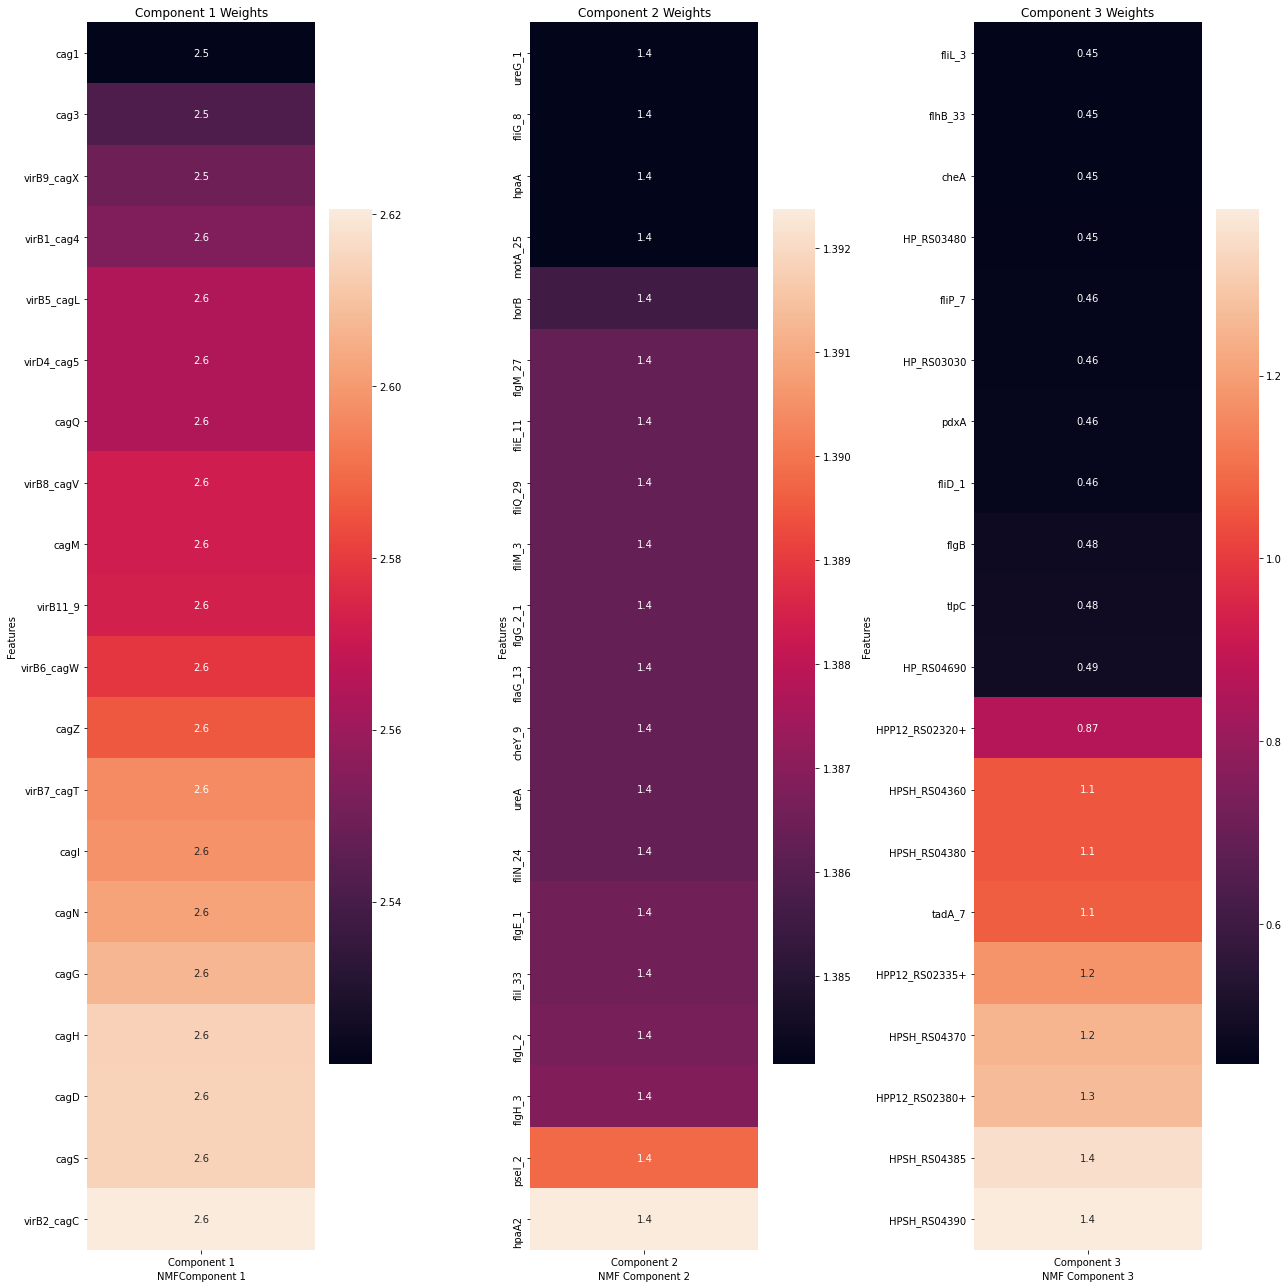

In [58]:
from sklearn.decomposition import NMF

nmf = NMF(n_components=3)
nmf = nmf.fit(X_maxnorm)
weights = nmf.components_.T
weights_df = pd.DataFrame(weights, columns=['Component 1', 'Component 2', 'Component 3'], index=X.columns[:])

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 18))

weights_df_filternmf1=weights_df.iloc[weights_df['Component 1'].abs().argsort()[::-1][:20]] #selecting top 20 with absoloute coef
sns.heatmap(weights_df_filternmf1.iloc[:,0:1].sort_values(by="Component 1"), annot=True, ax=axs[0])
axs[0].set_title('Component 1 Weights')
axs[0].set_xlabel('NMFComponent 1')
axs[0].set_ylabel('Features')

weights_df_filternmf2=weights_df.iloc[weights_df['Component 2'].abs().argsort()[::-1][:20]] #selecting top 20 with absoloute coef
sns.heatmap(weights_df_filternmf2.iloc[:,1:2].sort_values(by="Component 2"), annot=True, ax=axs[1])
axs[1].set_title('Component 2 Weights')
axs[1].set_xlabel('NMF Component 2')
axs[1].set_ylabel('Features')

weights_df_filternmf3=weights_df.iloc[weights_df['Component 3'].abs().argsort()[::-1][:20]] #selecting top 20 with absoloute coef
sns.heatmap(weights_df_filternmf3.iloc[:,2:3].sort_values(by="Component 3"), annot=True, ax=axs[2])
axs[2].set_title('Component 3 Weights')
axs[2].set_xlabel('NMF Component 3')
axs[2].set_ylabel('Features')

plt.tight_layout()
plt.show()

In [63]:
nmf = NMF(n_components=3)
nmf = nmf.fit_transform(X_maxnorm)
X_reduced = nmf[:, :3]

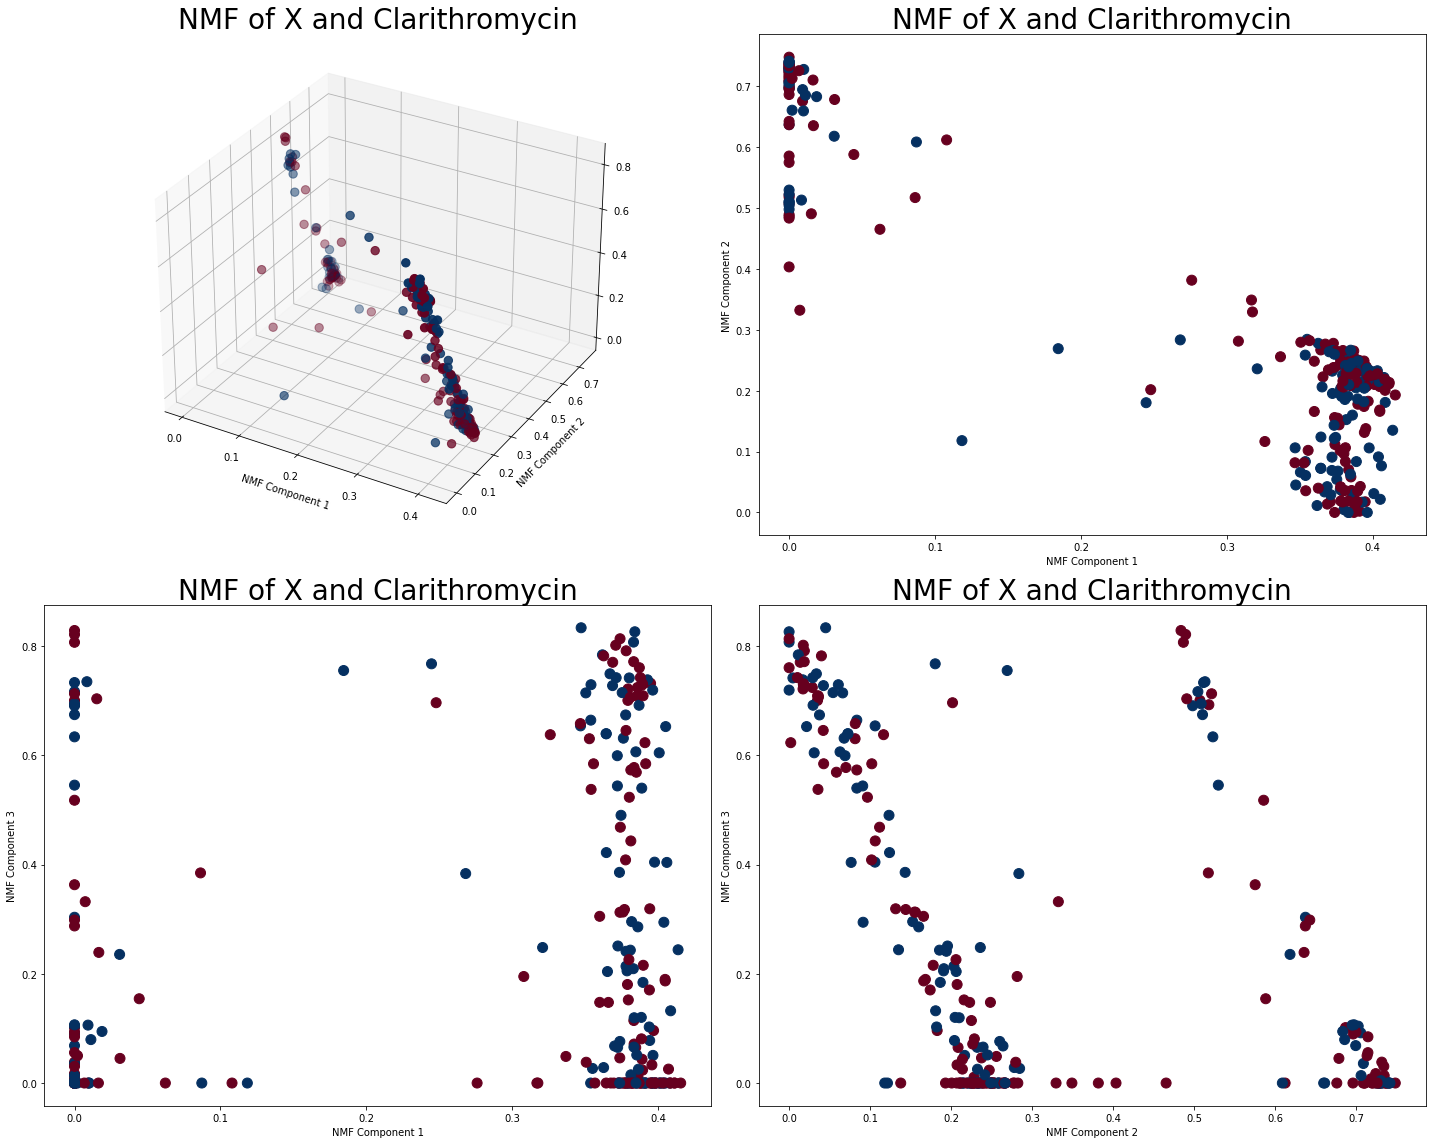

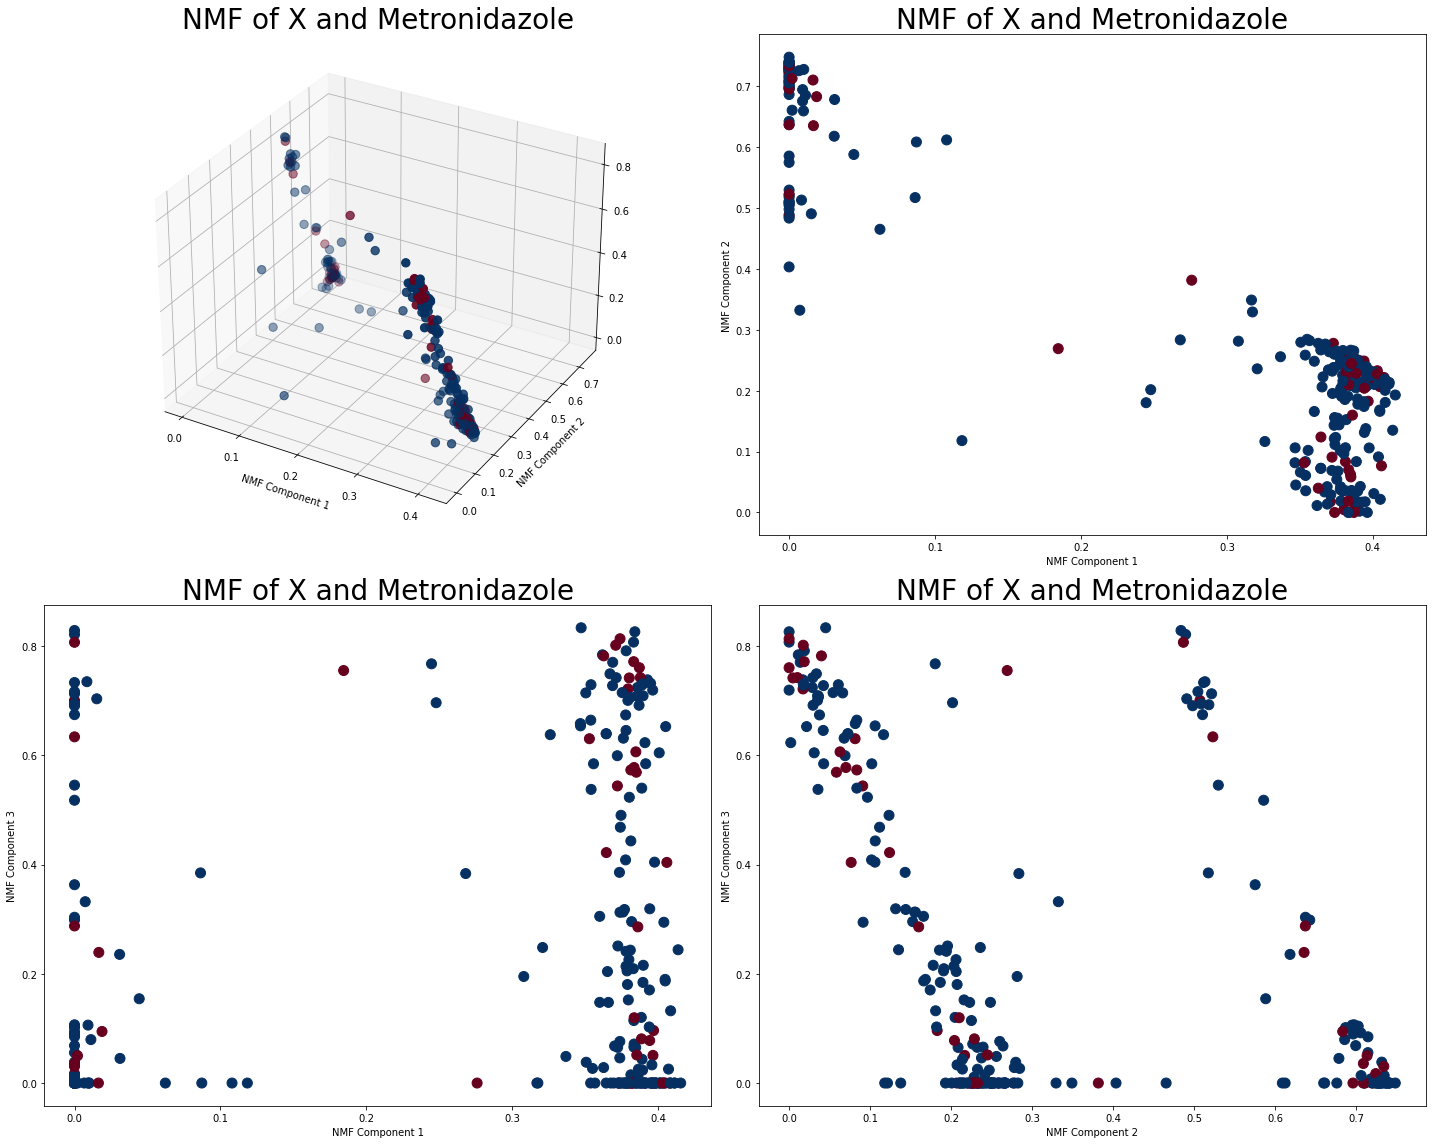

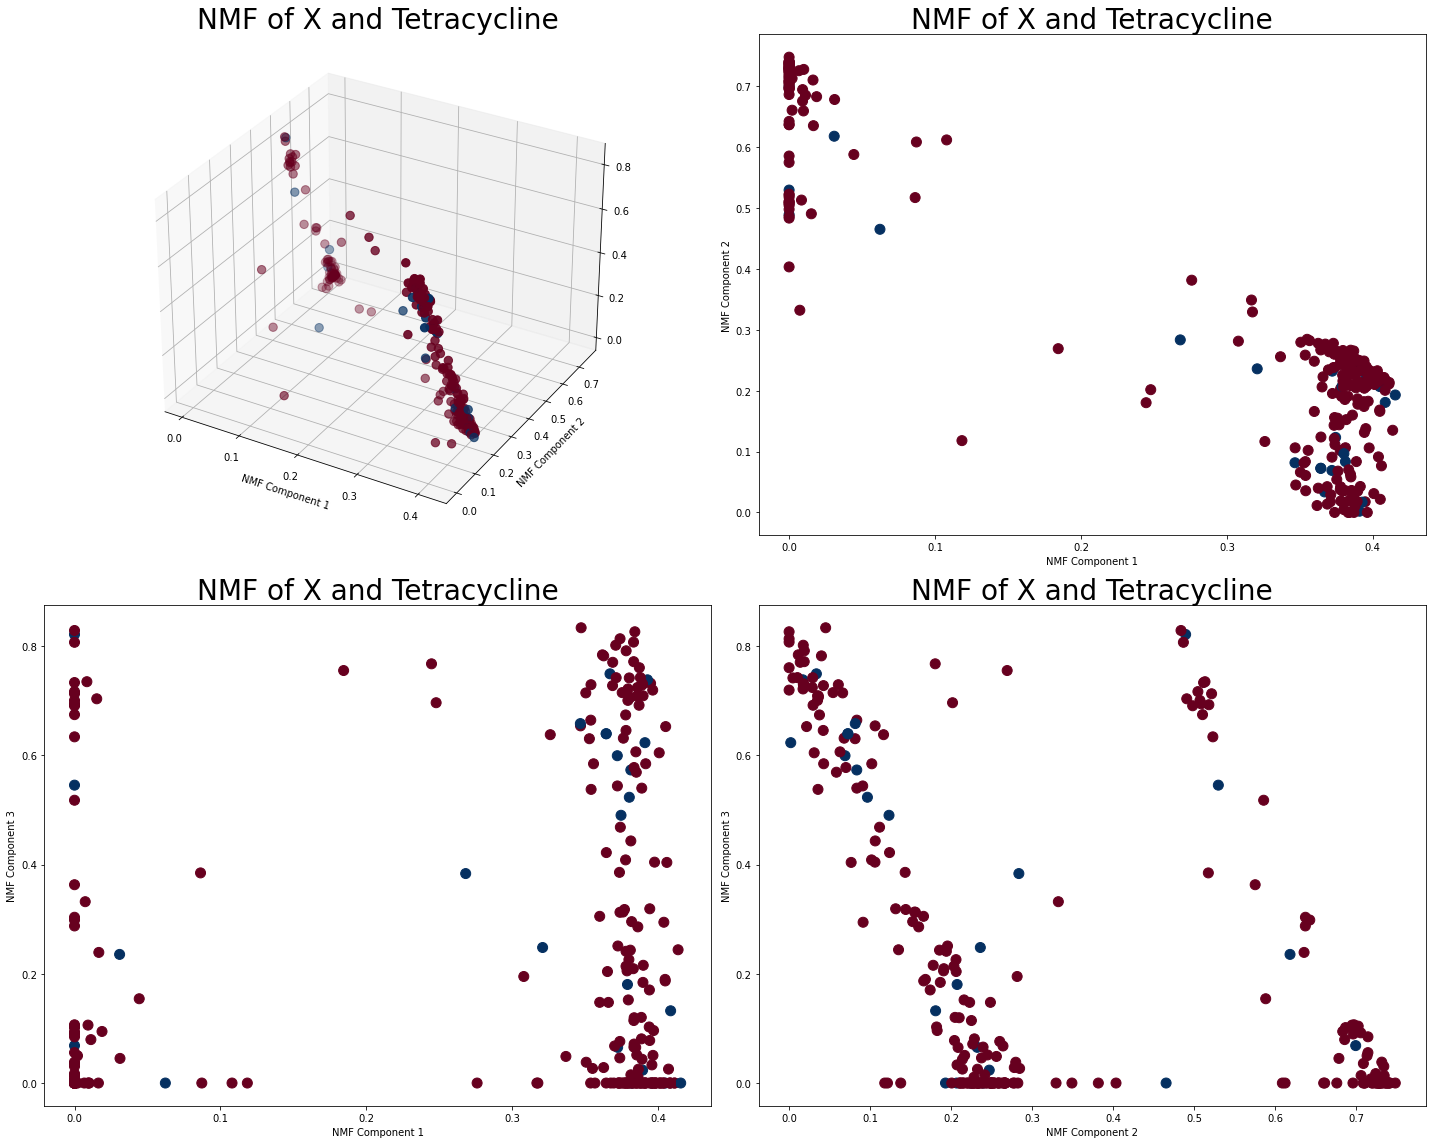

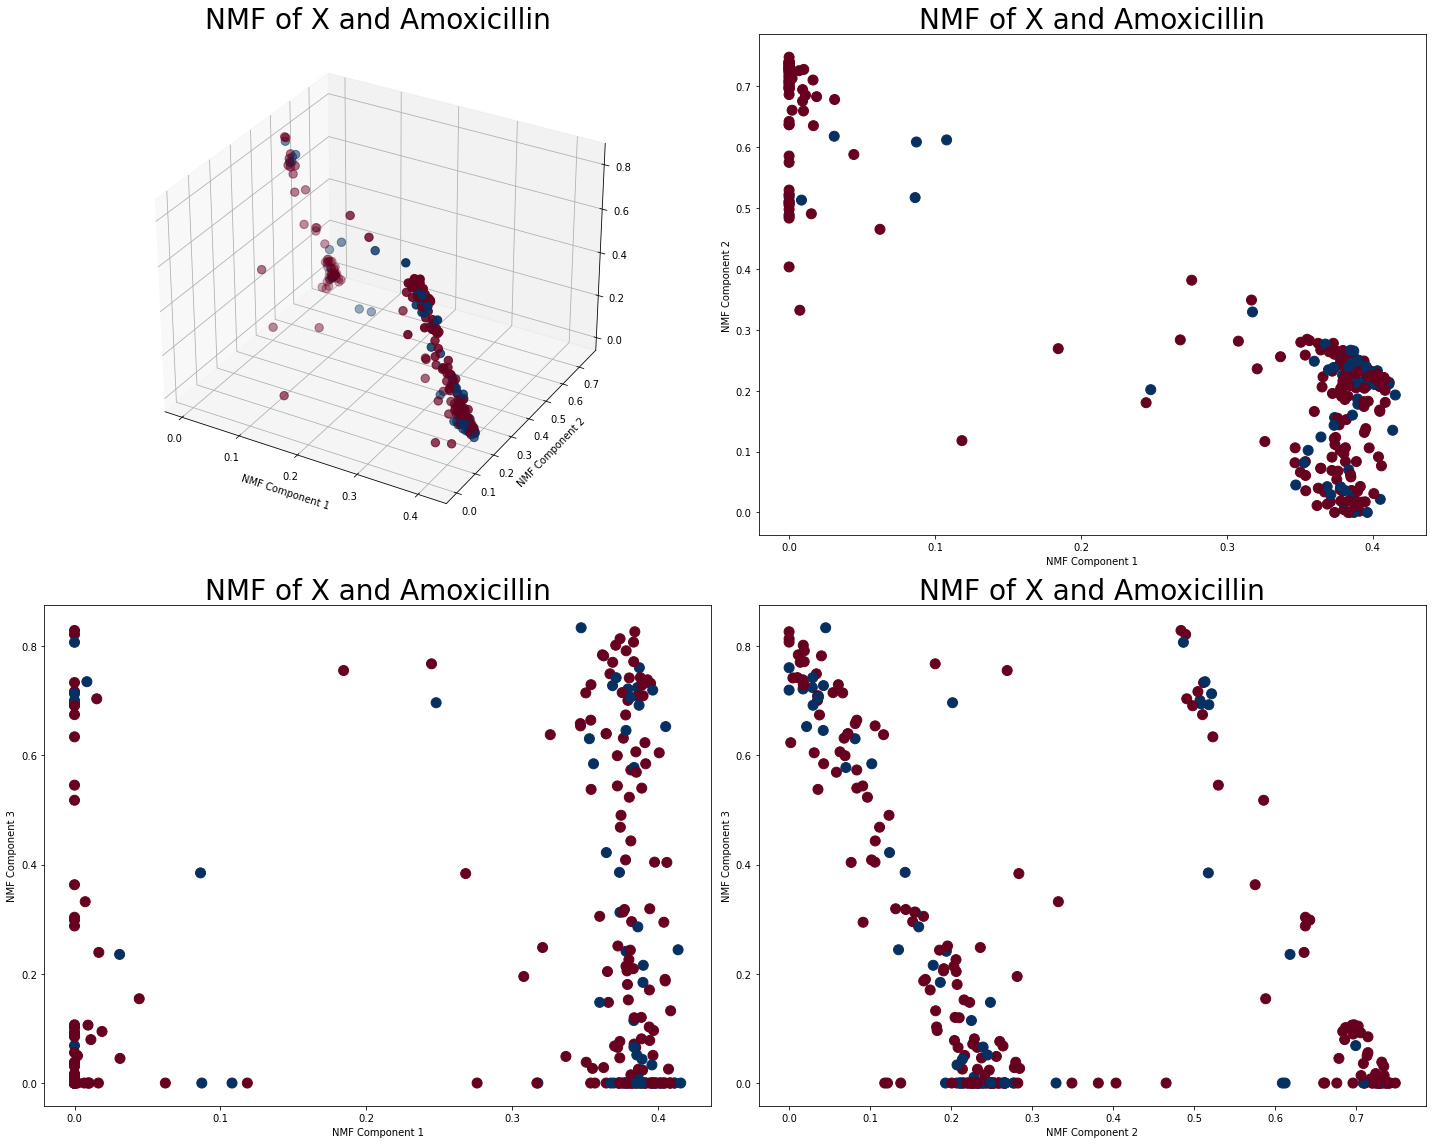

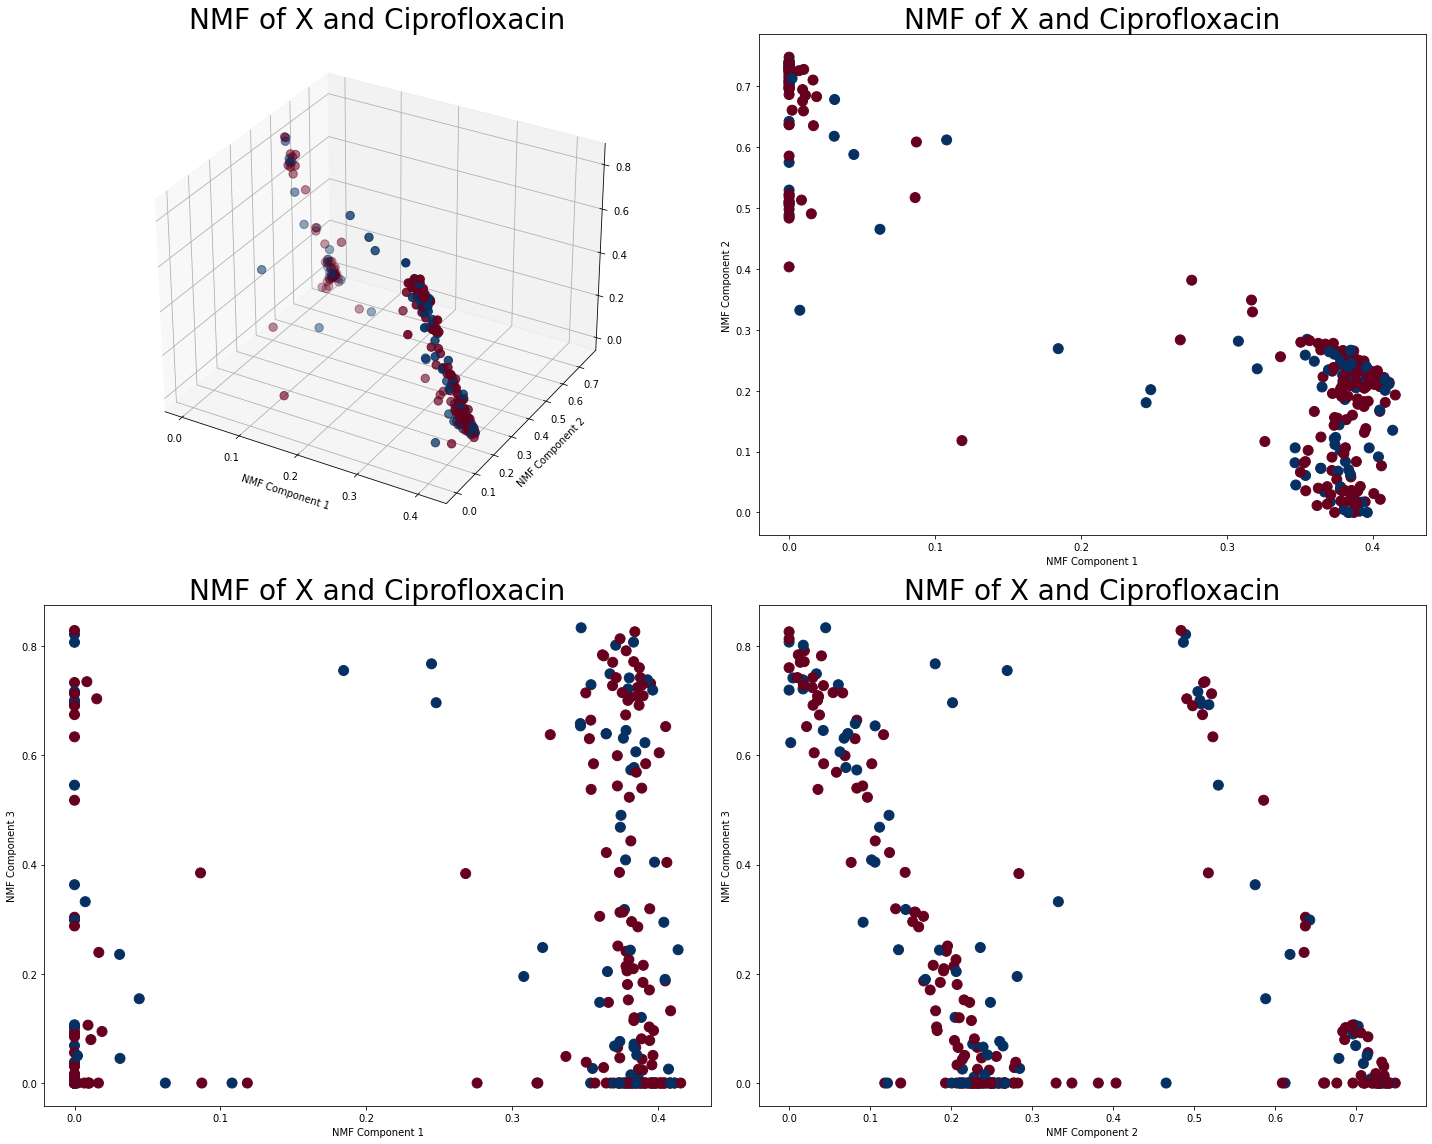

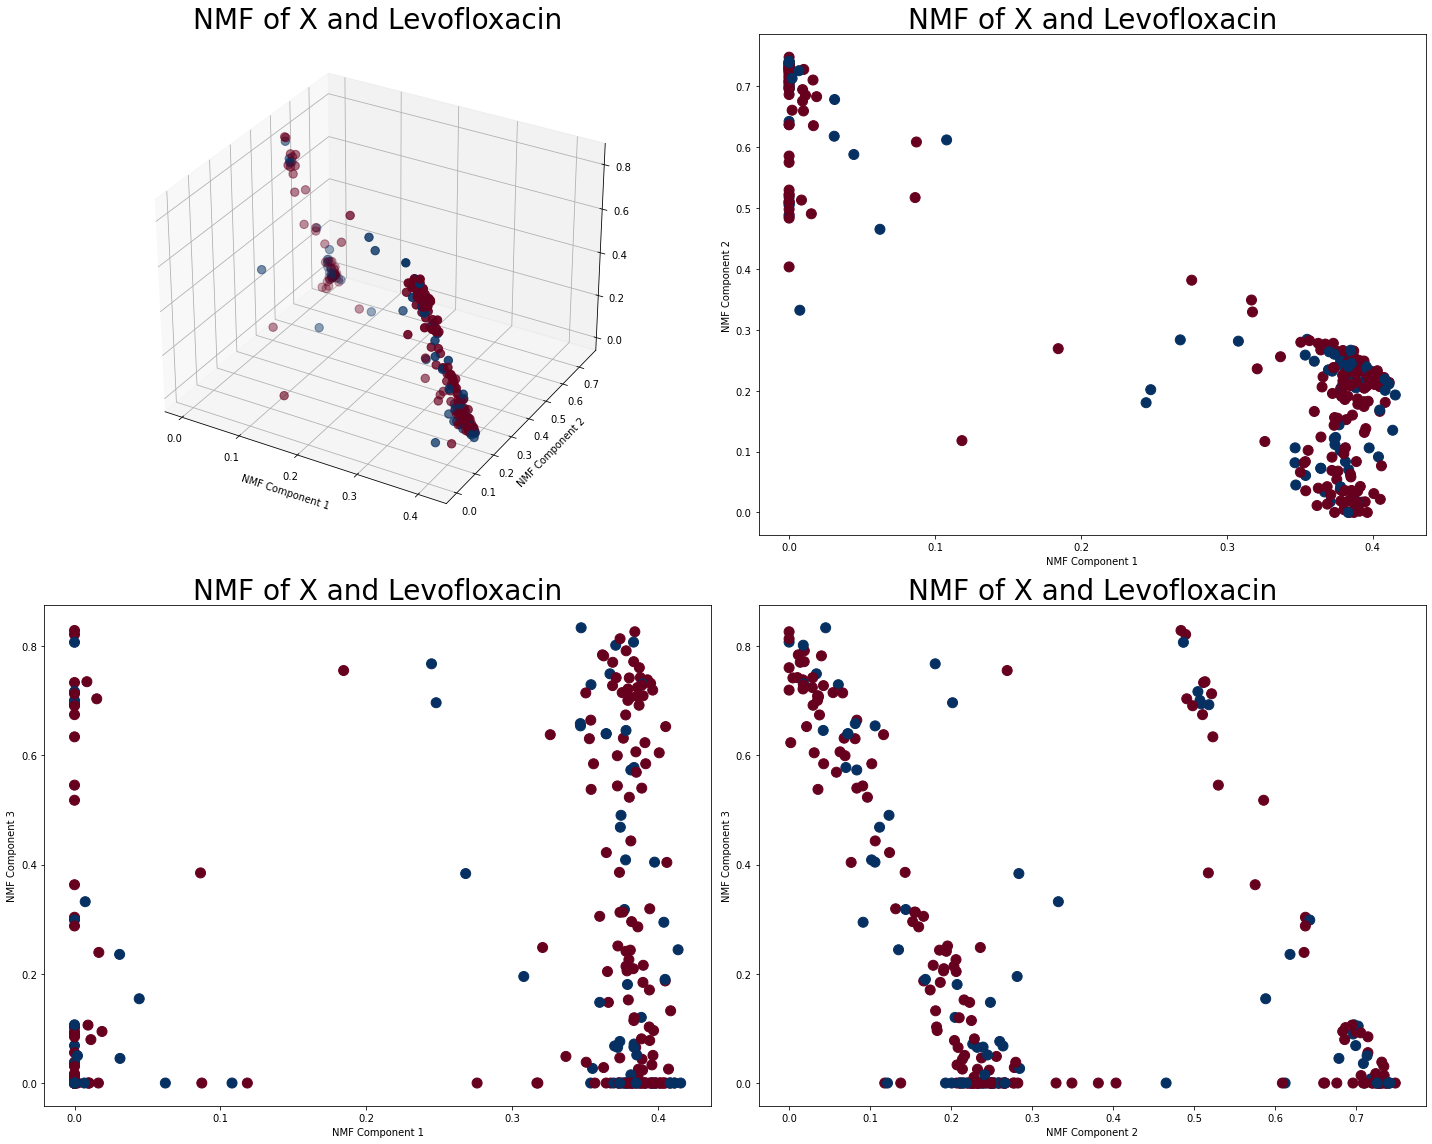

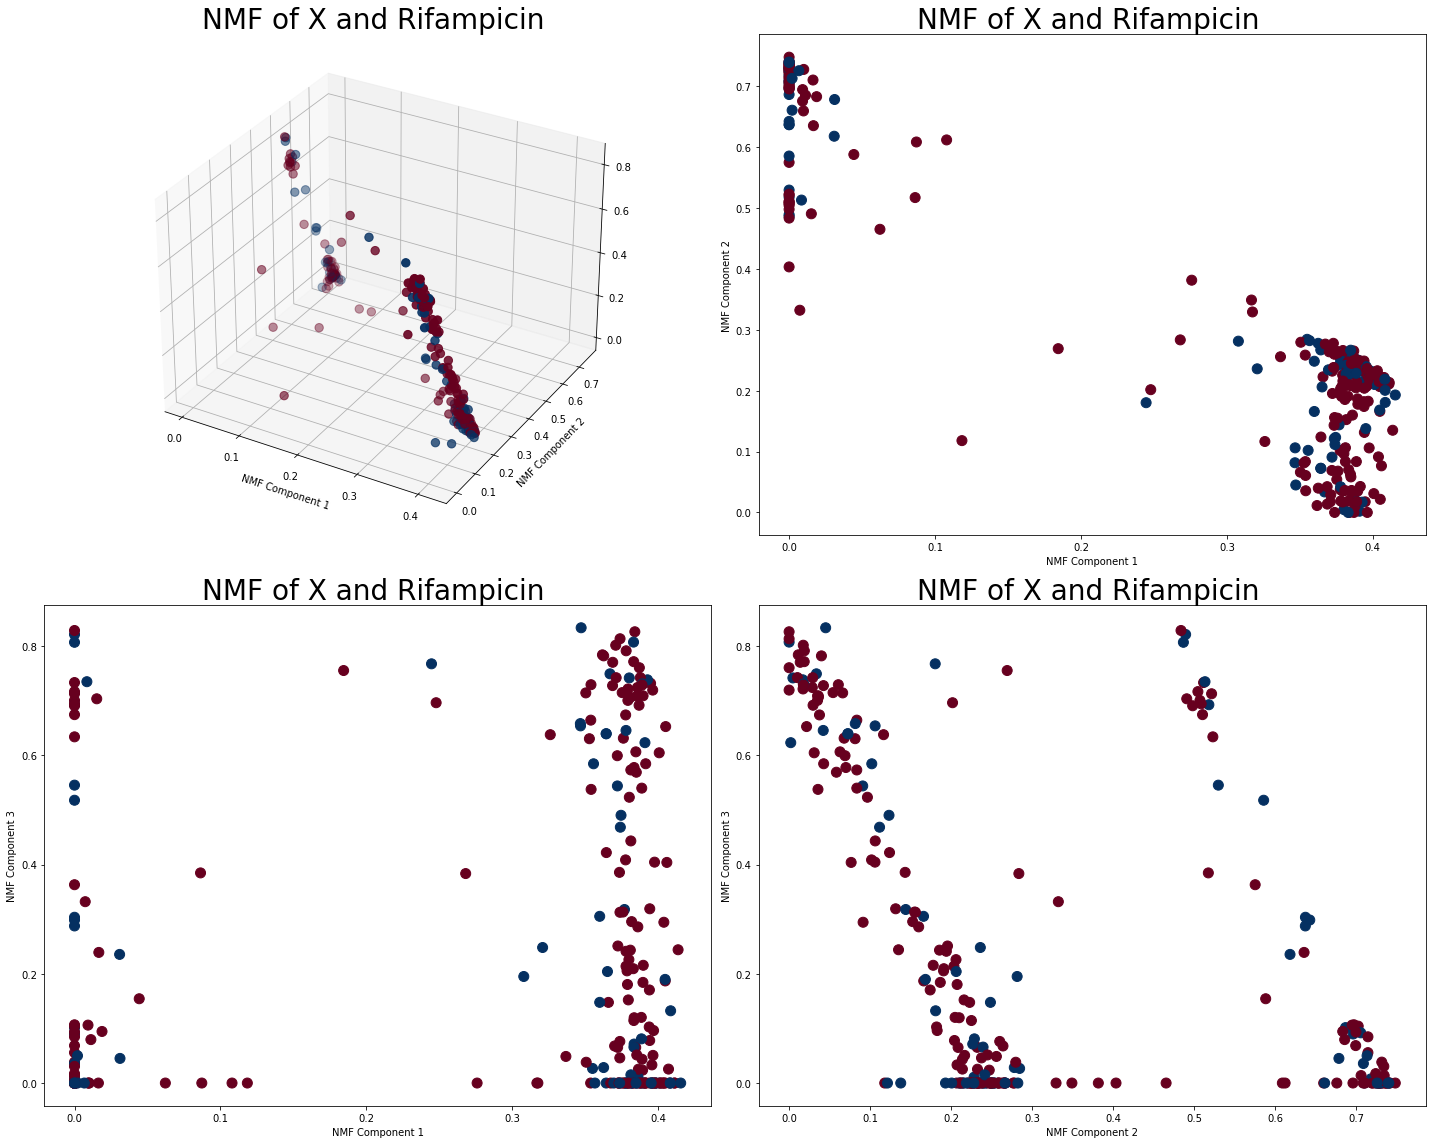

In [64]:
for i in ['Clarithromycin', 'Metronidazole', 'Tetracycline', 'Amoxicillin', 'Ciprofloxacin', 'Levofloxacin', 'Rifampicin ']:
    drug_name=i

    cmap = plt.cm.get_cmap('RdBu', 2)
    colors = cmap(np.linspace(0, 1,2))
    color_mapping = np.array([colors[int(value)] for value in y[drug_name]])

    fig = plt.figure(figsize=(20, 16))
    ax1 = fig.add_subplot(2, 2, 1, projection='3d')
    ax2 = fig.add_subplot(2, 2, 2)
    ax3 = fig.add_subplot(2, 2, 3)
    ax4 = fig.add_subplot(2, 2, 4)

    ax1.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=color_mapping, s=70)
    ax1.set_xlabel('NMF Component 1')
    ax1.set_ylabel('NMF Component 2')
    ax1.set_title('NMF of X and {}'.format(i),fontsize=28)

    ax2.scatter(X_reduced[:, 0], X_reduced[:, 1],c=color_mapping, s=100)
    ax2.set_xlabel('NMF Component 1')
    ax2.set_ylabel('NMF Component 2')
    ax2.set_title('NMF of X and {}'.format(i), fontsize=28)

    ax3.scatter(X_reduced[:, 0], X_reduced[:, 2],c=color_mapping, s=100)
    ax3.set_xlabel('NMF Component 1')
    ax3.set_ylabel('NMF Component 3')
    ax3.set_title('NMF of X and {}'.format(i), fontsize=28)

    ax4.scatter(X_reduced[:, 1], X_reduced[:, 2],c=color_mapping, s=100)
    ax4.set_xlabel('NMF Component 2')
    ax4.set_ylabel('NMF Component 3')
    ax4.set_title('NMF of X and {}'.format(i), fontsize=28)

    plt.tight_layout()
    plt.show()


Best eps: 0.1
Best min_samples: 7
Best silhouette score: 0.4684010201430799
Number of clusters: 3


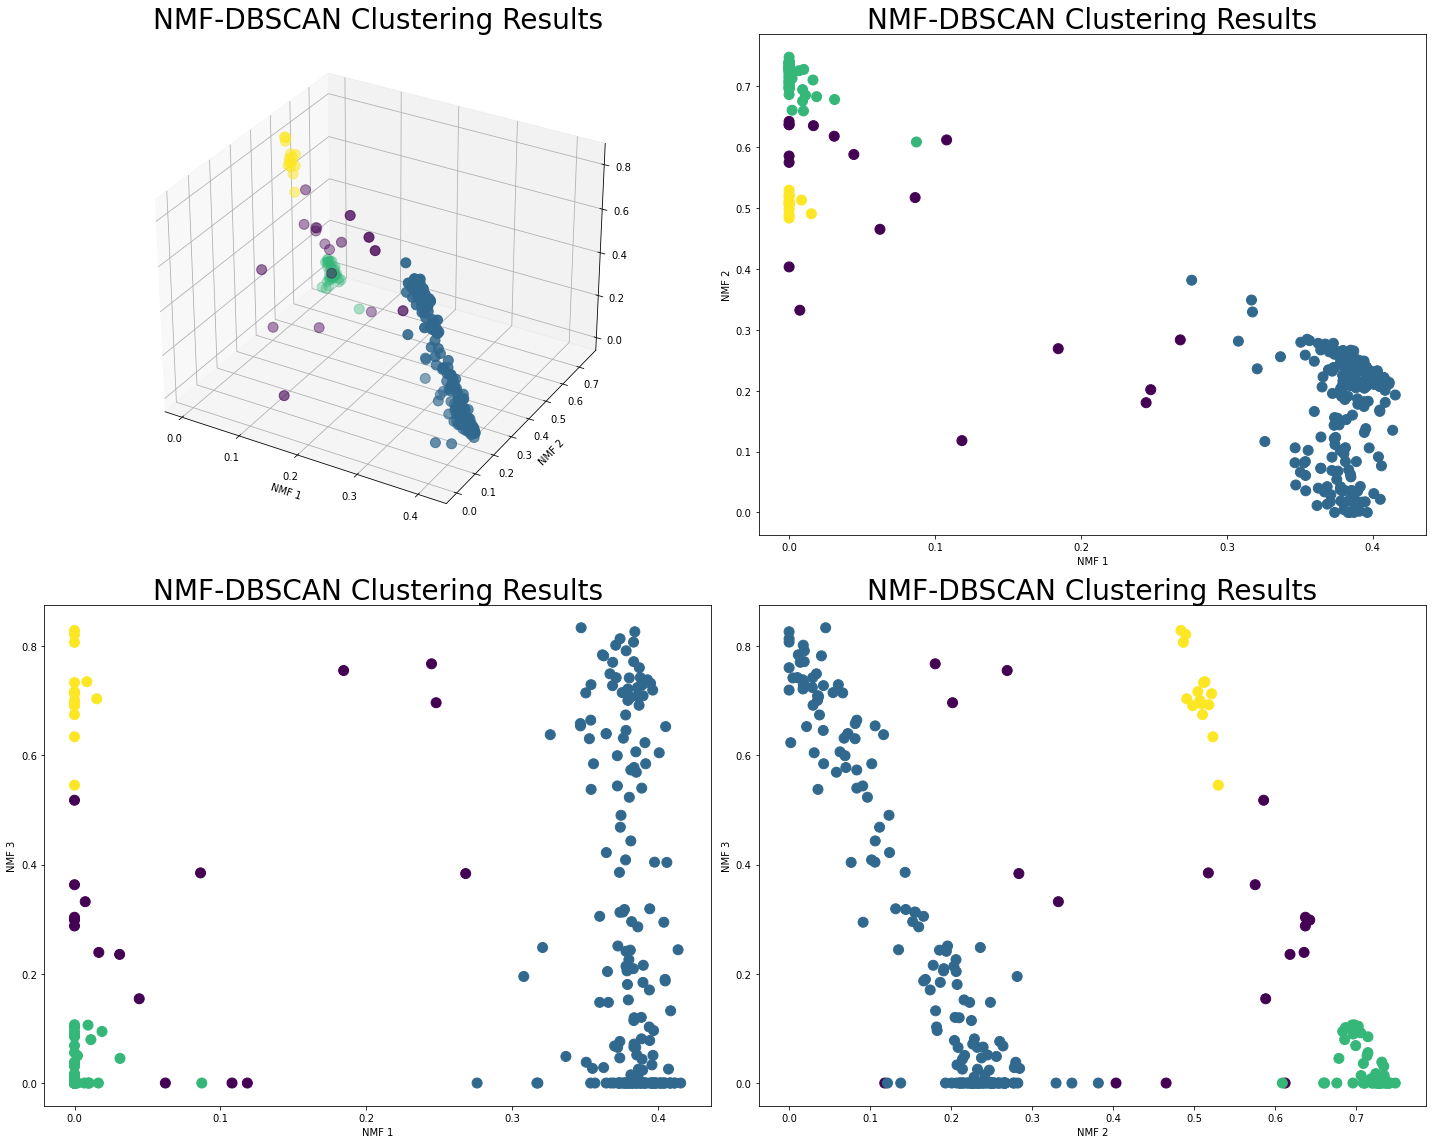

In [65]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Define a range of parameter values to search over
eps_range = np.linspace(0.1, 2.0, num=20)
min_samples_range = range(2, 10)

# Perform a grid search over the parameter values
best_score = -1
best_eps = None
best_min_samples = None

for eps in eps_range:
    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(X_reduced)
        n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
        if n_clusters > 1:
            score = silhouette_score(X_reduced, clusters)
            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples

# Print the best parameter values and the corresponding silhouette score
print('Best eps:', best_eps)
print('Best min_samples:', best_min_samples)
print('Best silhouette score:', best_score)

# Apply DBSCAN clustering with the best parameter values
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
clusters = dbscan.fit_predict(X_reduced)

# Print the number of clusters
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
print('Number of clusters:', n_clusters)



fig = plt.figure(figsize=(20, 16))
ax1 = fig.add_subplot(2, 2, 1, projection='3d')
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

ax1.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=clusters, cmap='viridis', s=100)
ax1.set_xlabel('NMF 1')
ax1.set_ylabel('NMF 2')
ax1.set_title('NMF-DBSCAN Clustering Results', fontsize=28)


ax2.scatter(X_reduced[:, 0], X_reduced[:, 1], c=clusters, cmap='viridis', s=100)
ax2.set_xlabel('NMF 1')
ax2.set_ylabel('NMF 2')
ax2.set_title('NMF-DBSCAN Clustering Results', fontsize=28)

ax3.scatter(X_reduced[:, 0], X_reduced[:, 2], c=clusters, cmap='viridis', s=100)
ax3.set_xlabel('NMF 1')
ax3.set_ylabel('NMF 3')
ax3.set_title('NMF-DBSCAN Clustering Results', fontsize=28)

ax4.scatter(X_reduced[:, 1], X_reduced[:, 2], c=clusters, cmap='viridis', s=100)
ax4.set_xlabel('NMF 2')
ax4.set_ylabel('NMF 3')
ax4.set_title('NMF-DBSCAN Clustering Results', fontsize=28)

plt.tight_layout()
plt.show()

In [66]:
clusters = dbscan.fit_predict(X_reduced)
cluster_NMF_DBSCAN=clusters


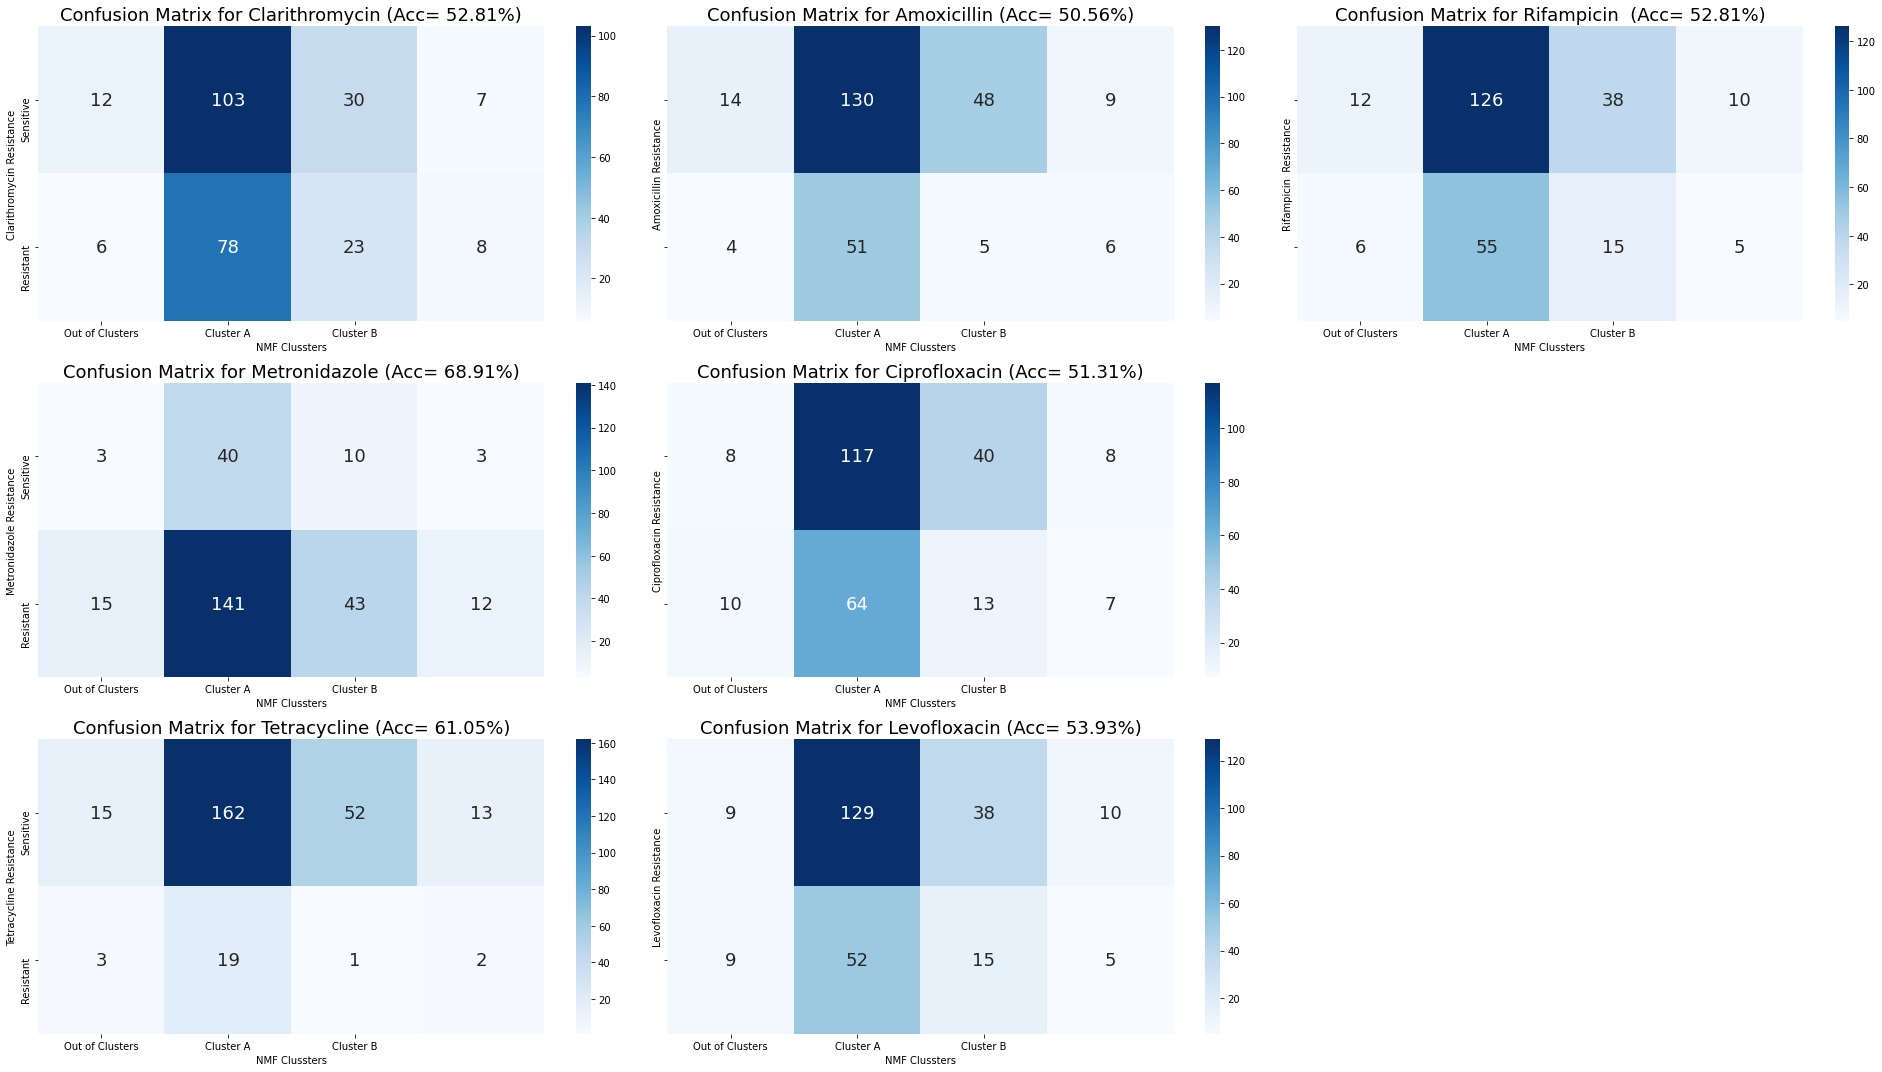

In [69]:
from sklearn.metrics import confusion_matrix, accuracy_score

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(27, 15), sharey=True)
x_axs = 0
y_axs = 0

drug_names = ['Clarithromycin', 'Metronidazole', 'Tetracycline', 'Amoxicillin', 'Ciprofloxacin', 'Levofloxacin', 'Rifampicin ']

for i, drug_name in enumerate(drug_names):

    drug_idx = y.columns.tolist().index(drug_name)
    y_true = y.iloc[:, drug_idx].astype(int).values

    cm = confusion_matrix(y_true, clusters)
    acc = accuracy_score(y_true, clusters)

    if acc<0.5:
        acc=1-acc

    cm = np.delete(cm, [0,3], axis=0)

    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', ax=axs[x_axs,y_axs],
                annot_kws={"fontsize":18},
                xticklabels=['Out of Clusters','Cluster A', 'Cluster B'], yticklabels=['Sensitive', 'Resistant'])
    axs[x_axs,y_axs].set_xlabel('NMF Clussters')
    axs[x_axs,y_axs].set_ylabel('{} Resistance'.format(drug_name))
    axs[x_axs,y_axs].set_title('Confusion Matrix for {} (Acc= {}%)'.format(drug_name, round(acc*100,2)), fontsize=18)

    x_axs += 1
    if x_axs > 2:
        x_axs = 0
        y_axs += 1

axs[1,2].set_visible(False)
axs[2,2].set_visible(False)

plt.tight_layout()
plt.show()



### best number of component NMF and PCA

In [29]:
X=df.drop(columns=['Clarithromycin', 'Metronidazole', 'Tetracycline', 'Amoxicillin',
                   'Ciprofloxacin', 'Levofloxacin', 'Rifampicin '])

The optimal number of components is 30


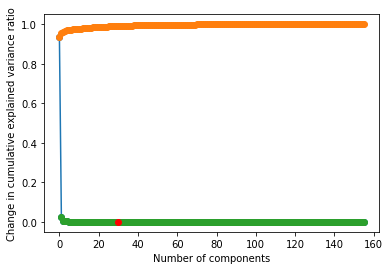

In [30]:
pca = PCA()
pca.fit(X)

# Plot the explained variance ratio as a function of the number of components
plt.plot(pca.explained_variance_ratio_, '-o')
plt.xlabel('Number of components')
plt.ylabel('Explained variance ratio')

# Plot the cumulative explained variance ratio as a function of the number of components
plt.plot(np.cumsum(pca.explained_variance_ratio_), '-o')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance ratio')

# Plot the elbow
diff = np.diff(np.cumsum(pca.explained_variance_ratio_))
plt.plot(range(1, len(diff)+1), diff, '-o')
plt.xlabel('Number of components')
plt.ylabel('Change in cumulative explained variance ratio')

# Find the elbow point using the first derivative of the cumulative explained variance ratio
elbow_index = np.where(diff < np.mean(diff))[0][0]
optimal_n_components = elbow_index + 1
print(f"The optimal number of components is {optimal_n_components}")

# Plot the elbow point
plt.plot(optimal_n_components, diff[optimal_n_components-1], 'ro')

plt.show()

In [ ]:
#### YOU left coding here. Start from here on. 

pca = PCA(n_components=3)
pca = pca.fit_transform(X)
X_reduced = pca[:, :3]


eps_range = np.linspace(0.1, 2.0, num=20)
min_samples_range = range(2, 10)

# Perform a grid search over the parameter values
best_score = -1
best_eps = None
best_min_samples = None

for eps in eps_range:
    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(X_reduced)
        n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
        if n_clusters > 1:
            score = silhouette_score(X_reduced, clusters)
            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples

# Print the best parameter values and the corresponding silhouette score
print('Best eps:', best_eps)
print('Best min_samples:', best_min_samples)
print('Best silhouette score:', best_score)

# Apply DBSCAN clustering with the best parameter values
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
clusters = dbscan.fit_predict(X_reduced)

# Print the number of clusters
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
print('Number of clusters:', n_clusters)

from sklearn.metrics import confusion_matrix, accuracy_score

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(27, 15), sharey=True)
x_axs = 0
y_axs = 0

drug_names = ['Clarithromycin', 'Metronidazole', 'Tetracycline', 'Amoxicillin', 'Ciprofloxacin', 'Levofloxacin', 'Rifampicin ']

for i, drug_name in enumerate(drug_names):

    drug_idx = y.columns.tolist().index(drug_name)
    y_true = y.iloc[:, drug_idx].astype(int).values

    cm = confusion_matrix(y_true, clusters)
    acc = accuracy_score(y_true, clusters)

    if acc<0.5:
        acc=1-acc

    cm = np.delete(cm, 0, axis=0)

    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', ax=axs[x_axs,y_axs],
                annot_kws={"fontsize":18},
                xticklabels=['Out of Clusters','Cluster A', 'Cluster B'], yticklabels=['Sensitive', 'Resistant'])
    axs[x_axs,y_axs].set_xlabel('PCA Clusters')
    axs[x_axs,y_axs].set_ylabel('{} Resistance'.format(drug_name))
    axs[x_axs,y_axs].set_title('Confusion Matrix for {} (Acc= {}%)'.format(drug_name, round(acc*100,2)),fontsize=18)

    x_axs += 1
    if x_axs > 2:
        x_axs = 0
        y_axs += 1

axs[1,2].set_visible(False)
axs[2,2].set_visible(False)

plt.tight_layout()
plt.show()



### best NMF and DBSCAN

In [71]:
max_components=30

rss = []
for n in range(1, max_components+1):
    nmf = NMF(n_components=n)
    W = nmf.fit_transform(X)
    H = nmf.components_
    rss_n = nmf.reconstruction_err_
    rss.append(rss_n)
    
# Plot the RSS as a function of n_components
fig, ax = plt.subplots()
ax.plot(range(1, max_components+1), rss, '-o')
ax.set_xlabel('Number of components')
ax.set_ylabel('RSS')

# Plot the first derivative of the RSS
diff = np.diff(rss)
ax2 = ax.twinx()  # create a second y-axis
ax2.plot(range(1, max_components), diff, '-o', color='orange')
ax2.set_ylabel('Change in RSS', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

elbow_index = np.where(diff < np.mean(diff))[0][0]
optimal_n_components = elbow_index + 1
print(f"The optimal number of components is {optimal_n_components}")

ax.plot(optimal_n_components, rss[optimal_n_components-1], 'ro')
plt.show()


c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\Lenovo\anaconda3

KeyboardInterrupt: 

In [ ]:
nmf = NMF(n_components=4)
nmf = nmf.fit_transform(X_maxnorm)
X_reduced = nmf[:, :4]


eps_range = np.linspace(0.1, 2.0, num=20)
min_samples_range = range(2, 10)

# Perform a grid search over the parameter values
best_score = -1
best_eps = None
best_min_samples = None

for eps in eps_range:
    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(X_reduced)
        n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
        if n_clusters > 1:
            score = silhouette_score(X_reduced, clusters)
            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples

# Print the best parameter values and the corresponding silhouette score
print('Best eps:', best_eps)
print('Best min_samples:', best_min_samples)
print('Best silhouette score:', best_score)

# Apply DBSCAN clustering with the best parameter values
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
clusters = dbscan.fit_predict(X_reduced)

# Print the number of clusters
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
print('Number of clusters:', n_clusters)

clusters = dbscan.fit_predict(X_reduced)


fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(27, 15), sharey=True)
x_axs = 0
y_axs = 0

drug_names = ['Clarithromycin', 'Metronidazole', 'Tetracycline', 'Amoxicillin', 'Ciprofloxacin', 'Levofloxacin', 'Rifampicin ']

for i, drug_name in enumerate(drug_names):

    drug_idx = y.columns.tolist().index(drug_name)
    y_true = y.iloc[:, drug_idx].astype(int).values

    cm = confusion_matrix(y_true, clusters)
    acc = accuracy_score(y_true, clusters)

    if acc<0.5:
        acc=1-acc

    cm = np.delete(cm, 0, axis=0)

    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', ax=axs[x_axs,y_axs],
                annot_kws={"fontsize":18}
                #, xticklabels=['Out of Clusters','Cluster A', 'Cluster B'], yticklabels=['Sensitive', 'Resistant']
                )
    axs[x_axs,y_axs].set_xlabel('NMF Clussters')
    axs[x_axs,y_axs].set_ylabel('{} Resistance'.format(drug_name))
    axs[x_axs,y_axs].set_title('Confusion Matrix for {} (Acc= {}%)'.format(drug_name, round(acc*100,2)), fontsize=18)

    x_axs += 1
    if x_axs > 2:
        x_axs = 0
        y_axs += 1

axs[1,2].set_visible(False)
axs[2,2].set_visible(False)

plt.tight_layout()
plt.show()



### Create a Summary table of two clussterings: PCA-DBSCAN & NMF-DBSCAN

In [72]:
df['cluster_PCA_DBSCAN']=cluster_PCA_DBSCAN
df['cluster_NMF_DBSCAN']=cluster_NMF_DBSCAN
df.to_excel('PCAandNMF_DBSCAN.xlsx')

<ipython-input-72-98ba263a9a02>:3: UserWarning: Pandas requires version '1.4.3' or newer of 'xlsxwriter' (version '1.3.7' currently installed).
  df.to_excel('PCAandNMF_DBSCAN.xlsx')


In [73]:
df

Patient Age Patient Sex Ethnicity  Clarithromycin  Metronidazole  \
0             56           1         1               0              1   
1             52           1         1               1              0   
2             55           0         3               1              1   
3             58           0         1               1              1   
4             54           0         2               1              1   
..           ...         ...       ...             ...            ...   
262           42           1         0               0              1   
263           42           1         0               0              1   
264           43           0         1               0              0   
265           55           0         0               1              1   
266           32           1         1               1              0   

     Tetracycline  Amoxicillin  Ciprofloxacin  Levofloxacin  Rifampicin   ...  \
0               0            0              0             0            0  ...   
1               0            1              0             0            0  ...   
2               1            0              1             0            1  ...   
3               0            0              1             1            1  ...   
4               1            0              1             1            1  ...   
..            ...          ...            ...           ...          ...  ...   
262             0            0              1             1            1  ...   
263             0            0              1             1            1  ...   
264             0            0              0             0            1  ...   
265             0            1              1             1            1  ...   
266             0            1              1             1            0  ...   

    virB5_cagL virB6_cagW  virB7_cagT  virB8_cagV  virB9_cagX  virD4_cag5  \
0            1          1           1           1           1           1   
1            1          1           1           1           1           1   
2            0          0           0           0           0           0   
3            1          1           1           1           0           1   
4            1          1           1           1           1           1   
..         ...        ...         ...         ...         ...         ...   
262          1          1           1           1           1           1   
263          1          1           1           1           1           1   
264          1          1           1           1           1           1   
265          1          1           1           1           1           1   
266          1          1           1           1           1           1   

     wbcJ  ylxH  cluster_PCA_DBSCAN  cluster_NMF_DBSCAN  
0       1     1                   0                   0  
1       1     1                   0                   0  
2       1     1                   1                   2  
3       1     1                   0                   0  
4       1     1                   0                   0  
..    ...   ...                 ...                 ...  
262     1     1                   0                   0  
263     1     1                   0                   0  
264     1     1                   0                   0  
265     1     1                   0                   0  
266     1     1                   0                   0  

[267 rows x 165 columns]

In [78]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 15))

sns.heatmap(NMF_heatmap, cmap='coolwarm', annot=True,ax=axs[0])
axs[0].set_title('Correlations with cluster_PCA_DBSCAN')

sns.heatmap(PCA_heatmap, cmap='coolwarm', annot=True,ax=axs[1])
axs[1].set_title('Correlations with cluster_NMF_DBSCAN')

plt.tight_layout()
plt.show()


# Supervised ML

In [ ]:
df=df.drop(columns=['cluster_PCA_DBSCAN', 'cluster_NMF_DBSCAN'])

df=df.astype(int)
y=df.loc[:,['Clarithromycin', 'Metronidazole', 'Tetracycline', 'Amoxicillin',
            'Ciprofloxacin', 'Levofloxacin', 'Rifampicin ']]
X=df.drop(columns=['Clarithromycin', 'Metronidazole', 'Tetracycline', 'Amoxicillin',
                   'Ciprofloxacin', 'Levofloxacin', 'Rifampicin '])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X,)

### XGBoost

Confusion matrix for predictor Clarithromycin
[[15 14]
 [14 11]] 0.44 0.44 0.44
Confusion matrix for predictor Metronidazole
[[ 2 16]
 [ 2 34]] 0.68 0.9444444444444444 0.7906976744186047
Confusion matrix for predictor Tetracycline
[[49  0]
 [ 4  1]] 1.0 0.2 0.33333333333333337
Confusion matrix for predictor Amoxicillin
[[36  2]
 [11  5]] 0.7142857142857143 0.3125 0.43478260869565216
Confusion matrix for predictor Ciprofloxacin
[[27  7]
 [14  6]] 0.46153846153846156 0.3 0.3636363636363637
Confusion matrix for predictor Levofloxacin
[[19 16]
 [16  3]] 0.15789473684210525 0.15789473684210525 0.15789473684210525
Confusion matrix for predictor Rifampicin 
[[28  6]
 [16  4]] 0.4 0.2 0.26666666666666666


<ipython-input-258-afccb1056b0c>:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_xgb_result = df_xgb_result.append({'predictor': predictor, 'precision': precision, 'recall': recall, 'f1': f1,
<ipython-input-258-afccb1056b0c>:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_xgb_result = df_xgb_result.append({'predictor': predictor, 'precision': precision, 'recall': recall, 'f1': f1,
<ipython-input-258-afccb1056b0c>:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_xgb_result = df_xgb_result.append({'predictor': predictor, 'precision': precision, 'recall': recall, 'f1': f1,
<ipython-input-258-afccb1056b0c>:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version.

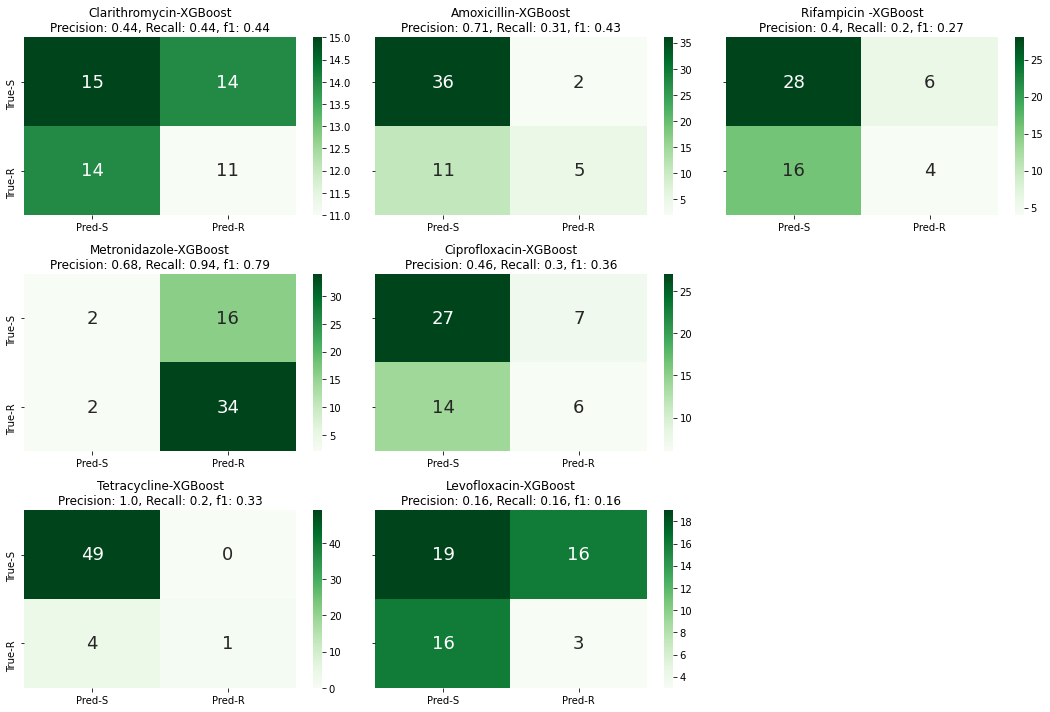

predictor  precision  recall     f1  tp  fp  tn  fn  \
0  Clarithromycin-XGBOOST      44.00   44.00  44.00  11  14  15  14   
1   Metronidazole-XGBOOST      68.00   94.44  79.07  34  16   2   2   
2    Tetracycline-XGBOOST     100.00   20.00  33.33   1   0  49   4   
3     Amoxicillin-XGBOOST      71.43   31.25  43.48   5   2  36  11   
4   Ciprofloxacin-XGBOOST      46.15   30.00  36.36   6   7  27  14   
5    Levofloxacin-XGBOOST      15.79   15.79  15.79   3  16  19  16   
6     Rifampicin -XGBOOST      40.00   20.00  26.67   4   6  28  16   

       confusion_matrix                      best_xgb_parameters  
0  [[15, 14], [14, 11]]  {'max_depth': 5, 'min_child_weight': 1}  
1    [[2, 16], [2, 34]]  {'max_depth': 5, 'min_child_weight': 1}  
2     [[49, 0], [4, 1]]  {'max_depth': 3, 'min_child_weight': 3}  
3    [[36, 2], [11, 5]]  {'max_depth': 3, 'min_child_weight': 3}  
4    [[27, 7], [14, 6]]  {'max_depth': 5, 'min_child_weight': 3}  
5   [[19, 16], [16, 3]]  {'max_depth': 3, 'min_child_weight': 1}  
6    [[28, 6], [16, 4]]  {'max_depth': 4, 'min_child_weight': 1}

In [258]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from xgboost import XGBClassifier


predictors = ['Clarithromycin', 'Metronidazole', 'Tetracycline', 'Amoxicillin', 'Ciprofloxacin', 'Levofloxacin', 'Rifampicin ']

params = {
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 3]
}

xgb_results = {}

for predictor in predictors:
    y_pred = y[predictor]
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_pred, test_size=0.2, random_state=40)

    xgb = XGBClassifier(objective='binary:logistic')
    grid_search = GridSearchCV(xgb, param_grid=params, cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    y_pred = grid_search.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    xgb_results[predictor] = {'confusion_matrix': cm, 'precision': precision, 'recall': recall, 'f1': f1, 'best_params': grid_search.best_params_}
    
    print("Confusion matrix for predictor", predictor)
    print(cm, precision, recall, f1)

df_xgb_result = pd.DataFrame(columns=['predictor', 'precision', 'recall', 'f1', 'tp', 'fp', 'tn', 'fn', 'confusion_matrix', 'best_xgb_parameters'])

for i in xgb_results:
    predictor=i+"-XGBOOST"
    precision=round(xgb_results[i]['precision']*100,2)
    recall=round(xgb_results[i]['recall']*100,2)
    f1=round(xgb_results[i]['f1']*100,2)
    tp=xgb_results[i]['confusion_matrix'][1,1]
    fp=xgb_results[i]['confusion_matrix'][0,1]
    tn=xgb_results[i]['confusion_matrix'][0,0]
    fn=xgb_results[i]['confusion_matrix'][1,0]
    cm=xgb_results[i]['confusion_matrix']
    best_xgb_parameters= xgb_results[i]['best_params']
    df_xgb_result = df_xgb_result.append({'predictor': predictor, 'precision': precision, 'recall': recall, 'f1': f1, 
    'tp': tp, 'fp': fp, 'tn': tn, 'fn': fn, 'confusion_matrix': cm, 
    'best_xgb_parameters': best_xgb_parameters}, ignore_index=True)
    

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 10), sharey=True)
x_axs = 0
y_axs = 0

for predictor, reslt in xgb_results.items():
    precision = round(reslt['precision'], 2)
    recall = round(reslt['recall'], 2)
    f1= round(reslt['f1'], 2)
    cm = reslt['confusion_matrix']

    sns.heatmap(ax=axs[x_axs, y_axs], data=cm, annot=True, cmap='Greens',
    annot_kws={"fontsize":18}, 
    xticklabels=['Pred-S','Pred-R'], yticklabels=['True-S','True-R'])
    axs[x_axs, y_axs].set_title(f'{predictor}-XGBoost\nPrecision: {precision}, Recall: {recall}, f1: {f1}')



    x_axs += 1
    if x_axs > 2:
        x_axs = 0
        y_axs += 1

axs[1,2].set_visible(False)
axs[2,2].set_visible(False)
plt.tight_layout()
plt.show()

df_xgb_result





#### XGboost with top 10 LASSO

Total of 60 features out of 156 whcih are Index(['GIitis', 'HP0256', 'HPP12_RS02320+', 'HPP12_RS02335+', 'HPP12_RS02375',
       'HPSH_RS04370', 'HPSH_RS04380', 'HP_RS04690', 'HP_RS07005', 'alpA_hopC',
       'alpB_hopB', 'babA_hopS', 'babA_hopS_2', 'babB_hopT', 'cag2', 'cag2_2',
       'cagA', 'cagA_2', 'cagA_3', 'cagI', 'cagP', 'cagU', 'cheV3', 'cheW_6',
       'flaA_2', 'flgA_21', 'flgA_23', 'flgB', 'flgD_33', 'flgH_3', 'flgL_2',
       'flhB2_1', 'flhB_33', 'flhF_14', 'fliI_33', 'fliP_7', 'fut-', 'futA_1',
       'futA_2', 'futB_1', 'futC-', 'hopZ', 'hopZ_1', 'horB', 'hpaA2', 'kdtB',
       'oipA_hopH', 'pseB_4', 'pseH_flmH_flaG1', 'pseI_2', 'rfbD', 'rfbM',
       'sabB_hopO', 'tadA_7', 'tlpC', 'ureH_2', 'vacA', 'vacA_1', 'wbcJ',
       'ylxH'],
      dtype='object') had alpha 0.01, and top 10 are Index(['flaA_2', 'babA_hopS', 'flgB', 'flhF_14', 'rfbM', 'ureH_2',
       'HP_RS07005', 'flhB2_1', 'hopZ', 'cheW_6'],
      dtype='object')
Confusion matrix for predictor Clarithromycin
[

c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-261-12f9e8270799>:85: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_xgb_LASSO_result = df_xgb_LASSO_result.append({'predictor': predictor, 'precision': precision, 'recall': recall, 'f1': f1,
<ipython-input-261-12f9e8270799>:85: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_xgb_LASSO_result = df_xgb_LASSO_result.append({'predictor': predictor, 'precision': precision, 'recall': recall, 'f1': f1,
<ipython-input-261-12f9e8270799>:85: FutureWarning: The frame.append method is deprecated and will be removed

Confusion matrix for predictor Rifampicin 
[[34  0]
 [20  0]] 0.0 0.0 0.0


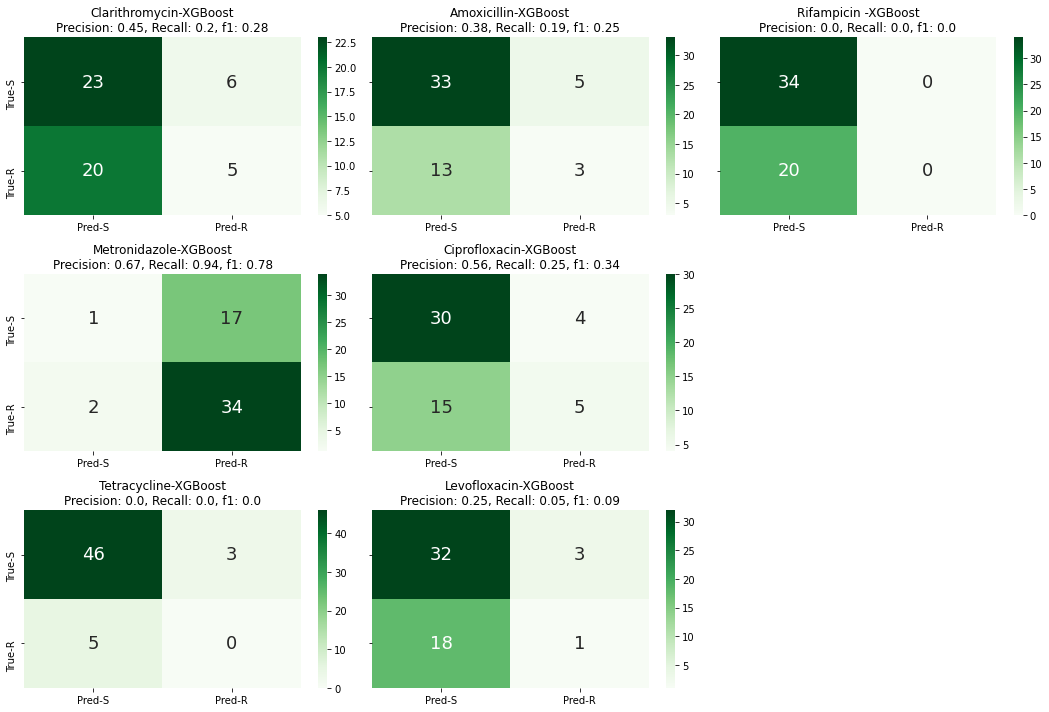

predictor  precision  recall     f1  tp  fp  tn  fn  \
0  Clarithromycin-XGBOOST-LASSO      45.45   20.00  27.78   5   6  23  20   
1   Metronidazole-XGBOOST-LASSO      66.67   94.44  78.16  34  17   1   2   
2    Tetracycline-XGBOOST-LASSO       0.00    0.00   0.00   0   3  46   5   
3     Amoxicillin-XGBOOST-LASSO      37.50   18.75  25.00   3   5  33  13   
4   Ciprofloxacin-XGBOOST-LASSO      55.56   25.00  34.48   5   4  30  15   
5    Levofloxacin-XGBOOST-LASSO      25.00    5.26   8.70   1   3  32  18   
6     Rifampicin -XGBOOST-LASSO       0.00    0.00   0.00   0   0  34  20   

     confusion_matrix                      best_xgb_parameters  \
0  [[23, 6], [20, 5]]  {'max_depth': 5, 'min_child_weight': 1}   
1  [[1, 17], [2, 34]]  {'max_depth': 3, 'min_child_weight': 3}   
2   [[46, 3], [5, 0]]  {'max_depth': 3, 'min_child_weight': 2}   
3  [[33, 5], [13, 3]]  {'max_depth': 3, 'min_child_weight': 1}   
4  [[30, 4], [15, 5]]  {'max_depth': 5, 'min_child_weight': 1}   
5  [[32, 3], [18, 1]]  {'max_depth': 3, 'min_child_weight': 2}   
6  [[34, 0], [20, 0]]  {'max_depth': 3, 'min_child_weight': 2}   

                                                                                                        topten_LASSOselected  
0                    ['flaA_2', 'babA_hopS', 'flgB', 'flhF_14', 'rfbM', 'ureH_2', 'HP_RS07005', 'flhB2_1', 'hopZ', 'cheW_6']  
1  ['sabB_hopO', 'pseC_2', 'pseH_flmH_flaG1', 'flgS', 'ureF_2', 'flgL_2', 'cheV1', 'HPSH_RS04360', 'flgB', 'HPP12_RS02320+']  
2              ['cag2', 'sabA_hopP_1', 'flgM_27', 'GIitis', 'babB_hopT', 'horB', 'HPSH_RS04390', 'pseB_4', 'pseC_2', 'cagP']  
3          ['cagU', 'virB1_cag4', 'cagP', 'vacA_1', 'cagF', 'HPSH_RS04380', 'Patient Age', 'flgA_23', 'babA_hopS', 'pseB_4']  
4                   ['pflA', 'gluE', 'flgA_21', 'futB_1', 'tlpA', 'flaA_2', 'Ethnicity', 'HPP12_RS02380+', 'rfbM', 'cagA_3']  
5        ['pflA', 'Ethnicity', 'virB4_cagE', 'flgA_21', 'HP_RS03030', 'fliA_25', 'HPP12_RS02405', 'cheV3', 'cagP', 'fliD_1']  
6                         ['HP_RS03480', 'cagF', 'hpaA2', 'pflA', 'flgC_3', 'fliR_33', 'fliL_3', 'rfbD', 'ureF_2', 'cagA_2']

In [261]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from xgboost import XGBClassifier
from sklearn.linear_model import Lasso

predictors = ['Clarithromycin', 'Metronidazole', 'Tetracycline', 'Amoxicillin', 'Ciprofloxacin', 'Levofloxacin', 'Rifampicin ']

params = {
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 3]
}

xgb_LASSO_results = {}

for predictor in predictors:
    y_pred = y[predictor]
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_pred, test_size=0.2, random_state=40)

    X_train = pd.DataFrame(X_train, columns=X.columns)
    X_test= pd.DataFrame(X_test, columns=X.columns)

    lasso = Lasso(alpha=0.01)
    lasso.fit(X_train, y_train)
    selected_cols = X_train.columns[lasso.coef_ != 0]
    top_cols = selected_cols[abs(lasso.coef_[lasso.coef_ != 0]).argsort()[::-1][:10]]
    
    if len(selected_cols) == 0:
        print("No features selected for predictor", predictor)
        continue
    else: 
        print(f"Total of {len(selected_cols)} features out of {len(X_train.columns)} whcih are {selected_cols} had alpha 0.01, and top 10 are", top_cols)

    X_train_lasso = X_train[top_cols]
    X_test_lasso = X_test[top_cols]

    try:
        # Train XGBoost with LASSO selected features
        xgb = XGBClassifier(objective='binary:logistic')
        grid_search = GridSearchCV(xgb, param_grid=params, cv=5, n_jobs=-1)
        grid_search.fit(X_train_lasso, y_train)
        y_pred = grid_search.predict(X_test_lasso)
        cm = confusion_matrix(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        tp, fp, tn, fn = cm.ravel()

        # Add results to dictionary
        xgb_LASSO_results[predictor] = {
            'precision': precision,
            'recall': recall,
            'f1': f1,
            'tp': tp,
            'fp': fp,
            'tn': tn,
            'fn': fn,
            'confusion_matrix': cm,
            'best_xgb_parameters': grid_search.best_params_,
            'topten_LASSOselected': str(list(top_cols))
        }

        print("Confusion matrix for predictor", predictor)
        print(cm, precision, recall, f1)

    except Exception as e:
        print("Error occurred for predictor", predictor)
        print(e)


df_xgb_LASSO_result = pd.DataFrame(columns=['predictor', 'precision', 'recall', 'f1', 'tp', 'fp', 'tn', 'fn', 'confusion_matrix', 'best_xgb_parameters', 'topten_LASSOselected'])


for i in xgb_LASSO_results:
    predictor=i+"-XGBOOST-LASSO"
    precision=round(xgb_LASSO_results[i]['precision']*100,2)
    recall=round(xgb_LASSO_results[i]['recall']*100,2)
    f1=round(xgb_LASSO_results[i]['f1']*100,2)
    tp=xgb_LASSO_results[i]['confusion_matrix'][1,1]
    fp=xgb_LASSO_results[i]['confusion_matrix'][0,1]
    tn=xgb_LASSO_results[i]['confusion_matrix'][0,0]
    fn=xgb_LASSO_results[i]['confusion_matrix'][1,0]
    cm=xgb_LASSO_results[i]['confusion_matrix']
    best_xgb_parameters= xgb_LASSO_results[i]['best_xgb_parameters']
    top10_LASSO=xgb_LASSO_results[i]['topten_LASSOselected']
    df_xgb_LASSO_result = df_xgb_LASSO_result.append({'predictor': predictor, 'precision': precision, 'recall': recall, 'f1': f1, 
    'tp': tp, 'fp': fp, 'tn': tn, 'fn': fn, 'confusion_matrix': cm, 
    'best_xgb_parameters': best_xgb_parameters,
    'topten_LASSOselected': top10_LASSO}, 
    ignore_index=True)
    

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 10), sharey=True)
x_axs = 0
y_axs = 0

for predictor, reslt in xgb_LASSO_results.items():
    precision = round(reslt['precision'], 2)
    recall = round(reslt['recall'], 2)
    f1= round(reslt['f1'], 2)
    cm = reslt['confusion_matrix']

    sns.heatmap(ax=axs[x_axs, y_axs], data=cm, annot=True, cmap='Greens',
    annot_kws={"fontsize":18}, 
    xticklabels=['Pred-S','Pred-R'], yticklabels=['True-S','True-R'])
    axs[x_axs, y_axs].set_title(f'{predictor}-XGBoost\nPrecision: {precision}, Recall: {recall}, f1: {f1}')



    x_axs += 1
    if x_axs > 2:
        x_axs = 0
        y_axs += 1

axs[1,2].set_visible(False)
axs[2,2].set_visible(False)
plt.tight_layout()
plt.show()


df_xgb_LASSO_result_top10=df_xgb_LASSO_result
df_xgb_LASSO_result_top10



In [221]:
pd.set_option('display.max_columns',20)
pd.set_option('max_colwidth', None)
#pd.reset_option('display.max_columns')
#pd.reset_option('max_colwidth')
df_xgb_LASSO_result_top10

predictor  precision  recall     f1  tp  fp  tn  fn  \
0  Clarithromycin-XGBOOST-LASSO      45.45   20.00  27.78   5   6  23  20   
1   Metronidazole-XGBOOST-LASSO      66.67   94.44  78.16  34  17   1   2   
2    Tetracycline-XGBOOST-LASSO       0.00    0.00   0.00   0   3  46   5   
3     Amoxicillin-XGBOOST-LASSO      37.50   18.75  25.00   3   5  33  13   
4   Ciprofloxacin-XGBOOST-LASSO      55.56   25.00  34.48   5   4  30  15   
5    Levofloxacin-XGBOOST-LASSO      25.00    5.26   8.70   1   3  32  18   
6     Rifampicin -XGBOOST-LASSO       0.00    0.00   0.00   0   0  34  20   

     confusion_matrix                      best_xgb_parameters  \
0  [[23, 6], [20, 5]]  {'max_depth': 5, 'min_child_weight': 1}   
1  [[1, 17], [2, 34]]  {'max_depth': 3, 'min_child_weight': 3}   
2   [[46, 3], [5, 0]]  {'max_depth': 3, 'min_child_weight': 2}   
3  [[33, 5], [13, 3]]  {'max_depth': 3, 'min_child_weight': 1}   
4  [[30, 4], [15, 5]]  {'max_depth': 5, 'min_child_weight': 1}   
5  [[32, 3], [18, 1]]  {'max_depth': 3, 'min_child_weight': 2}   
6  [[34, 0], [20, 0]]  {'max_depth': 3, 'min_child_weight': 2}   

                                                                                                        topten_LASSOselected  
0                    ['flaA_2', 'babA_hopS', 'flgB', 'flhF_14', 'rfbM', 'ureH_2', 'HP_RS07005', 'flhB2_1', 'hopZ', 'cheW_6']  
1  ['sabB_hopO', 'pseC_2', 'pseH_flmH_flaG1', 'flgS', 'ureF_2', 'flgL_2', 'cheV1', 'HPSH_RS04360', 'flgB', 'HPP12_RS02320+']  
2              ['cag2', 'sabA_hopP_1', 'flgM_27', 'GIitis', 'babB_hopT', 'horB', 'HPSH_RS04390', 'pseB_4', 'pseC_2', 'cagP']  
3          ['cagU', 'virB1_cag4', 'cagP', 'vacA_1', 'cagF', 'HPSH_RS04380', 'Patient Age', 'flgA_23', 'babA_hopS', 'pseB_4']  
4                   ['pflA', 'gluE', 'flgA_21', 'futB_1', 'tlpA', 'flaA_2', 'Ethnicity', 'HPP12_RS02380+', 'rfbM', 'cagA_3']  
5        ['pflA', 'Ethnicity', 'virB4_cagE', 'flgA_21', 'HP_RS03030', 'fliA_25', 'HPP12_RS02405', 'cheV3', 'cagP', 'fliD_1']  
6                         ['HP_RS03480', 'cagF', 'hpaA2', 'pflA', 'flgC_3', 'fliR_33', 'fliL_3', 'rfbD', 'ureF_2', 'cagA_2']

#### XGBOOST - All LASSO alpha 0.05 (~40 features)

Total of 13 features out of 156 whcih are Index(['HPP12_RS02375', 'HP_RS07005', 'alpA_hopC', 'babA_hopS', 'babB_hopT',
       'flaA_2', 'flgB', 'flhB2_1', 'horB', 'rfbM', 'sabB_hopO', 'tadA_7',
       'ureH_2'],
      dtype='object') had alpha 0.01, and top 10 are Index(['HPP12_RS02375', 'HP_RS07005', 'alpA_hopC', 'babA_hopS', 'babB_hopT',
       'flaA_2', 'flgB', 'flhB2_1', 'horB', 'rfbM', 'sabB_hopO', 'tadA_7',
       'ureH_2'],
      dtype='object')
Confusion matrix for predictor Clarithromycin
[[21  8]
 [14 11]] 0.5789473684210527 0.44 0.5
Total of 4 features out of 156 whcih are Index(['HPP12_RS02320+', 'HP_RS07005', 'pseC_2', 'sabB_hopO'], dtype='object') had alpha 0.01, and top 10 are Index(['HPP12_RS02320+', 'HP_RS07005', 'pseC_2', 'sabB_hopO'], dtype='object')
Confusion matrix for predictor Metronidazole
[[ 1 17]
 [ 1 35]] 0.6730769230769231 0.9722222222222222 0.7954545454545455
Total of 3 features out of 156 whcih are Index(['cag2', 'flgM_27', 'hpaA2'], dtype='object') had al

c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-197-c012297cce16>:85: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_xgb_LASSO_result = df_xgb_LASSO_result.append({'predictor': predictor, 'precision': precision, 'recall': recall, 'f1': f1,
<ipython-input-197-c012297cce16>:85: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_xgb_LASSO_result = df_xgb_LASSO_result.append({'predictor': predictor, 'precision': precision, 'recall': recall, 'f1': f1,
<ipython-input-197-c012297cce16>:85: FutureWarning: The frame.append method is deprecated and will be removed

Confusion matrix for predictor Rifampicin 
[[34  0]
 [20  0]] 0.0 0.0 0.0


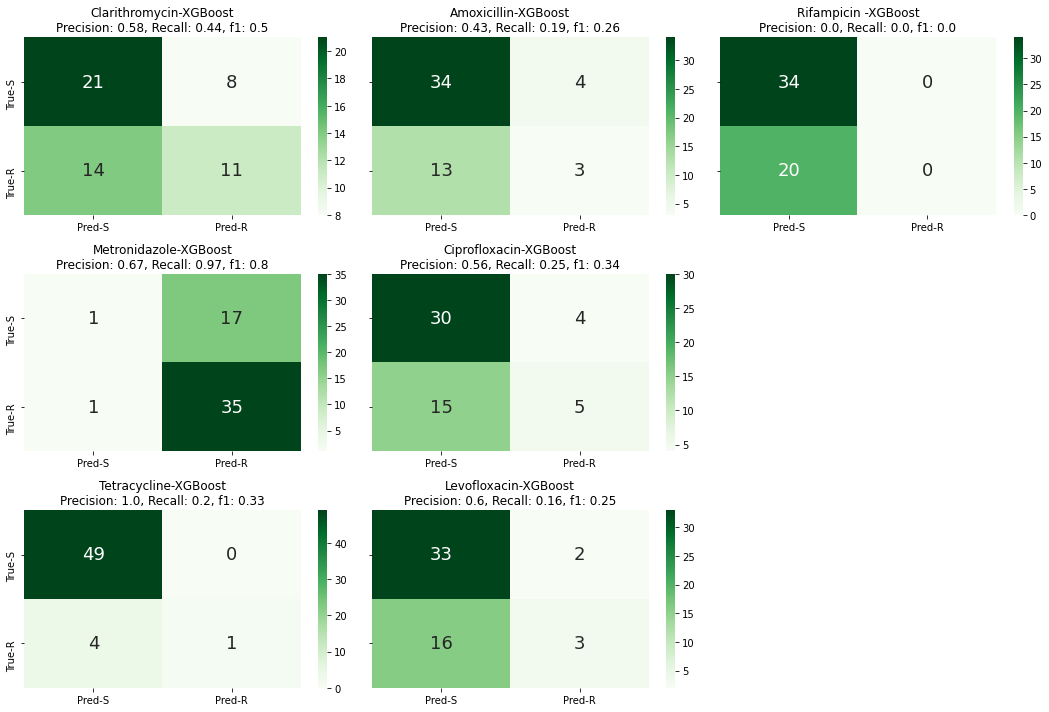

In [197]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from xgboost import XGBClassifier
from sklearn.linear_model import Lasso

predictors = ['Clarithromycin', 'Metronidazole', 'Tetracycline', 'Amoxicillin', 'Ciprofloxacin', 'Levofloxacin', 'Rifampicin ']

params = {
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 3]
}

xgb_LASSO_results = {}

for predictor in predictors:
    y_pred = y[predictor]
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_pred, test_size=0.2, random_state=40)

    X_train = pd.DataFrame(X_train, columns=X.columns)
    X_test= pd.DataFrame(X_test, columns=X.columns)

    lasso = Lasso(alpha=0.05)
    lasso.fit(X_train, y_train)
    selected_cols = X_train.columns[lasso.coef_ != 0]
    top_cols = selected_cols #top = selected
    
    if len(selected_cols) == 0:
        print("No features selected for predictor", predictor)
        continue
    else: 
        print(f"Total of {len(selected_cols)} features out of {len(X_train.columns)} whcih are {selected_cols} had alpha 0.01, and top 10 are", top_cols)

    X_train_lasso = X_train[top_cols]
    X_test_lasso = X_test[top_cols]

    try:
        # Train XGBoost with LASSO selected features
        xgb = XGBClassifier(objective='binary:logistic')
        grid_search = GridSearchCV(xgb, param_grid=params, cv=5, n_jobs=-1)
        grid_search.fit(X_train_lasso, y_train)
        y_pred = grid_search.predict(X_test_lasso)
        cm = confusion_matrix(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        tp, fp, tn, fn = cm.ravel()

        # Add results to dictionary
        xgb_LASSO_results[predictor] = {
            'precision': precision,
            'recall': recall,
            'f1': f1,
            'tp': tp,
            'fp': fp,
            'tn': tn,
            'fn': fn,
            'confusion_matrix': cm,
            'best_xgb_parameters': grid_search.best_params_,
            'topten_LASSOselected': str(list(top_cols))
        }

        print("Confusion matrix for predictor", predictor)
        print(cm, precision, recall, f1)

    except Exception as e:
        print("Error occurred for predictor", predictor)
        print(e)


df_xgb_LASSO_result = pd.DataFrame(columns=['predictor', 'precision', 'recall', 'f1', 'tp', 'fp', 'tn', 'fn', 'confusion_matrix', 'best_xgb_parameters', 'topten_LASSOselected'])


for i in xgb_LASSO_results:
    predictor=i+"-XGBOOST-LASSO"
    precision=round(xgb_LASSO_results[i]['precision']*100,2)
    recall=round(xgb_LASSO_results[i]['recall']*100,2)
    f1=round(xgb_LASSO_results[i]['f1']*100,2)
    tp=xgb_LASSO_results[i]['confusion_matrix'][1,1]
    fp=xgb_LASSO_results[i]['confusion_matrix'][0,1]
    tn=xgb_LASSO_results[i]['confusion_matrix'][0,0]
    fn=xgb_LASSO_results[i]['confusion_matrix'][1,0]
    cm=xgb_LASSO_results[i]['confusion_matrix']
    best_xgb_parameters= xgb_LASSO_results[i]['best_xgb_parameters']
    top10_LASSO=xgb_LASSO_results[i]['topten_LASSOselected']
    df_xgb_LASSO_result = df_xgb_LASSO_result.append({'predictor': predictor, 'precision': precision, 'recall': recall, 'f1': f1, 
    'tp': tp, 'fp': fp, 'tn': tn, 'fn': fn, 'confusion_matrix': cm, 
    'best_xgb_parameters': best_xgb_parameters,
    'alpha0.04_LASSOselected': top10_LASSO}, 
    ignore_index=True)
    

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 10), sharey=True)
x_axs = 0
y_axs = 0

for predictor, reslt in xgb_LASSO_results.items():
    precision = round(reslt['precision'], 2)
    recall = round(reslt['recall'], 2)
    f1= round(reslt['f1'], 2)
    cm = reslt['confusion_matrix']

    sns.heatmap(ax=axs[x_axs, y_axs], data=cm, annot=True, cmap='Greens',
    annot_kws={"fontsize":18}, 
    xticklabels=['Pred-S','Pred-R'], yticklabels=['True-S','True-R'])
    axs[x_axs, y_axs].set_title(f'{predictor}-XGBoost\nPrecision: {precision}, Recall: {recall}, f1: {f1}')



    x_axs += 1
    if x_axs > 2:
        x_axs = 0
        y_axs += 1

axs[1,2].set_visible(False)
axs[2,2].set_visible(False)
plt.tight_layout()
plt.show()


df_xgb_LASSO_result_alpha05=df_xgb_LASSO_result
df_xgb_LASSO_result_alpha05





#### XGBoost with PCA

Confusion matrix for predictor Clarithromycin
[[17 12]
 [13 12]] 0.5 0.48 0.4897959183673469
Confusion matrix for predictor Metronidazole
[[ 2 16]
 [ 5 31]] 0.6595744680851063 0.8611111111111112 0.7469879518072289
Confusion matrix for predictor Tetracycline
[[48  1]
 [ 4  1]] 0.5 0.2 0.28571428571428575
Confusion matrix for predictor Amoxicillin
[[33  5]
 [12  4]] 0.4444444444444444 0.25 0.32
Confusion matrix for predictor Ciprofloxacin
[[26  8]
 [12  8]] 0.5 0.4 0.4444444444444445
Confusion matrix for predictor Levofloxacin
[[27  8]
 [14  5]] 0.38461538461538464 0.2631578947368421 0.3125
Confusion matrix for predictor Rifampicin 
[[32  2]
 [18  2]] 0.5 0.1 0.16666666666666669


<ipython-input-241-cb992c7cc760>:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_xgb_PCA_result = df_xgb_PCA_result.append({'predictor': predictor, 'precision': precision, 'recall': recall, 'f1': f1,
<ipython-input-241-cb992c7cc760>:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_xgb_PCA_result = df_xgb_PCA_result.append({'predictor': predictor, 'precision': precision, 'recall': recall, 'f1': f1,
<ipython-input-241-cb992c7cc760>:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_xgb_PCA_result = df_xgb_PCA_result.append({'predictor': predictor, 'precision': precision, 'recall': recall, 'f1': f1,
<ipython-input-241-cb992c7cc760>:50: FutureWarning: The frame.append method is deprecated and will be removed from pan

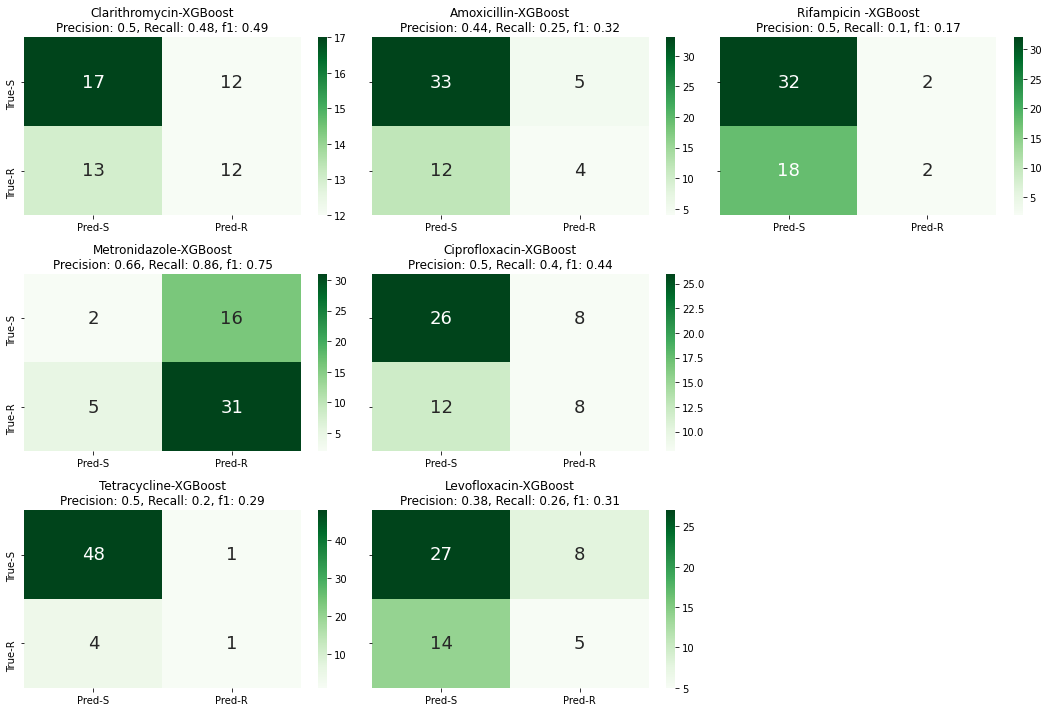

predictor  precision  recall     f1  tp  fp  tn  fn  \
0  Clarithromycin-XGBOOST      50.00   48.00  48.98  12  12  17  13   
1   Metronidazole-XGBOOST      65.96   86.11  74.70  31  16   2   5   
2    Tetracycline-XGBOOST      50.00   20.00  28.57   1   1  48   4   
3     Amoxicillin-XGBOOST      44.44   25.00  32.00   4   5  33  12   
4   Ciprofloxacin-XGBOOST      50.00   40.00  44.44   8   8  26  12   
5    Levofloxacin-XGBOOST      38.46   26.32  31.25   5   8  27  14   
6     Rifampicin -XGBOOST      50.00   10.00  16.67   2   2  32  18   

       confusion_matrix                      best_xgb_parameters  
0  [[17, 12], [13, 12]]  {'max_depth': 5, 'min_child_weight': 3}  
1    [[2, 16], [5, 31]]  {'max_depth': 5, 'min_child_weight': 3}  
2     [[48, 1], [4, 1]]  {'max_depth': 5, 'min_child_weight': 2}  
3    [[33, 5], [12, 4]]  {'max_depth': 3, 'min_child_weight': 2}  
4    [[26, 8], [12, 8]]  {'max_depth': 5, 'min_child_weight': 2}  
5    [[27, 8], [14, 5]]  {'max_depth': 5, 'min_child_weight': 1}  
6    [[32, 2], [18, 2]]  {'max_depth': 3, 'min_child_weight': 3}

In [241]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from xgboost import XGBClassifier

pca = PCA(n_components=3)
pca = pca.fit_transform(X_scaled)
X_reduced = pca[:, :3]


predictors = ['Clarithromycin', 'Metronidazole', 'Tetracycline', 'Amoxicillin', 'Ciprofloxacin', 'Levofloxacin', 'Rifampicin ']

params = {
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 3]
}

xgb_results = {}

for predictor in predictors:
    y_pred = y[predictor]
    X_train, X_test, y_train, y_test = train_test_split(X_reduced, y_pred, test_size=0.2, random_state=40)

    xgb = XGBClassifier(objective='binary:logistic')
    grid_search = GridSearchCV(xgb, param_grid=params, cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    y_pred = grid_search.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    xgb_results[predictor] = {'confusion_matrix': cm, 'precision': precision, 'recall': recall, 'f1': f1, 'best_params': grid_search.best_params_}
    
    print("Confusion matrix for predictor", predictor)
    print(cm, precision, recall, f1)

df_xgb_PCA_result = pd.DataFrame(columns=['predictor', 'precision', 'recall', 'f1', 'tp', 'fp', 'tn', 'fn', 'confusion_matrix', 'best_xgb_parameters'])

for i in xgb_results:
    predictor=i+"-XGBOOST"
    precision=round(xgb_results[i]['precision']*100,2)
    recall=round(xgb_results[i]['recall']*100,2)
    f1=round(xgb_results[i]['f1']*100,2)
    tp=xgb_results[i]['confusion_matrix'][1,1]
    fp=xgb_results[i]['confusion_matrix'][0,1]
    tn=xgb_results[i]['confusion_matrix'][0,0]
    fn=xgb_results[i]['confusion_matrix'][1,0]
    cm=xgb_results[i]['confusion_matrix']
    best_xgb_parameters= xgb_results[i]['best_params']
    df_xgb_PCA_result = df_xgb_PCA_result.append({'predictor': predictor, 'precision': precision, 'recall': recall, 'f1': f1, 
    'tp': tp, 'fp': fp, 'tn': tn, 'fn': fn, 'confusion_matrix': cm, 
    'best_xgb_parameters': best_xgb_parameters}, ignore_index=True)
    

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 10), sharey=True)
x_axs = 0
y_axs = 0

for predictor, reslt in xgb_results.items():
    precision = round(reslt['precision'], 2)
    recall = round(reslt['recall'], 2)
    f1= round(reslt['f1'], 2)
    cm = reslt['confusion_matrix']

    sns.heatmap(ax=axs[x_axs, y_axs], data=cm, annot=True, cmap='Greens',
    annot_kws={"fontsize":18}, 
    xticklabels=['Pred-S','Pred-R'], yticklabels=['True-S','True-R'])
    axs[x_axs, y_axs].set_title(f'{predictor}-XGBoost\nPrecision: {precision}, Recall: {recall}, f1: {f1}')



    x_axs += 1
    if x_axs > 2:
        x_axs = 0
        y_axs += 1

axs[1,2].set_visible(False)
axs[2,2].set_visible(False)
plt.tight_layout()
plt.show()


df_xgb_PCA_result





#### SVM

c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion matrix for predictor Clarithromycin
[[29  0]
 [25  0]] 0.0 0.0 0.0
Confusion matrix for predictor Metronidazole
[[ 0 18]
 [ 0 36]] 0.6666666666666666 1.0 0.8
Confusion matrix for predictor Tetracycline
[[49  0]
 [ 5  0]] 0.0 0.0 0.0


c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion matrix for predictor Amoxicillin
[[38  0]
 [16  0]] 0.0 0.0 0.0
Confusion matrix for predictor Ciprofloxacin
[[34  0]
 [20  0]] 0.0 0.0 0.0
Confusion matrix for predictor Levofloxacin
[[35  0]
 [19  0]] 0.0 0.0 0.0


c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-201-94b57e5e5869>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_svm_result = df_svm_result.append({'predictor': predictor, 'precision': precision, 'recall': recall, 'f1': f1,
<ipython-input-201-94b57e5e5869>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_svm_result = df_svm_result.append({'predictor': predictor, 'precision': precision, 'recall': recall, 'f1': f1,
<ipython-input-201-94b57e5e5869>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future

Confusion matrix for predictor Rifampicin 
[[34  0]
 [20  0]] 0.0 0.0 0.0


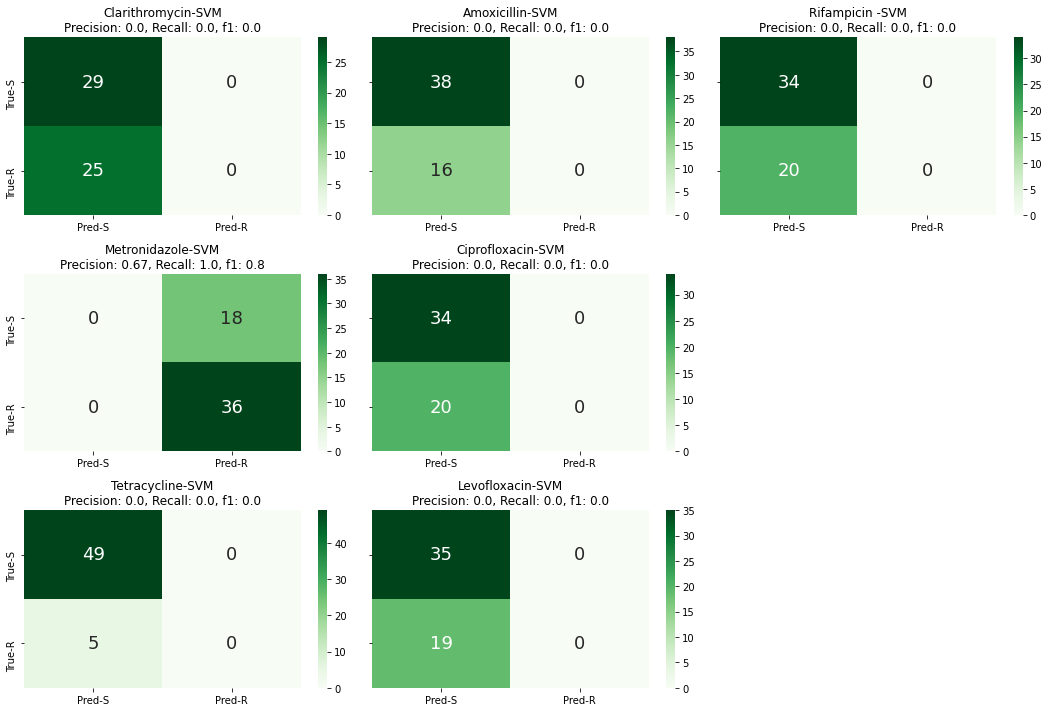

predictor  precision  recall    f1  tp  fp  tn  fn  \
0  Clarithromycin-SVM       0.00     0.0   0.0   0   0  29  25   
1   Metronidazole-SVM      66.67   100.0  80.0  36  18   0   0   
2    Tetracycline-SVM       0.00     0.0   0.0   0   0  49   5   
3     Amoxicillin-SVM       0.00     0.0   0.0   0   0  38  16   
4   Ciprofloxacin-SVM       0.00     0.0   0.0   0   0  34  20   
5    Levofloxacin-SVM       0.00     0.0   0.0   0   0  35  19   
6     Rifampicin -SVM       0.00     0.0   0.0   0   0  34  20   

     confusion_matrix             best_svm_parameters  
0  [[29, 0], [25, 0]]  {'C': 0.001, 'gamma': 'scale'}  
1  [[0, 18], [0, 36]]  {'C': 0.001, 'gamma': 'scale'}  
2   [[49, 0], [5, 0]]  {'C': 0.001, 'gamma': 'scale'}  
3  [[38, 0], [16, 0]]  {'C': 0.001, 'gamma': 'scale'}  
4  [[34, 0], [20, 0]]  {'C': 0.001, 'gamma': 'scale'}  
5  [[35, 0], [19, 0]]  {'C': 0.001, 'gamma': 'scale'}  
6  [[34, 0], [20, 0]]  {'C': 0.001, 'gamma': 'scale'}

In [201]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.svm import SVC

predictors = ['Clarithromycin', 'Metronidazole', 'Tetracycline', 'Amoxicillin', 'Ciprofloxacin', 'Levofloxacin', 'Rifampicin ']

params = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'gamma': ['scale', 'auto']
}

svm_results = {}

for predictor in predictors:
    y_pred = y[predictor]
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_pred, test_size=0.2, random_state=40)

    svm = SVC(kernel='rbf')
    grid_search = GridSearchCV(svm, param_grid=params, cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    y_pred = grid_search.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    svm_results[predictor] = {'confusion_matrix': cm, 'precision': precision, 'recall': recall, 'f1': f1, 'best_params': grid_search.best_params_}
    
    print("Confusion matrix for predictor", predictor)
    print(cm, precision, recall, f1)

df_svm_result = pd.DataFrame(columns=['predictor', 'precision', 'recall', 'f1', 'tp', 'fp', 'tn', 'fn', 'confusion_matrix', 'best_svm_parameters'])

for i in svm_results:
    predictor=i+"-SVM"
    precision=round(svm_results[i]['precision']*100,2)
    recall=round(svm_results[i]['recall']*100,2)
    f1=round(svm_results[i]['f1']*100,2)
    tp=svm_results[i]['confusion_matrix'][1,1]
    fp=svm_results[i]['confusion_matrix'][0,1]
    tn=svm_results[i]['confusion_matrix'][0,0]
    fn=svm_results[i]['confusion_matrix'][1,0]
    cm=svm_results[i]['confusion_matrix']
    best_svm_parameters= svm_results[i]['best_params']
    df_svm_result = df_svm_result.append({'predictor': predictor, 'precision': precision, 'recall': recall, 'f1': f1, 
    'tp': tp, 'fp': fp, 'tn': tn, 'fn': fn, 'confusion_matrix': cm, 
    'best_svm_parameters': best_svm_parameters}, ignore_index=True)
    

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 10), sharey=True)
x_axs = 0
y_axs = 0

for predictor, reslt in svm_results.items():
    precision = round(reslt['precision'], 2)
    recall = round(reslt['recall'], 2)
    f1= round(reslt['f1'], 2)
    cm = reslt['confusion_matrix']

    sns.heatmap(ax=axs[x_axs, y_axs], data=cm, annot=True, cmap='Greens',
    annot_kws={"fontsize":18}, 
    xticklabels=['Pred-S','Pred-R'], yticklabels=['True-S','True-R'])
    axs[x_axs, y_axs].set_title(f'{predictor}-SVM\nPrecision: {precision}, Recall: {recall}, f1: {f1}')



    x_axs += 1
    if x_axs > 2:
        x_axs = 0
        y_axs += 1

axs[1,2].set_visible(False)
axs[2,2].set_visible(False)
plt.tight_layout()
plt.show()


df_svm_result

#### SVM with LASSO top 10

Total of 60 features out of 156 which are Index(['GIitis', 'HP0256', 'HPP12_RS02320+', 'HPP12_RS02335+', 'HPP12_RS02375',
       'HPSH_RS04370', 'HPSH_RS04380', 'HP_RS04690', 'HP_RS07005', 'alpA_hopC',
       'alpB_hopB', 'babA_hopS', 'babA_hopS_2', 'babB_hopT', 'cag2', 'cag2_2',
       'cagA', 'cagA_2', 'cagA_3', 'cagI', 'cagP', 'cagU', 'cheV3', 'cheW_6',
       'flaA_2', 'flgA_21', 'flgA_23', 'flgB', 'flgD_33', 'flgH_3', 'flgL_2',
       'flhB2_1', 'flhB_33', 'flhF_14', 'fliI_33', 'fliP_7', 'fut-', 'futA_1',
       'futA_2', 'futB_1', 'futC-', 'hopZ', 'hopZ_1', 'horB', 'hpaA2', 'kdtB',
       'oipA_hopH', 'pseB_4', 'pseH_flmH_flaG1', 'pseI_2', 'rfbD', 'rfbM',
       'sabB_hopO', 'tadA_7', 'tlpC', 'ureH_2', 'vacA', 'vacA_1', 'wbcJ',
       'ylxH'],
      dtype='object') had alpha 0.01, and top 10 are Index(['flaA_2', 'babA_hopS', 'flgB', 'flhF_14', 'rfbM', 'ureH_2',
       'HP_RS07005', 'flhB2_1', 'hopZ', 'cheW_6'],
      dtype='object')
Confusion matrix for predictor Clarithromycin
[

c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion matrix for predictor Levofloxacin
[[35  0]
 [17  2]] 1.0 0.10526315789473684 0.1904761904761905
Total of 58 features out of 156 which are Index(['Patient Age', 'GIitis', 'HPP12_RS02380+', 'HPP12_RS02385',
       'HPSH_RS04360', 'HPSH_RS04390', 'HPV225_0307', 'HP_RS02435',
       'HP_RS03030', 'HP_RS03480', 'HP_RS04690', 'babA_hopS', 'babA_hopS_2',
       'cag1', 'cagA_1', 'cagA_2', 'cagF', 'cheV1', 'cheV3', 'flaA_2', 'flgB',
       'flgC_3', 'flgH_3', 'flgI_28', 'flgK_26', 'flgL_2', 'flgM_27',
       'flhB2_1', 'flhF_14', 'fliA_25', 'fliL_3', 'fliP_7', 'fliR_33',
       'futA_1', 'futA_2', 'futB', 'futB_1', 'gluP', 'hopZ', 'horB', 'hpaA2',
       'kdtB', 'motB_32', 'pdxA', 'pflA', 'pseB_4', 'pseI_2', 'rfaC', 'rfaJ',
       'rfbD', 'sabB_hopO', 'tlpA', 'ureF_2', 'ureH_1', 'vacA', 'virB10_cagY',
       'virB5_cagL', 'ylxH'],
      dtype='object') had alpha 0.01, and top 10 are Index(['HP_RS03480', 'cagF', 'hpaA2', 'pflA', 'flgC_3', 'fliR_33', 'fliL_3',
       'rfbD', 'ureF_2', 

<ipython-input-211-b4386da22fc5>:88: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_svm_LASSO_results = df_svm_LASSO_results.append({'predictor': predictor, 'precision': precision, 'recall': recall, 'f1': f1,
<ipython-input-211-b4386da22fc5>:88: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_svm_LASSO_results = df_svm_LASSO_results.append({'predictor': predictor, 'precision': precision, 'recall': recall, 'f1': f1,
<ipython-input-211-b4386da22fc5>:88: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_svm_LASSO_results = df_svm_LASSO_results.append({'predictor': predictor, 'precision': precision, 'recall': recall, 'f1': f1,
<ipython-input-211-b4386da22fc5>:88: FutureWarning: The frame.append method is deprecated and will b

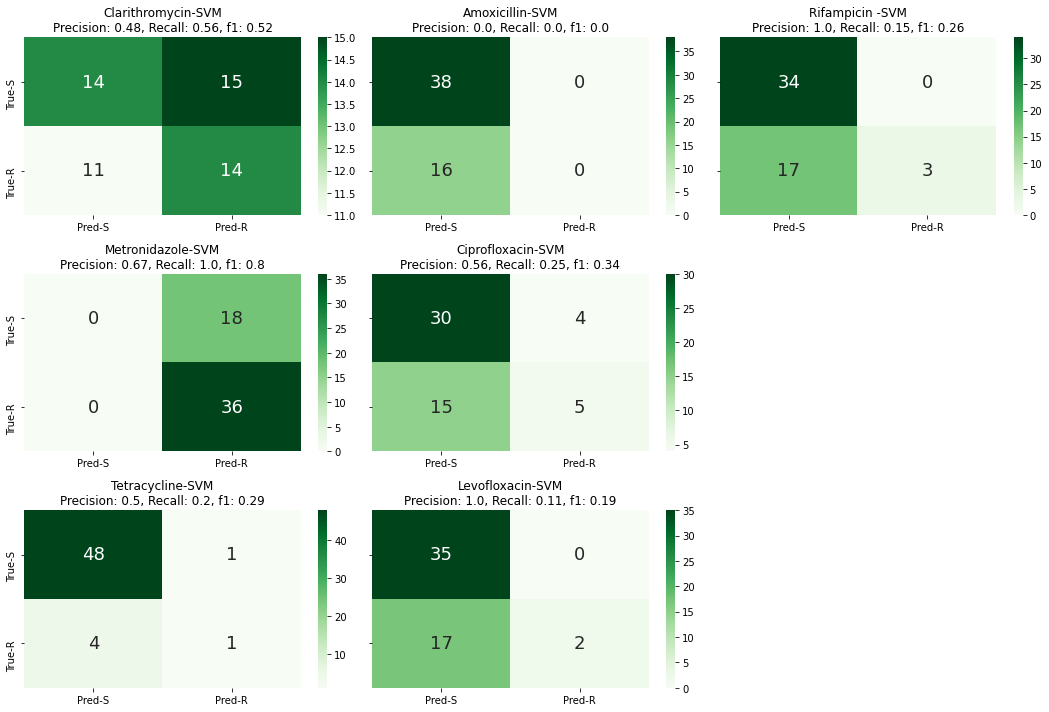

predictor  precision  recall     f1  tp  fp  tn  fn  \
0  Clarithromycin-SVM-LASSO      48.28   56.00  51.85  14  15  14  11   
1   Metronidazole-SVM-LASSO      66.67  100.00  80.00  36  18   0   0   
2    Tetracycline-SVM-LASSO      50.00   20.00  28.57   1   1  48   4   
3     Amoxicillin-SVM-LASSO       0.00    0.00   0.00   0   0  38  16   
4   Ciprofloxacin-SVM-LASSO      55.56   25.00  34.48   5   4  30  15   
5    Levofloxacin-SVM-LASSO     100.00   10.53  19.05   2   0  35  17   
6     Rifampicin -SVM-LASSO     100.00   15.00  26.09   3   0  34  17   

       confusion_matrix             best_svm_parameters  \
0  [[14, 15], [11, 14]]       {'C': 1, 'kernel': 'rbf'}   
1    [[0, 18], [0, 36]]     {'C': 0.1, 'kernel': 'rbf'}   
2     [[48, 1], [4, 1]]    {'C': 1, 'kernel': 'linear'}   
3    [[38, 0], [16, 0]]  {'C': 0.1, 'kernel': 'linear'}   
4    [[30, 4], [15, 5]]       {'C': 1, 'kernel': 'rbf'}   
5    [[35, 0], [17, 2]]    {'C': 0.1, 'kernel': 'poly'}   
6    [[34, 0], [17, 3]]    {'C': 1, 'kernel': 'linear'}   

                                topten_LASSOselected  
0  ['flaA_2', 'babA_hopS', 'flgB', 'flhF_14', 'rf...  
1  ['sabB_hopO', 'pseC_2', 'pseH_flmH_flaG1', 'fl...  
2  ['cag2', 'sabA_hopP_1', 'flgM_27', 'GIitis', '...  
3  ['cagU', 'virB1_cag4', 'cagP', 'vacA_1', 'cagF...  
4  ['pflA', 'gluE', 'flgA_21', 'futB_1', 'tlpA', ...  
5  ['pflA', 'Ethnicity', 'virB4_cagE', 'flgA_21',...  
6  ['HP_RS03480', 'cagF', 'hpaA2', 'pflA', 'flgC_...

In [211]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.linear_model import Lasso
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

predictors = ['Clarithromycin', 'Metronidazole', 'Tetracycline', 'Amoxicillin', 'Ciprofloxacin', 'Levofloxacin', 'Rifampicin ']

params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly']
}

svm_LASSO_results = {}

for predictor in predictors:
    y_pred = y[predictor]
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_pred, test_size=0.2, random_state=40)

    X_train = pd.DataFrame(X_train, columns=X.columns)
    X_test= pd.DataFrame(X_test, columns=X.columns)

    lasso = Lasso(alpha=0.01)
    lasso.fit(X_train, y_train)
    selected_cols = X_train.columns[lasso.coef_ != 0]
    top_cols = selected_cols[abs(lasso.coef_[lasso.coef_ != 0]).argsort()[::-1][:10]]
    
    if len(selected_cols) == 0:
        print("No features selected for predictor", predictor)
        continue
    else: 
        print(f"Total of {len(selected_cols)} features out of {len(X_train.columns)} which are {selected_cols} had alpha 0.01, and top 10 are", top_cols)

    X_train_lasso = X_train[top_cols]
    X_test_lasso = X_test[top_cols]

    try:
        # Train SVM with LASSO selected features
        svm = SVC()
        grid_search = GridSearchCV(svm, param_grid=params, cv=5, n_jobs=-1)
        grid_search.fit(X_train_lasso, y_train)
        y_pred = grid_search.predict(X_test_lasso)
        cm = confusion_matrix(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        tp, fp, tn, fn = cm.ravel()

        # Add results to dictionary
        svm_LASSO_results[predictor] = {
            'precision': precision,
            'recall': recall,
            'f1': f1,
            'tp': tp,
            'fp': fp,
            'tn': tn,
            'fn': fn,
            'confusion_matrix': cm,
            'best_svm_parameters': grid_search.best_params_,
            'topten_LASSOselected': str(list(top_cols))
        }

        print("Confusion matrix for predictor", predictor)
        print(cm, precision, recall, f1)

    except Exception as e:
        print("Error occurred for predictor", predictor)
        print(e)


df_svm_LASSO_results = pd.DataFrame(columns=['predictor', 'precision', 'recall', 'f1', 'tp', 'fp', 'tn', 'fn', 'confusion_matrix', 'best_svm_parameters', 'topten_LASSOselected'])


for i in svm_LASSO_results:
    predictor=i+"-SVM-LASSO"
    precision=round(svm_LASSO_results[i]['precision']*100,2)
    recall=round(svm_LASSO_results[i]['recall']*100,2)
    f1=round(svm_LASSO_results[i]['f1']*100,2)
    tp=svm_LASSO_results[i]['confusion_matrix'][1,1]
    fp=svm_LASSO_results[i]['confusion_matrix'][0,1]
    tn=svm_LASSO_results[i]['confusion_matrix'][0,0]
    fn=svm_LASSO_results[i]['confusion_matrix'][1,0]
    cm=svm_LASSO_results[i]['confusion_matrix']
    svm_parameters= svm_LASSO_results[i]['best_svm_parameters']
    top10_LASSO=svm_LASSO_results[i]['topten_LASSOselected']
    df_svm_LASSO_results = df_svm_LASSO_results.append({'predictor': predictor, 'precision': precision, 'recall': recall, 'f1': f1, 
    'tp': tp, 'fp': fp, 'tn': tn, 'fn': fn, 'confusion_matrix': cm,    'best_svm_parameters': svm_parameters,
    'topten_LASSOselected': top10_LASSO}, 
    ignore_index=True)
    

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 10), sharey=True)
x_axs = 0
y_axs = 0

for predictor, reslt in svm_LASSO_results.items():
    precision = round(reslt['precision'], 2)
    recall = round(reslt['recall'], 2)
    f1= round(reslt['f1'], 2)
    cm = reslt['confusion_matrix']

    sns.heatmap(ax=axs[x_axs, y_axs], data=cm, annot=True, cmap='Greens',
    annot_kws={"fontsize":18}, 
    xticklabels=['Pred-S','Pred-R'], yticklabels=['True-S','True-R'])
    axs[x_axs, y_axs].set_title(f'{predictor}-SVM\nPrecision: {precision}, Recall: {recall}, f1: {f1}')



    x_axs += 1
    if x_axs > 2:
        x_axs = 0
        y_axs += 1

axs[1,2].set_visible(False)
axs[2,2].set_visible(False)
plt.tight_layout()
plt.show()


df_svm_LASSO_results_top10=df_svm_LASSO_results
df_svm_LASSO_results_top10


In [277]:
df_svm_LASSO_results_top10.to_clipboard(excel=True, index=False )

#### Gradient Boosting

Confusion matrix for predictor Clarithromycin
[[16 13]
 [13 12]] 0.48 0.48 0.48
Confusion matrix for predictor Metronidazole
[[ 1 17]
 [ 1 35]] 0.6730769230769231 0.9722222222222222 0.7954545454545455
Confusion matrix for predictor Tetracycline
[[49  0]
 [ 4  1]] 1.0 0.2 0.33333333333333337
Confusion matrix for predictor Amoxicillin
[[38  0]
 [14  2]] 1.0 0.125 0.2222222222222222
Confusion matrix for predictor Ciprofloxacin
[[32  2]
 [16  4]] 0.6666666666666666 0.2 0.30769230769230765
Confusion matrix for predictor Levofloxacin
[[34  1]
 [17  2]] 0.6666666666666666 0.10526315789473684 0.18181818181818182


c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-275-35bd74aa375b>:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_gb_result = df_gb_result.append({'predictor': predictor, 'precision': precision, 'recall': recall, 'f1': f1,
<ipython-input-275-35bd74aa375b>:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_gb_result = df_gb_result.append({'predictor': predictor, 'precision': precision, 'recall': recall, 'f1': f1,
<ipython-input-275-35bd74aa375b>:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future ver

Confusion matrix for predictor Rifampicin 
[[34  0]
 [20  0]] 0.0 0.0 0.0


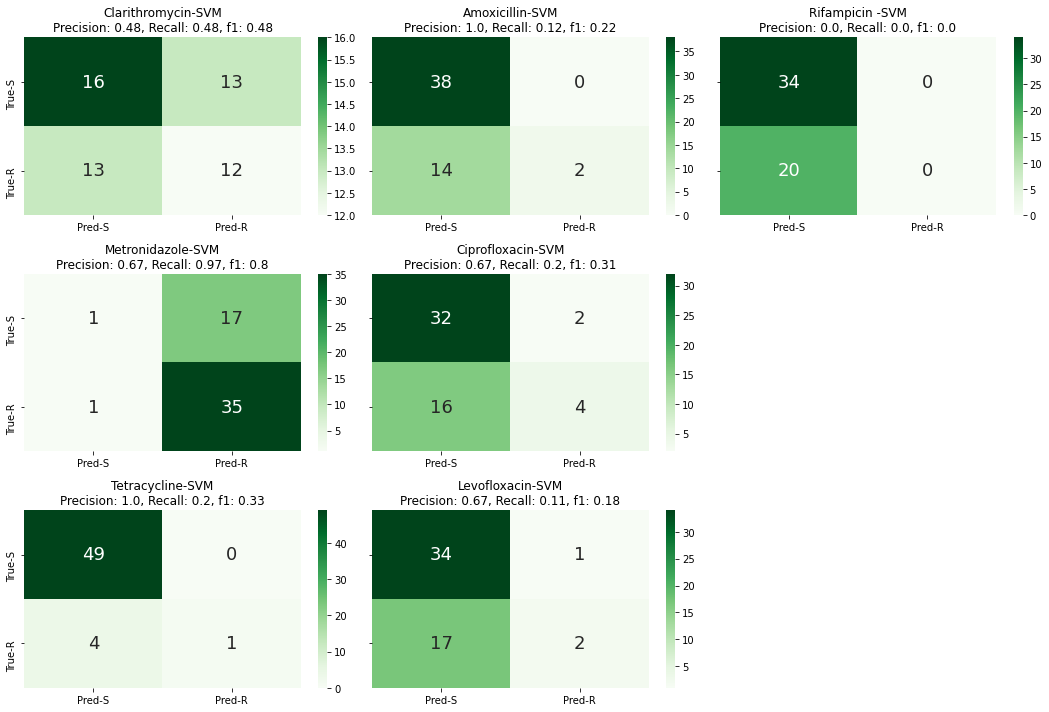

predictor  precision  recall     f1  tp  fp  tn  fn  \
0  Clarithromycin-GB      48.00   48.00  48.00  12  13  16  13   
1   Metronidazole-GB      67.31   97.22  79.55  35  17   1   1   
2    Tetracycline-GB     100.00   20.00  33.33   1   0  49   4   
3     Amoxicillin-GB     100.00   12.50  22.22   2   0  38  14   
4   Ciprofloxacin-GB      66.67   20.00  30.77   4   2  32  16   
5    Levofloxacin-GB      66.67   10.53  18.18   2   1  34  17   
6     Rifampicin -GB       0.00    0.00   0.00   0   0  34  20   

       confusion_matrix  \
0  [[16, 13], [13, 12]]   
1    [[1, 17], [1, 35]]   
2     [[49, 0], [4, 1]]   
3    [[38, 0], [14, 2]]   
4    [[32, 2], [16, 4]]   
5    [[34, 1], [17, 2]]   
6    [[34, 0], [20, 0]]   

                                             best_gb_parameters  
0     {'learning_rate': 1, 'max_depth': 5, 'n_estimators': 200}  
1  {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}  
2   {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}  
3  {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200}  
4  {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}  
5  {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}  
6  {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}

In [275]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from xgboost import XGBClassifier
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

predictors = ['Clarithromycin', 'Metronidazole', 'Tetracycline', 'Amoxicillin', 'Ciprofloxacin', 'Levofloxacin', 'Rifampicin ']

params = {
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5],
    'n_estimators': [50, 100, 200]
}

gb_results = {}

for predictor in predictors:
    y_pred = y[predictor]
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_pred, test_size=0.2, random_state=40)

    gb = XGBClassifier()
    grid_search = GridSearchCV(gb, param_grid=params, cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    y_pred = grid_search.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    gb_results[predictor] = {'confusion_matrix': cm, 'precision': precision, 'recall': recall, 'f1': f1, 'best_params': grid_search.best_params_}
    
    print("Confusion matrix for predictor", predictor)
    print(cm, precision, recall, f1)

df_gb_result = pd.DataFrame(columns=['predictor', 'precision', 'recall', 'f1', 'tp', 'fp', 'tn', 'fn', 'confusion_matrix', 'best_gb_parameters'])

for i in gb_results:
    predictor=i+"-GB"
    precision=round(gb_results[i]['precision']*100,2)
    recall=round(gb_results[i]['recall']*100,2)
    f1=round(gb_results[i]['f1']*100,2)
    tp=gb_results[i]['confusion_matrix'][1,1]
    fp=gb_results[i]['confusion_matrix'][0,1]
    tn=gb_results[i]['confusion_matrix'][0,0]
    fn=gb_results[i]['confusion_matrix'][1,0]
    cm=gb_results[i]['confusion_matrix']
    best_gb_parameters= gb_results[i]['best_params']
    df_gb_result = df_gb_result.append({'predictor': predictor, 'precision': precision, 'recall': recall, 'f1': f1, 
    'tp': tp, 'fp': fp, 'tn': tn, 'fn': fn, 'confusion_matrix': cm, 
    'best_gb_parameters': best_gb_parameters}, ignore_index=True)
    

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 10), sharey=True)
x_axs = 0
y_axs = 0

for predictor, reslt in gb_results.items():
    precision = round(reslt['precision'], 2)
    recall = round(reslt['recall'], 2)
    f1= round(reslt['f1'], 2)
    cm = reslt['confusion_matrix']

    sns.heatmap(ax=axs[x_axs, y_axs], data=cm, annot=True, cmap='Greens',
    annot_kws={"fontsize":18}, 
    xticklabels=['Pred-S','Pred-R'], yticklabels=['True-S','True-R'])
    axs[x_axs, y_axs].set_title(f'{predictor}-SVM\nPrecision: {precision}, Recall: {recall}, f1: {f1}')

    x_axs += 1
    if x_axs > 2:
        x_axs = 0
        y_axs += 1


axs[1,2].set_visible(False)
axs[2,2].set_visible(False)
plt.tight_layout()
plt.show()

df_gb_result_top10=df_gb_result
df_gb_result_top10


#### Logistic Regression

c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion matrix for predictor Clarithromycin
[[29  0]
 [25  0]] 0.0 0.0 0.0
Confusion matrix for predictor Metronidazole
[[ 0 18]
 [ 0 36]] 0.6666666666666666 1.0 0.8


c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion matrix for predictor Tetracycline
[[49  0]
 [ 5  0]] 0.0 0.0 0.0


c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion matrix for predictor Amoxicillin
[[38  0]
 [16  0]] 0.0 0.0 0.0


c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion matrix for predictor Ciprofloxacin
[[34  0]
 [20  0]] 0.0 0.0 0.0


c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion matrix for predictor Levofloxacin
[[35  0]
 [19  0]] 0.0 0.0 0.0


c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-216-7e35f3750026>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_LogR_result = df_LogR_result.append({'predictor': predictor, 'precision': precision, 'recall': recall, 'f1': f1,
<ipython-input-216-7e35f3750026>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_LogR_result = df_LogR_result.append({'predictor': predictor, 'precision': precision, 'recall': recall, 'f1': f1,
<ipython-input-216-7e35f3750026>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fu

Confusion matrix for predictor Rifampicin 
[[34  0]
 [20  0]] 0.0 0.0 0.0


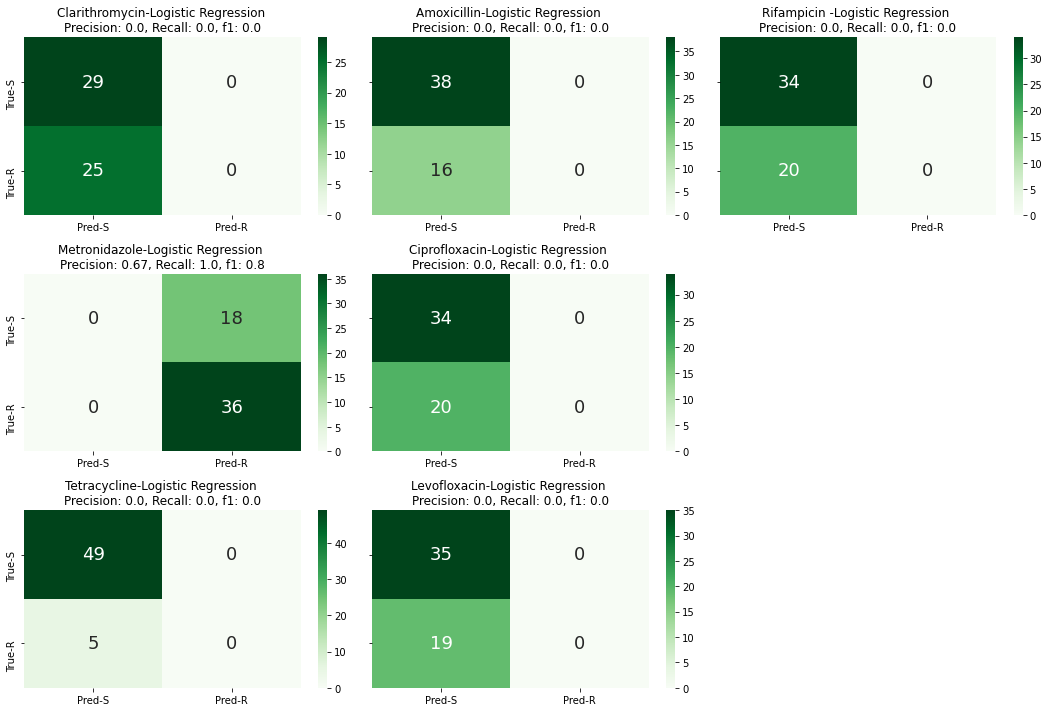

predictor  precision  recall    f1  tp  fp  tn  fn  \
0  Clarithromycin-LogR       0.00     0.0   0.0   0   0  29  25   
1   Metronidazole-LogR      66.67   100.0  80.0  36  18   0   0   
2    Tetracycline-LogR       0.00     0.0   0.0   0   0  49   5   
3     Amoxicillin-LogR       0.00     0.0   0.0   0   0  38  16   
4   Ciprofloxacin-LogR       0.00     0.0   0.0   0   0  34  20   
5    Levofloxacin-LogR       0.00     0.0   0.0   0   0  35  19   
6     Rifampicin -LogR       0.00     0.0   0.0   0   0  34  20   

     confusion_matrix           best_LogR_parameters  
0  [[29, 0], [25, 0]]  {'C': 0.001, 'penalty': 'l1'}  
1  [[0, 18], [0, 36]]    {'C': 0.1, 'penalty': 'l1'}  
2   [[49, 0], [5, 0]]  {'C': 0.001, 'penalty': 'l1'}  
3  [[38, 0], [16, 0]]  {'C': 0.001, 'penalty': 'l1'}  
4  [[34, 0], [20, 0]]  {'C': 0.001, 'penalty': 'l1'}  
5  [[35, 0], [19, 0]]  {'C': 0.001, 'penalty': 'l1'}  
6  [[34, 0], [20, 0]]  {'C': 0.001, 'penalty': 'l1'}

In [216]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression

predictors = ['Clarithromycin', 'Metronidazole', 'Tetracycline', 'Amoxicillin', 'Ciprofloxacin', 'Levofloxacin', 'Rifampicin ']

params_LogR = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

LogR_results = {}

for predictor in predictors:
    y_pred = y[predictor]
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_pred, test_size=0.2, random_state=40)

    LogR = LogisticRegression(solver='liblinear')
    grid_search = GridSearchCV(LogR, param_grid=params_LogR, cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    y_pred = grid_search.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    LogR_results[predictor] = {'confusion_matrix': cm, 'precision': precision, 'recall': recall, 'f1': f1, 'best_params': grid_search.best_params_}
    
    print("Confusion matrix for predictor", predictor)
    print(cm, precision, recall, f1)

df_LogR_result = pd.DataFrame(columns=['predictor', 'precision', 'recall', 'f1', 'tp', 'fp', 'tn', 'fn', 'confusion_matrix', 'best_LogR_parameters'])

for i in LogR_results:
    predictor=i+"-LogR"
    precision=round(LogR_results[i]['precision']*100,2)
    recall=round(LogR_results[i]['recall']*100,2)
    f1=round(LogR_results[i]['f1']*100,2)
    tp=LogR_results[i]['confusion_matrix'][1,1]
    fp=LogR_results[i]['confusion_matrix'][0,1]
    tn=LogR_results[i]['confusion_matrix'][0,0]
    fn=LogR_results[i]['confusion_matrix'][1,0]
    cm=LogR_results[i]['confusion_matrix']
    best_LogR_parameters= LogR_results[i]['best_params']
    df_LogR_result = df_LogR_result.append({'predictor': predictor, 'precision': precision, 'recall': recall, 'f1': f1, 
    'tp': tp, 'fp': fp, 'tn': tn, 'fn': fn, 'confusion_matrix': cm, 
    'best_LogR_parameters': best_LogR_parameters}, ignore_index=True)


fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 10), sharey=True)
x_axs = 0
y_axs = 0

for predictor, reslt in LogR_results.items():
    precision = round(reslt['precision'], 2)
    recall = round(reslt['recall'], 2)
    f1= round(reslt['f1'], 2)
    cm = reslt['confusion_matrix']

    sns.heatmap(ax=axs[x_axs, y_axs], data=cm, annot=True, cmap='Greens',
    annot_kws={"fontsize":18}, 
    xticklabels=['Pred-S','Pred-R'], yticklabels=['True-S','True-R'])
    axs[x_axs, y_axs].set_title(f'{predictor}-Logistic Regression \nPrecision: {precision}, Recall: {recall}, f1: {f1}')



    x_axs += 1
    if x_axs > 2:
        x_axs = 0
        y_axs += 1

axs[1,2].set_visible(False)
axs[2,2].set_visible(False)
plt.tight_layout()
plt.show()


df_LogR_result


#### Random Forrest

Confusion matrix for predictor Clarithromycin
[[16 13]
 [18  7]] 0.35 0.28 0.3111111111111111
Confusion matrix for predictor Metronidazole
[[ 0 18]
 [ 1 35]] 0.660377358490566 0.9722222222222222 0.7865168539325842
Confusion matrix for predictor Tetracycline
[[49  0]
 [ 4  1]] 1.0 0.2 0.33333333333333337
Confusion matrix for predictor Amoxicillin
[[38  0]
 [15  1]] 1.0 0.0625 0.11764705882352941
Confusion matrix for predictor Ciprofloxacin
[[33  1]
 [16  4]] 0.8 0.2 0.32000000000000006
Confusion matrix for predictor Levofloxacin
[[34  1]
 [18  1]] 0.5 0.05263157894736842 0.09523809523809525
Confusion matrix for predictor Rifampicin 
[[33  1]
 [19  1]] 0.5 0.05 0.09090909090909091


<ipython-input-218-46b60efd4e58>:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_RandF_result = df_RandF_result.append({'predictor': predictor, 'precision': precision, 'recall': recall, 'f1': f1,
<ipython-input-218-46b60efd4e58>:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_RandF_result = df_RandF_result.append({'predictor': predictor, 'precision': precision, 'recall': recall, 'f1': f1,
<ipython-input-218-46b60efd4e58>:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_RandF_result = df_RandF_result.append({'predictor': predictor, 'precision': precision, 'recall': recall, 'f1': f1,
<ipython-input-218-46b60efd4e58>:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fut

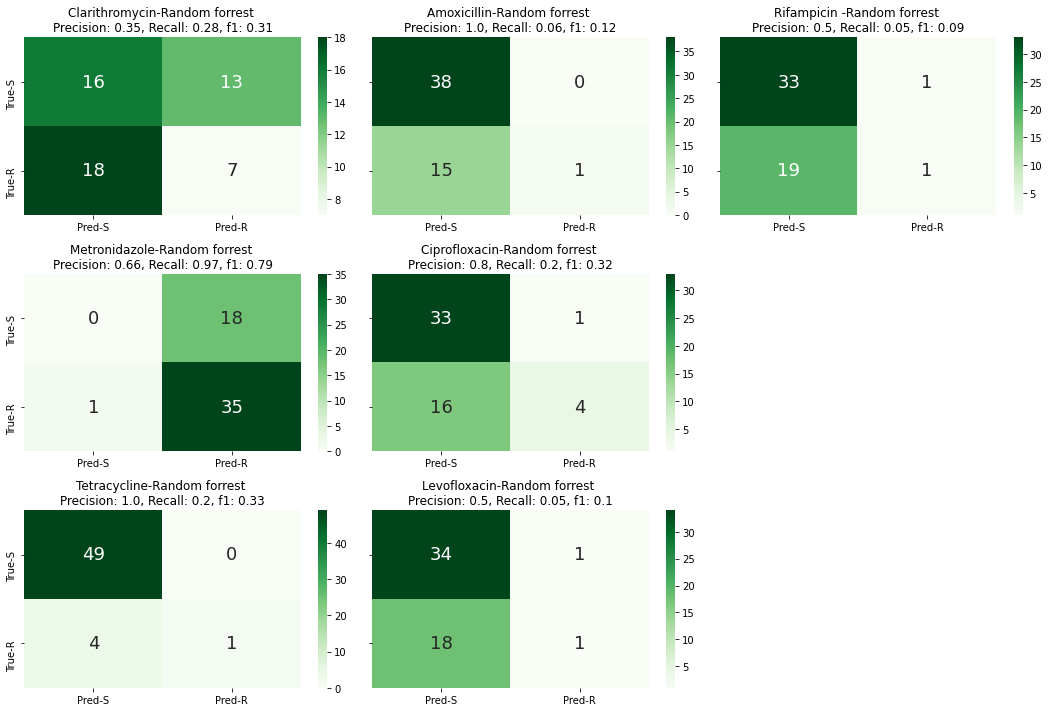

predictor  precision  recall     f1  tp  fp  tn  fn  \
0  Clarithromycin-RandF      35.00   28.00  31.11   7  13  16  18   
1   Metronidazole-RandF      66.04   97.22  78.65  35  18   0   1   
2    Tetracycline-RandF     100.00   20.00  33.33   1   0  49   4   
3     Amoxicillin-RandF     100.00    6.25  11.76   1   0  38  15   
4   Ciprofloxacin-RandF      80.00   20.00  32.00   4   1  33  16   
5    Levofloxacin-RandF      50.00    5.26   9.52   1   1  34  18   
6     Rifampicin -RandF      50.00    5.00   9.09   1   1  33  19   

      confusion_matrix                              best_RandF_parameters  
0  [[16, 13], [18, 7]]  {'max_depth': 10, 'min_samples_leaf': 1, 'min_...  
1   [[0, 18], [1, 35]]  {'max_depth': 20, 'min_samples_leaf': 1, 'min_...  
2    [[49, 0], [4, 1]]  {'max_depth': None, 'min_samples_leaf': 1, 'mi...  
3   [[38, 0], [15, 1]]  {'max_depth': 10, 'min_samples_leaf': 1, 'min_...  
4   [[33, 1], [16, 4]]  {'max_depth': 10, 'min_samples_leaf': 4, 'min_...  
5   [[34, 1], [18, 1]]  {'max_depth': 10, 'min_samples_leaf': 4, 'min_...  
6   [[33, 1], [19, 1]]  {'max_depth': 10, 'min_samples_leaf': 1, 'min_...

In [218]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

predictors = ['Clarithromycin', 'Metronidazole', 'Tetracycline', 'Amoxicillin', 'Ciprofloxacin', 'Levofloxacin', 'Rifampicin ']

params_RandF = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

RandF_results = {}

for predictor in predictors:
    y_pred = y[predictor]
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_pred, test_size=0.2, random_state=40)

    RandF = RandomForestClassifier()
    grid_search = GridSearchCV(RandF, param_grid=params_RandF, cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    y_pred = grid_search.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    RandF_results[predictor] = {'confusion_matrix': cm, 'precision': precision, 'recall': recall, 'f1': f1, 'best_params': grid_search.best_params_}
    
    print("Confusion matrix for predictor", predictor)
    print(cm, precision, recall, f1)

df_RandF_result = pd.DataFrame(columns=['predictor', 'precision', 'recall', 'f1', 'tp', 'fp', 'tn', 'fn', 'confusion_matrix', 'best_RandF_parameters'])

for i in RandF_results:
    predictor=i+"-RandF"
    precision=round(RandF_results[i]['precision']*100,2)
    recall=round(RandF_results[i]['recall']*100,2)
    f1=round(RandF_results[i]['f1']*100,2)
    tp=RandF_results[i]['confusion_matrix'][1,1]
    fp=RandF_results[i]['confusion_matrix'][0,1]
    tn=RandF_results[i]['confusion_matrix'][0,0]
    fn=RandF_results[i]['confusion_matrix'][1,0]
    cm=RandF_results[i]['confusion_matrix']
    best_RandF_parameters= RandF_results[i]['best_params']
    df_RandF_result = df_RandF_result.append({'predictor': predictor, 'precision': precision, 'recall': recall, 'f1': f1, 
    'tp': tp, 'fp': fp, 'tn': tn, 'fn': fn, 'confusion_matrix': cm, 
    'best_RandF_parameters': best_RandF_parameters}, ignore_index=True)

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 10), sharey=True)
x_axs = 0
y_axs = 0

for predictor, reslt in RandF_results.items():
    precision = round(reslt['precision'], 2)
    recall = round(reslt['recall'], 2)
    f1= round(reslt['f1'], 2)
    cm = reslt['confusion_matrix']

    sns.heatmap(ax=axs[x_axs, y_axs], data=cm, annot=True, cmap='Greens',
    annot_kws={"fontsize":18}, 
    xticklabels=['Pred-S','Pred-R'], yticklabels=['True-S','True-R'])
    axs[x_axs, y_axs].set_title(f'{predictor}-Random forrest \nPrecision: {precision}, Recall: {recall}, f1: {f1}')



    x_axs += 1
    if x_axs > 2:
        x_axs = 0
        y_axs += 1

axs[1,2].set_visible(False)
axs[2,2].set_visible(False)
plt.tight_layout()
plt.show()



df_RandF_result


## Multi-label

In [ ]:

from sklearn.linear_model import MultiTaskLasso


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

estimator = MultiTaskLasso()

param_grid = {
    'alpha': [0.1, 1.0, 10.0],
    'max_iter': [100, 1000, 10000],
}

grid_search = GridSearchCV(estimator, param_grid=param_grid)

grid_search.fit(X_train, y_train)

best_estimator = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best estimator:\n", best_estimator)
print("Best hyperparameters:\n", best_params)
score = best_estimator.score(X_test, y_test)
print("Test score:", score)


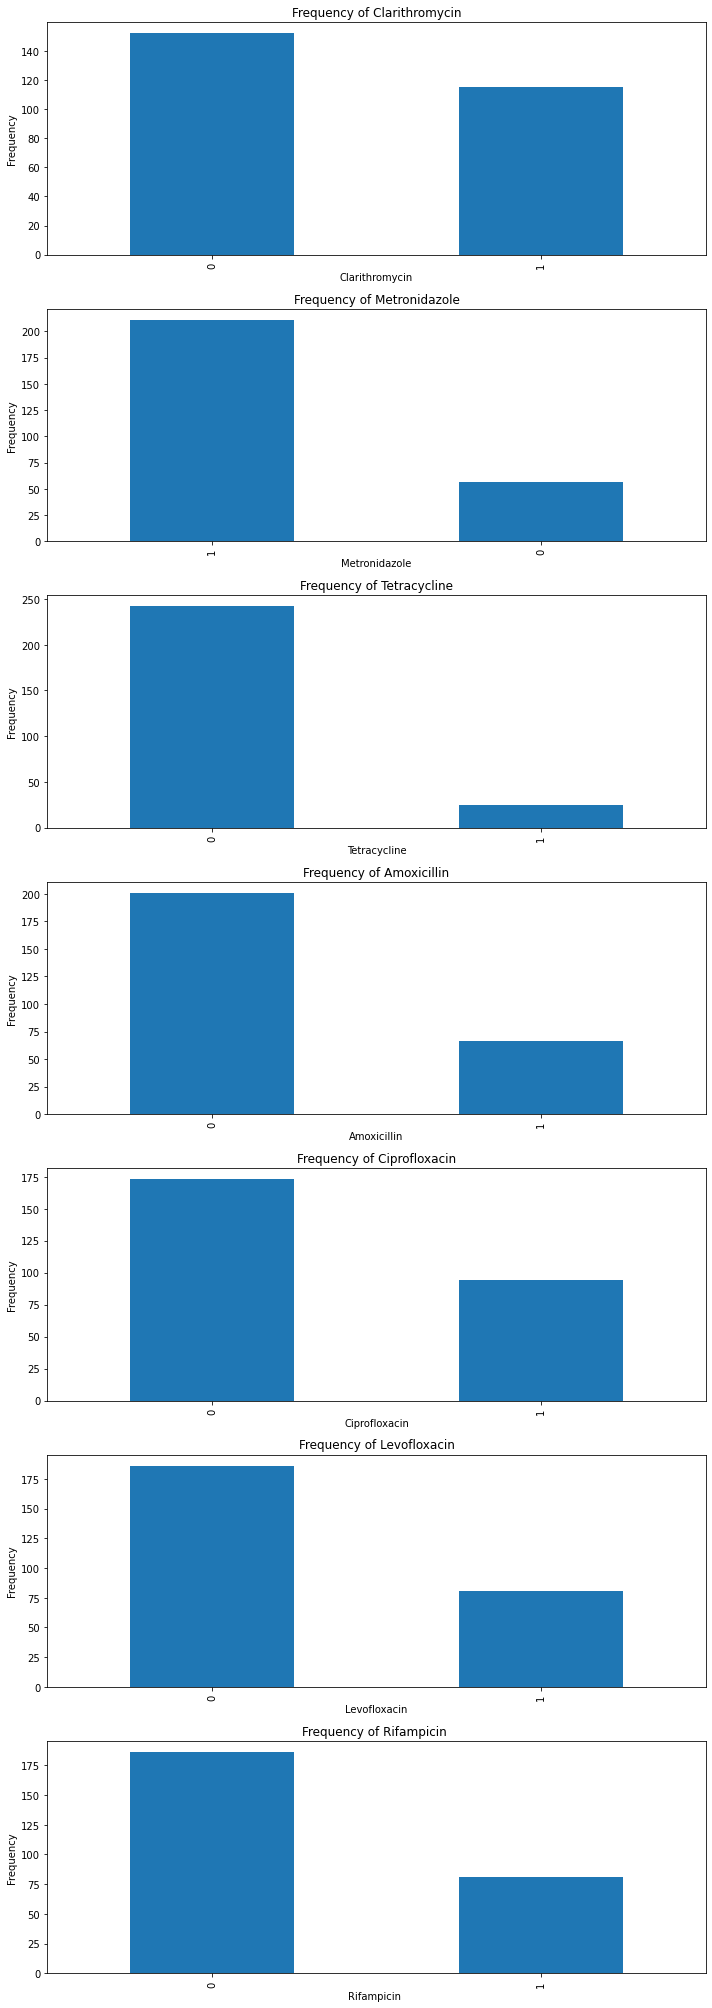

In [233]:
columns = y.columns

fig, axes = plt.subplots(nrows=len(columns), figsize=(10, len(columns) * 4))

for idx, column in enumerate(columns):
    y[column].value_counts().plot(kind='bar', ax=axes[idx], title=f'Frequency of {column}')
    axes[idx].set_xlabel(column)
    axes[idx].set_ylabel('Frequency')

plt.tight_layout()
plt.show()